# TP NEURAL NETWORK

Réalisé par Enzo Munoz, Maxime Guilbaud et Hugo Munier

### I.1 Régression logistique

On suppose :

- $$X \mid Y=0 \sim \mathcal N(\mu_0,\sigma^2)$$  
- $$X \mid Y=1 \sim \mathcal N(\mu_1,\sigma^2)$$  


### 1.

Comme \(Y\) est binaire, on utilise une loi de Bernoulli :

$$
Y \sim \mathcal B(1,\pi)
$$

$$
\mathbb P(Y=1)=\pi,\qquad \mathbb P(Y=0)=1-\pi.
$$


### 2. 

Formule des probabilités totales :

$$
p(x)
= p_{X\mid Y}(x\mid 0)\,(1-\pi)
+ p_{X\mid Y}(x\mid 1)\,\pi.
$$

Densité normale :

$$
\varphi(x;\mu,\sigma)
= \frac{1}{\sigma\sqrt{2\pi}}
\exp\left( -\frac{(x-\mu)^2}{2\sigma^2} \right)
$$

Donc :

$$
p(x)
= (1-\pi)\,\varphi(x;\mu_0,\sigma)
+ \pi\,\varphi(x;\mu_1,\sigma)
$$

Explicitement :

$$
p(x)
= \frac{1-\pi}{\sigma\sqrt{2\pi}}
\exp\left( -\frac{(x-\mu_0)^2}{2\sigma^2} \right)
\;+\;
\frac{\pi}{\sigma\sqrt{2\pi}}
\exp\left( -\frac{(x-\mu_1)^2}{2\sigma^2} \right)
$$


### 3. 

La difficulté principale est :

$$
p(x) \text{ dépend de } \pi,\;\mu_0,\;\mu_1,\;\sigma^2
$$

Ces paramètres sont inconnus → il faut les estimer à partir des données, ce qui rend le calcul exact de \(p(x)\) non trivial.


### 4.

On veut écrire :

$$
\log\frac{\Pr(Y=1\mid X=x)}{\Pr(Y=0\mid X=x)} = \beta_0 + \beta_1 x.
$$

Par Bayes :

$$
\Pr(Y=1\mid X=x)
= \frac{\pi\,f_1(x)}{\pi f_1(x) + (1-\pi) f_0(x)},
$$

où  

$$
f_1(x)=\varphi(x;\mu_1,\sigma), \qquad
f_0(x)=\varphi(x;\mu_0,\sigma).
$$

Le rapport de chances est donc :

$$
\frac{\Pr(Y=1\mid X=x)}{\Pr(Y=0\mid X=x)}
= \frac{\pi f_1(x)}{(1-\pi) f_0(x)}.
$$

En prenant le log :

$$
\log\frac{\Pr(Y=1\mid X=x)}{\Pr(Y=0\mid X=x)}
= \log\frac{\pi}{1-\pi} + \log\frac{f_1(x)}{f_0(x)}.
$$

Or, pour une densité normale :

$$
\log f_j(x) = -\frac12\log(2\pi) -\log\sigma
             -\frac{(x-\mu_j)^2}{2\sigma^2},
             \quad j\in\{0,1\}.
$$

Donc

$$
\log\frac{f_1(x)}{f_0(x)}
= -\frac{(x-\mu_1)^2-(x-\mu_0)^2}{2\sigma^2}
= \frac{\mu_1-\mu_0}{\sigma^2}x - \frac{\mu_1^2-\mu_0^2}{2\sigma^2}.
$$

Finalement :

$$
\log\frac{\Pr(Y=1\mid X=x)}{\Pr(Y=0\mid X=x)}
= {\left[\log\frac{\pi}{1-\pi}
   - \frac{\mu_1^2-\mu_0^2}{2\sigma^2}\right]}
 + {\frac{\mu_1-\mu_0}{\sigma^2}}\,x.
$$

Donc

$$
{\beta_1 = \dfrac{\mu_1-\mu_0}{\sigma^2}},\qquad
{\beta_0 = \log\frac{\pi}{1-\pi}
             - \dfrac{\mu_1^2-\mu_0^2}{2\sigma^2}}.
$$



### 5. 

On veut classifier un nouvel individu de valeur X=x.

La règle de Bayes est :

- décider Y=1 si $$\pi(x)=\Pr(Y=1\mid X=x)\ge \tfrac12$$
- décider Y=0 sinon.

Avec la forme logistique :

$$
\pi(x)\ge\frac12
\quad\Longleftrightarrow\quad
\frac{\pi(x)}{1-\pi(x)}\ge 1
\quad\Longleftrightarrow\quad
\beta_0+\beta_1 x \ge 0.
$$

Donc :

- si $$\beta_1>0$$, on décide  
  $$Y=1 \text{ si } x \ge -\dfrac{\beta_0}{\beta_1},\quad
  Y=0 \text{ sinon}.$$
- si $$\beta_1<0$$, l’inégalité est inversée.

C’est une règle de décision par seuil sur x.


### 6.





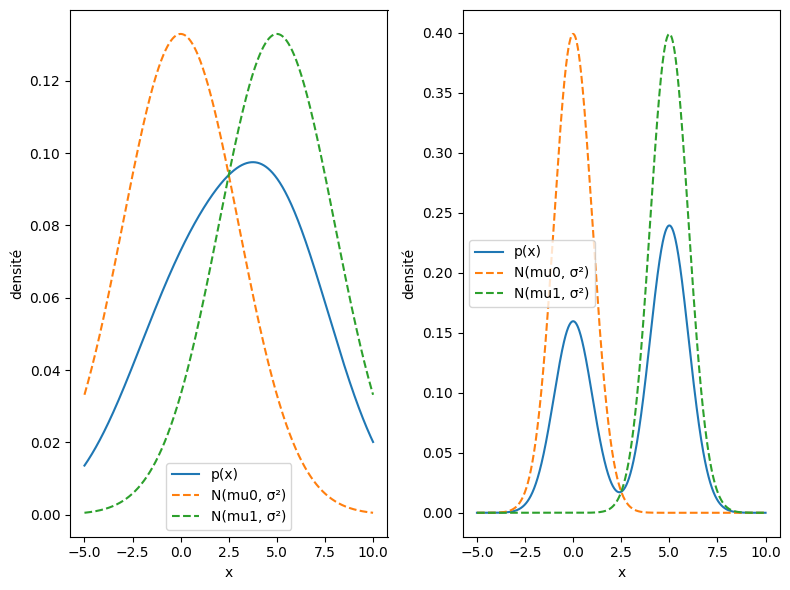

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

pi = 0.4
mu0, mu1 = 0, 5
sigma = 3

x = np.linspace(-5, 10, 1500)
p0 = norm.pdf(x, mu0, sigma)
p1 = norm.pdf(x, mu1, sigma)
px = pi * p0 + (1 - pi) * p1

plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)   
plt.plot(x, px, label="p(x)")
plt.plot(x, p0, "--", label="N(mu0, σ²)")
plt.plot(x, p1, "--", label="N(mu1, σ²)")
plt.legend()
plt.xlabel("x")
plt.ylabel("densité")

sigma = 1
p0 = norm.pdf(x, mu0, sigma)
p1 = norm.pdf(x, mu1, sigma)
px = pi * p0 + (1 - pi) * p1

plt.subplot(1, 2, 2)   
plt.plot(x, px, label="p(x)")
plt.plot(x, p0, "--", label="N(mu0, σ²)")
plt.plot(x, p1, "--", label="N(mu1, σ²)")
plt.legend()
plt.xlabel("x")
plt.ylabel("densité")

plt.tight_layout()
plt.show()


### 7. 

En observant les graphiques obtenus :

- Pour $\sigma = 1$, la courbe $\pi(x)$ (courbe verte) passe très brutalement de 0 à 1.  
  Le point où $\pi(x)=0.5$ se situe autour de $x^* \approx 2.5$.

- Pour $\sigma = 3$, la courbe $\pi(x)$ est beaucoup plus étalée, mais coupe encore le niveau 0.5  
  au même endroit, vers $x^* \approx 2.5$.

Donc :

- La règle de décision ne change pas : on classe en 1 si $x \ge x^* \approx 2.5$.

- Mais l’incertitude augmente lorsque $\sigma$ augmente :  
  les densités se recouvrent davantage, et $\pi(x)$ évolue plus lentement, donc les décisions autour de $x^*$ sont moins fiables.


### 8.

On suppose que l’on dispose d’un jeu de données $(x_i, y_i)_{1 \le i \le n}$, et que ces paires sont i.i.d.  
On suppose aussi que $(X,Y)$ suit le modèle logistique défini précédemment.

#### (a) Que signifie l’hypothèse i.i.d. ?

L’hypothèse *i.i.d.* signifie indépendants et identiquement distribués :

Concrètement pour notre jeu de données, cela signifie que chaque ligne est un tirage du même modèle,
sans dépendance temporelle ni structure entre les observations.

#### (b) Comment estimer $\beta_0$ et $\beta_1$ par maximum de vraisemblance ?

Le modèle logistique donne :

$$
\pi(x) = \mathbb{P}(Y = 1 \mid X = x)
       = \frac{1}{1 + \exp\big(-( \beta_0 + \beta_1 x )\big)}.
$$

Pour une observation $(x_i, y_i)$, la probabilité d'observer $y_i$ vaut :

$$
\mathbb{P}(Y = y_i \mid X = x_i)
= \pi(x_i)^{y_i} \, (1 - \pi(x_i))^{1 - y_i}.
$$

Sous l’hypothèse i.i.d., la vraisemblance du jeu de données est :

$$
L(\beta_0, \beta_1)
= \prod_{i=1}^n \pi(x_i)^{y_i} (1 - \pi(x_i))^{1 - y_i}.
$$

On maximise plutôt la log-vraisemblance :

$$
\ell(\beta_0, \beta_1)
= \sum_{i=1}^n \Big[ y_i \log(\pi(x_i)) + (1 - y_i)\log(1 - \pi(x_i)) \Big].
$$

Les estimateurs du maximum de vraisemblance sont :

$$
(\hat{\beta}_0, \hat{\beta}_1)
= \arg\max_{\beta_0, \beta_1} \ \ell(\beta_0, \beta_1).
$$

On ne peut pas résoudre cela analytiquement ; il faut utiliser un algorithme numérique  




### I.2 Perceptron

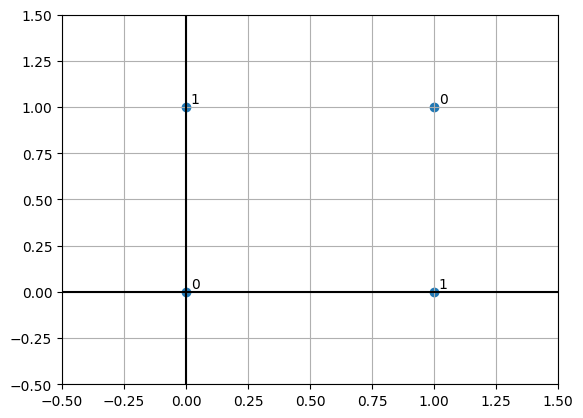

In [2]:
import matplotlib.pyplot as plt


x = [0, 0, 1, 1]
y = [0, 1, 0, 1]
labels = [0, 1, 1, 0]  # valeurs de f(x1,x2)

plt.figure()


plt.scatter(x, y)


for xi, yi, lab in zip(x, y, labels):
    plt.text(xi + 0.02, yi + 0.02, str(lab))


plt.axhline(0, color='black')
plt.axvline(0, color='black')


plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)

plt.grid(True)


plt.show()



### 2.  
Pourquoi ne pouvons-nous pas trouver un perceptron simple ?

La table de vérité donnée correspond à la fonction logique OU exclusif (XOR) :

- $f(0,0)=0$
- $f(0,1)=1$
- $f(1,0)=1$
- $f(1,1)=0$

Cette fonction n’est pas linéairement séparable :  
Un perceptron simple réalisant une séparation linéaire ne peut donc pas modéliser cette fonction.

---

### 3. 

Un perceptron à une couche cachée de deux neurones permet de représenter cette fonction.

- Couche cachée :
  - $h_1 = \text{step}(x_1 + x_2 - 0.5)$  
  - $h_2 = \text{step}(x_1 + x_2 - 1.5)$

- Neurone de sortie :
  - $y = \text{step}(h_1 - h_2)$

Avec ce choix, on retrouve bien :  
$ f(0,0)=0,\quad f(0,1)=1,\quad f(1,0)=1,\quad f(1,1)=0. $

## I.3 Régression ReLU


### 1.a) Décomposition de $f$


On considère
$$
f(x) =
\begin{cases}
2x - 1 & \text{si } x \le 1,\\
1      & \text{si } x > 1.
\end{cases}
$$

On pose
$$
a_1(x) = 1 - x,
\qquad
a_2(z) = -2z + 1.
$$

Alors:

- si $x \le 1$, alors $(1-x) \ge 0$ donc $(\mathrm{ReLU}(a_1(x)) = 1-x$ et

  
  $$
  a_2(\mathrm{ReLU}(a_1(x))) = -2(1-x) + 1 = 2x - 1 = f(x).
  $$

- si $x \le 1$, alors $(1-x) \le 0$ donc $\mathrm{ReLU}(a_1(x)) = 0$ et

  
  $$
  a_2(\mathrm{ReLU}(a_1(x))) = a_2(0) = 1 = f(x).
  $$

  Donc:


$$
f = a_2 \circ \mathrm{ReLU} \circ a_1.
$$

## Décomposition de $g$

On considère  
$$
g(x) =
\begin{cases}
0 & \text{si } x < 0,\\
x & \text{si } 0 \le x \le 1,\\
1 & \text{si } x > 1.
\end{cases}
$$

On pose  
$$
a_1(x) = (x,\; x-1),
\qquad
a_2(u_1, u_2) = u_1 - u_2.
$$

Alors:

- si $x < 0$, on a $\mathrm{ReLU}(x)=0$ et $\mathrm{ReLU}(x-1)=0$, donc  

  $$
  a_2(\mathrm{ReLU}(a_1(x))) = 0 = g(x).
  $$

- si $0 \le x \le 1$, on a $\mathrm{ReLU}(x)=x$ et $\mathrm{ReLU}(x-1)=0$, donc  

  $$
  a_2(\mathrm{ReLU}(a_1(x))) = x - 0 = x = g(x).
  $$

- si $x > 1$, on a $\mathrm{ReLU}(x)=x$ et $\mathrm{ReLU}(x-1)=x-1$, donc  

  $$
  a_2(\mathrm{ReLU}(a_1(x))) = x - (x-1) = 1 = g(x).
  $$

### Conclusion :
$$
g = a_2 \circ \mathrm{ReLU} \circ a_1.
$$



NameError: name 'g' is not defined

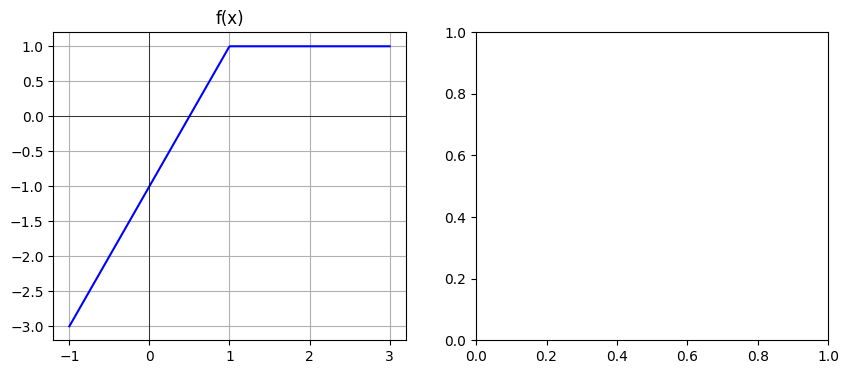

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(0, x)


def f(x):
    a1 = 1 - x
    return -2 * relu(a1) + 1


    u1 = relu(x)
    u2 = relu(x - 1)
    return u1 - u2

# Domaine pour la visualisation
xs = np.linspace(-1, 3, 400)

plt.figure(figsize=(10,4))

# plot f
plt.subplot(1, 2, 1)
plt.plot(xs, f(xs), color='blue')
plt.title("f(x)")
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)

# plot g
plt.subplot(1, 2, 2)
plt.plot(xs, g(xs), color='red')
plt.title("g(x)")
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)

plt.tight_layout()
plt.show()


## 2. Décomposition du premier triangle

On considère la fonction définie graphiquement par un triangle de base $\left(0,1\right)$ et de sommet $\left(\tfrac12, 1\right)$.  
Elle vaut
$$
T_1(x) =
\begin{cases}
0 & \text{si } x \le 0,\\
2x & \text{si } 0 \le x \le \tfrac12,\\
-2x + 2 & \text{si } \tfrac12 \le x \le 1,\\
0 & \text{si } x \ge 1.
\end{cases}
$$

On pose  
$$
a_1(x) = \bigl(x,\; x - \tfrac12,\; x - 1\bigr),
\qquad
a_2(u_1,u_2,u_3) = 2u_1 - 4u_2 + 2u_3.
$$

Alors :

- si $x \le 0$, on a  
  $\mathrm{ReLU}(x)=0$,  
  $\mathrm{ReLU}(x-\tfrac12)=0$,  
  $\mathrm{ReLU}(x-1)=0$, donc  
  $$
  a_2(\mathrm{ReLU}(a_1(x))) = 0 = T_1(x).
  $$

- si $0 \le x \le \tfrac12$, alors  
  $\mathrm{ReLU}(x)=x$,  
  $\mathrm{ReLU}(x-\tfrac12)=0$,  
  $\mathrm{ReLU}(x-1)=0$, donc  
  $$
  a_2(\mathrm{ReLU}(a_1(x)))
  = 2x - 4\cdot 0 + 2\cdot 0
  = 2x
  = T_1(x).
  $$

- si $\tfrac12 \le x \le 1$, alors  
  $\mathrm{ReLU}(x)=x$,  
  $\mathrm{ReLU}(x-\tfrac12)=x-\tfrac12$,  
  $\mathrm{ReLU}(x-1)=0$, donc  
  $$
  a_2(\mathrm{ReLU}(a_1(x)))
  = 2x - 4(x-\tfrac12)
  = -2x + 2
  = T_1(x).
  $$

- si $x \ge 1$, alors  
  $\mathrm{ReLU}(x) = x$,  
  $\mathrm{ReLU}(x-\tfrac12) = x-\tfrac12$,  
  $\mathrm{ReLU}(x-1)=x-1$, donc  
  $$
  a_2(\mathrm{ReLU}(a_1(x)))
  = 2x - 4(x-\tfrac12) + 2(x-1)
  = 0
  = T_1(x).
  $$

### Conclusion :
$$
T_1 = a_2 \circ \mathrm{ReLU} \circ a_1.
$$


## 2. Décomposition du second triangle

On considère la fonction définie graphiquement par un triangle de base $\left(0, \tfrac32\right)$ et de sommet $\left(1,2\right)$.  
Elle vaut
$$
T_2(x) =
\begin{cases}
0 & \text{si } x \le 0,\\
2x & \text{si } 0 \le x \le 1,\\
-4x + 6 & \text{si } 1 \le x \le 1.5,\\
0 & \text{si } x \ge 1.5.
\end{cases}
$$

On pose  
$$
a_1(x) = \bigl(x,\; x-1,\; x-\tfrac32\bigr),
\qquad
a_2(v_1,v_2,v_3) = 2v_1 - 6v_2 + 4v_3.
$$

Alors :

- si $x \le 0$,  
  $\mathrm{ReLU}(x)=0$,  
  $\mathrm{ReLU}(x-1)=0$,  
  $\mathrm{ReLU}(x-\tfrac32)=0$, donc  
  $$
  a_2(\mathrm{ReLU}(a_1(x))) = 0 = T_2(x).
  $$

- si $0 \le x \le 1$,  
  $\mathrm{ReLU}(x)=x$,  
  $\mathrm{ReLU}(x-1)=0$,  
  $\mathrm{ReLU}(x-\tfrac32)=0$, donc  
  $$
  a_2(\mathrm{ReLU}(a_1(x))) = 2x = T_2(x).
  $$

- si $1 \le x \le 1.5$,  
  $\mathrm{ReLU}(x)=x$,  
  $\mathrm{ReLU}(x-1)=x-1$,  
  $\mathrm{ReLU}(x-\tfrac32)=0$, donc  
  $$
  a_2(\mathrm{ReLU}(a_1(x)))
  = 2x - 6(x-1)
  = -4x + 6
  = T_2(x).
  $$

- si $x \ge 1.5$,  
  $\mathrm{ReLU}(x)=x$,  
  $\mathrm{ReLU}(x-1)=x-1$,  
  $\mathrm{ReLU}(x-\tfrac32)=x-\tfrac32$, donc  
  $$
  a_2(\mathrm{ReLU}(a_1(x)))
  = 2x - 6(x-1) + 4(x-\tfrac32)
  = 0
  = T_2(x).
  $$

### Conclusion :
$$
T_2 = a_2 \circ \mathrm{ReLU} \circ a_1.
$$


## 3.a) Décomposition de $g_\alpha$

On reconnaît que $g_\alpha$ est exactement le triangle $T_1$ de la question 2 multiplié par $\alpha$.

On avait
$$
T_1(x) = 2\,\mathrm{ReLU}(x)
- 4\,\mathrm{ReLU}\!\left(x-\tfrac12\right)
+ 2\,\mathrm{ReLU}(x-1).
$$

Donc
$$
g_\alpha(x) = \alpha\,T_1(x)
= 2\alpha\,\mathrm{ReLU}(x)
- 4\alpha\,\mathrm{ReLU}\!\left(x-\tfrac12\right)
+ 2\alpha\,\mathrm{ReLU}(x-1).
$$

On pose alors simplement
$$
a_1(x) = \bigl(x,\; x-\tfrac12,\; x-1\bigr),
\qquad
a_2(u_1,u_2,u_3) = 2\alpha u_1 - 4\alpha u_2 + 2\alpha u_3.
$$

### Conclusion :
$$
g_\alpha = a_2 \circ \mathrm{ReLU} \circ a_1.
$$


## 3.b) Choix optimal de $\alpha$ en norme $L^2$

On veut choisir $\alpha > 0$ de sorte que $g_\alpha$ soit la meilleure approximation de
$$
h(x) =
\begin{cases}
\sin(\pi x) & \text{si } x \in \left(0,1\right),\\
0 & \text{sinon,}
\end{cases}
$$
au sens de la norme $L^2\left(\mathbb{R}\right)$.

Autrement dit, on veut minimiser
$$
\left\|h - g_\alpha\right\|_{L^2}^2
= \int_{\mathbb{R}} \left(h(x) - g_\alpha(x)\right)^2 \, dx.
$$

On a montré en 3.a que
$$
g_\alpha(x) = \alpha \,\varphi(x),
$$
où $\varphi$ est le triangle de la question 2.a :
$$
\varphi(x) =
\begin{cases}
2x & \text{si } x \in \left(0,\tfrac12\right),\\
-2x + 2 & \text{si } x \in \left(\tfrac12,1\right),\\
0 & \text{sinon.}
\end{cases}
$$

On définit donc
$$
J(\alpha) = \left\|h - g_\alpha\right\|_{L^2}^2
= \int_0^1 \left(h(x) - \alpha \varphi(x)\right)^2 \, dx.
$$

### Développement de $J(\alpha)$ comme polynôme en $\alpha$

On développe le carré :
$$
J(\alpha)
= \int_0^1 \left(h(x)^2 - 2\alpha h(x)\varphi(x) + \alpha^2 \varphi(x)^2\right)\,dx.
$$

En posant
$$
\langle f,g\rangle = \int_0^1 f(x)g(x)\,dx,
\qquad
\|f\|_{L^2}^2 = \langle f,f\rangle,
$$
on obtient
$$
J(\alpha)
= \|h\|_{L^2}^2
- 2\alpha \langle h,\varphi\rangle
+ \alpha^2 \|\varphi\|_{L^2}^2.
$$

C’est un polynôme du second degré en $\alpha$ :
$$
J(\alpha) = A\alpha^2 - 2B\alpha + C
$$
avec
$$
A = \|\varphi\|_{L^2}^2,
\quad
B = \langle h,\varphi\rangle,
\quad
C = \|h\|_{L^2}^2.
$$

Le minimum est atteint pour
$$
\alpha_{\min} = \frac{B}{A}
= \frac{\langle h,\varphi\rangle}{\|\varphi\|_{L^2}^2}.
$$

Il reste à calculer $\|\varphi\|_{L^2}^2$ et $\langle h,\varphi\rangle$.

---

### Calcul de $\|\varphi\|_{L^2}^2$

Par définition
$$
\|\varphi\|_{L^2}^2
= \int_0^1 \varphi(x)^2\,dx
= \int_0^{1/2} (2x)^2\,dx
+ \int_{1/2}^1 (-2x+2)^2\,dx.
$$

On calcule :
$$
\int_0^{1/2} (2x)^2\,dx
= \int_0^{1/2} 4x^2\,dx
= 4 \cdot \frac{x^3}{3}\Big|_{0}^{1/2}
= \frac{4}{3}\cdot \frac{1}{8}
= \frac{1}{6},
$$

et
$$
\int_{1/2}^1 (-2x+2)^2\,dx
= \int_{1/2}^1 4(x-1)^2\,dx
= 4 \cdot \frac{(x-1)^3}{3}\Big|_{1/2}^{1}
= 4 \cdot \frac{(-1/2)^3}{3}\cdot(-1)
= \frac{1}{6}.
$$

Donc
$$
\|\varphi\|_{L^2}^2
= \frac{1}{6} + \frac{1}{6}
= \frac{1}{3}.
$$

---

### Calcul de $\langle h,\varphi\rangle$

On a $h(x) = \sin(\pi x)$ sur $\left(0,1\right)$. Donc
$$
\langle h,\varphi\rangle
= \int_0^1 \sin(\pi x)\varphi(x)\,dx
= \int_0^{1/2} 2x\sin(\pi x)\,dx
+ \int_{1/2}^1 (-2x+2)\sin(\pi x)\,dx.
$$

Les intégrales donnent :
$$
\int_0^{1/2} 2x\sin(\pi x)\,dx = \frac{2}{\pi^2},
\qquad
\int_{1/2}^1 (-2x+2)\sin(\pi x)\,dx = \frac{2}{\pi^2}.
$$

Donc
$$
\langle h,\varphi\rangle
= \frac{2}{\pi^2} + \frac{2}{\pi^2}
= \frac{4}{\pi^2}.
$$

---

### Valeur de $\alpha_{\min}$

On a donc
$$
A = \|\varphi\|_{L^2}^2 = \frac{1}{3},
\qquad
B = \langle h,\varphi\rangle = \frac{4}{\pi^2}.
$$

Ainsi
$$
\alpha_{\min}
= \frac{B}{A}
= \frac{\dfrac{4}{\pi^2}}{\dfrac{1}{3}}
= \frac{12}{\pi^2}.
$$


### Conclusion :
$$
\boxed{\alpha_{\min} = \dfrac{12}{\pi^2}.}
$$




## I.4 CNN

### I.4.1 Opérateur linéaire
#### 1. 

On considère un noyau de convolution
$$
k = [\alpha,\beta,\gamma] \in \mathbb{R}^3,
$$
et un vecteur $y = (y_1,\dots,y_n) \in \mathbb{R}^n$.

La convolution 1D $(y * k) \in \mathbb{R}^{n-2}$ est donnée, pour $i=1,\dots,n-2$, par :
$$
(y * k)_i = \alpha\, y_i + \beta\, y_{i+1} + \gamma\, y_{i+2}.
$$

On cherche une matrice $C_k \in \mathbb{R}^{(n-2)\times n}$ telle que
$$
C_k\, y = 
\begin{pmatrix}
(y * k)_1 \\
(y * k)_2 \\
\vdots \\
(y * k)_{n-2}
\end{pmatrix}.
$$

Cette matrice s’écrit sous forme bande :

$$
C_k =
\begin{pmatrix}
\alpha & \beta & \gamma & 0 & \cdots & 0 \\
0 & \alpha & \beta & \gamma & \ddots & \vdots \\
\vdots & \ddots & \ddots & \ddots & \ddots & 0 \\
0 & \cdots & 0 & \alpha & \beta & \gamma
\end{pmatrix}
\in \mathbb{R}^{(n-2)\times n}.
$$

#### 2.
On considère la matrice
$$
D = \frac{1}{h}
\begin{pmatrix}
-1 & 1 & 0 & \cdots & 0 \\
0 & -1 & 1 & \cdots & 0 \\
\vdots & \vdots & \ddots & \ddots & \vdots \\
0 & 0 & \cdots & -1 & 1
\end{pmatrix},
\qquad h = \frac{1}{n-1}.
$$

En comparant avec la forme matricielle de la convolution 1D,
on voit que $D$ correspond à un noyau de taille $p=2$ donné par
$$
k = \frac{1}{h}\,[-1,\; 1].
$$

On pose
$$
y_i = f\!\left(\frac{i-1}{n-1}\right), \quad i = 1,\dots,n,
$$
où $f : [0,1] \to \mathbb{R}$ est dérivable et $h = \frac{1}{n-1}$.

Alors
$$
(Dy)_i
= \frac{1}{h}\Big( f\!\left(\frac{i}{n-1}\right) - f\!\left(\frac{i-1}{n-1}\right) \Big)
= \frac{f(x_i + h) - f(x_i)}{h},
$$
avec
$$
x_i = \frac{i-1}{n-1}.
$$

On reconnaît une approximation par différences finies de la dérivée de $f$ :
$$
(Dy)_i \approx f'(x_i), \quad \text{pour } i=1,\dots,n-1.
$$

Ainsi, le vecteur $Dy$ représente une approximation discrète de la dérivée $f'$ aux points
$x_i = \dfrac{i-1}{n-1}$.

#### 3.

On considère le noyau
$$
k =
\begin{pmatrix}
\alpha & \beta \\
\gamma & \delta
\end{pmatrix},
$$
et une image
$$
x =
\begin{pmatrix}
x_{11} & x_{12} & x_{13} \\
x_{21} & x_{22} & x_{23} \\
x_{31} & x_{32} & x_{33}
\end{pmatrix}
\in \mathbb{R}^{3\times 3}.
$$

Sans *padding* et avec un *stride* de 1, la convolution produit une image $2\times 2$.

On vectorise l’image par lignes :
$$
x^{\mathrm{vec}} =
\begin{pmatrix}
x_{11} \\ x_{12} \\ x_{13} \\
x_{21} \\ x_{22} \\ x_{23} \\
x_{31} \\ x_{32} \\ x_{33}
\end{pmatrix}
\in \mathbb{R}^9.
$$

Les quatre valeurs issues de la convolution sont :
$$
\begin{aligned}
y_1 &= \alpha x_{11} + \beta x_{12} + \gamma x_{21} + \delta x_{22}, \\
y_2 &= \alpha x_{12} + \beta x_{13} + \gamma x_{22} + \delta x_{23}, \\
y_3 &= \alpha x_{21} + \beta x_{22} + \gamma x_{31} + \delta x_{32}, \\
y_4 &= \alpha x_{22} + \beta x_{23} + \gamma x_{32} + \delta x_{33}.
\end{aligned}
$$

En posant $y = (y_1,y_2,y_3,y_4)^T \in \mathbb{R}^4$, on obtient :
$$
y = C_k\, x^{\mathrm{vec}},
$$
avec la matrice de convolution
$$
C_k =
\begin{pmatrix}
\alpha & \beta & 0     & \gamma & \delta & 0      & 0      & 0      & 0 \\
0      & \alpha & \beta & 0      & \gamma & \delta & 0      & 0      & 0 \\
0      & 0      & 0     & \alpha & \beta  & 0      & \gamma & \delta & 0 \\
0      & 0      & 0     & 0      & \alpha & \beta  & 0      & \gamma & \delta
\end{pmatrix}
\in \mathbb{R}^{4\times 9}.
$$

#### 4.
On considère un noyau de convolution
$$
K =
\begin{pmatrix}
k_{11} & k_{12} & k_{13} \\
k_{21} & k_{22} & k_{23} \\
k_{31} & k_{32} & k_{33}
\end{pmatrix}
\in \mathbb{R}^{3\times 3},
$$
et une image
$$
X = (x_{ij})_{1\le i,j\le n} \in \mathbb{R}^{n\times n}.
$$

On travaille sans padding et avec un stride de 1.  
La convolution 2D $Y = X * K$ a alors pour taille $(n-2)\times (n-2)$, et ses composantes sont
$$
Y_{ij}
= \sum_{a=0}^2 \sum_{b=0}^2 K_{a+1,b+1}\, X_{i+a,\; j+b},
\qquad 1 \le i,j \le n-2.
$$

On vectorise l’image d’entrée par lignes :
$$
x^{\mathrm{vec}} =
\begin{pmatrix}
x_{11} \\ x_{12} \\ \cdots \\ x_{1n} \\
x_{21} \\ \vdots \\ x_{2n} \\
\vdots \\
x_{n1} \\ \cdots \\ x_{nn}
\end{pmatrix}
\in \mathbb{R}^{n^2},
$$
et de même pour la sortie :
$$
y^{\mathrm{vec}} =
\begin{pmatrix}
Y_{11} \\ Y_{12} \\ \cdots \\ Y_{1,n-2} \\
Y_{21} \\ \vdots \\ Y_{2,n-2} \\
\vdots \\
Y_{n-2,1} \\ \cdots \\ Y_{n-2,n-2}
\end{pmatrix}
\in \mathbb{R}^{(n-2)^2}.
$$

Il existe alors une matrice de convolution
$$
C_K \in \mathbb{R}^{(n-2)^2 \times n^2}
$$
telle que
$$
y^{\mathrm{vec}} = C_K\, x^{\mathrm{vec}}.
$$

Chaque ligne de $C_K$ correspond à une position $(i,j)$ du noyau sur l’image, avec  
$$
1 \le i,j \le n-2,
$$
et contient exactement $9$ coefficients non nuls, égaux aux coefficients du noyau $K$,
positionnés aux colonnes correspondant aux pixels
$$
X_{i+a,j+b}, \qquad a,b \in \{0,1,2\}.
$$

Si l’on numérote la colonne associée au pixel $X_{pq}$ par
$$
\mathrm{col}(p,q) = (p-1)n + q,
$$
alors la ligne de $C_K$ associée à la position $(i,j)$ a pour entrées non nulles :
$$
C_K\big[\mathrm{row}(i,j),\; \mathrm{col}(i+a, j+b)\big]
= K_{a+1,b+1},
\qquad a,b \in \{0,1,2\}.
$$

où
$$
\mathrm{row}(i,j) = (i-1)(n-2) + j.
$$

Ainsi, comme dans le cas $3\times 3$ vers $2\times 2$, la convolution 2D
avec un noyau $3\times 3$ s’écrit comme une application linéaire
$$
\boxed{
y^{\mathrm{vec}} = C_K\, x^{\mathrm{vec}},
\qquad
C_K \in \mathbb{R}^{(n-2)^2 \times n^2}.
}
$$
La formule est compliqué mais  $C_K$ correspond à la matrice dans la question 3 mais avec un nombre (n-3) de zéros entre les coefficients de 2 lignes consécutives de la matrice kernel.
#### 5.
On considère la matrice de convolution $C_K$ associée à un noyau de taille $3\times 3$
et une image de taille $n \times n$.

La matrice $C_K$ appartient à $\mathbb{R}^{(n-2)^2 \times n^2}$, donc le nombre total
d’éléments est
$$
N_{\text{tot}} = (n-2)^2 \, n^2.
$$

Chaque ligne de $C_K$ contient exactement $9$ coefficients non nuls.  
Il y a $(n-2)^2$ lignes, donc le nombre d’éléments non nuls est
$$
N_{\text{nz}} = 9 (n-2)^2.
$$

Le nombre d’éléments nuls est donc
$$
N_{\text{z}} = N_{\text{tot}} - N_{\text{nz}}
= (n-2)^2 n^2 - 9 (n-2)^2
= (n-2)^2 (n^2 - 9).
$$

On en déduit le sparsity index de $C_K$ :
$$
s(C_K)
= \frac{N_{\text{z}}}{N_{\text{tot}}}
= \frac{(n-2)^2 (n^2 - 9)}{(n-2)^2 n^2}
= \frac{n^2 - 9}{n^2}
= 1 - \frac{9}{n^2}.
$$
Pour une taille de kernel quelconque (p), changer 2 par p + 1 et 9 par p².
#### 6.
Le kernel pour passé d'une taille 9 à 4 avec un stride de 1 est nécessairement de taille 5x5.
$$
f : \mathbb{R}^{9} \longrightarrow \mathbb{R}^{4},
\qquad
y = W x,
$$
avec
$$
W \in \mathbb{R}^{4 \times 9},
\quad
x \in \mathbb{R}^{9},
\quad
y \in \mathbb{R}^{4}.
$$


$$
N_{\text{tot}} = 4 \times 9 = 36.
$$

Par définition :
$$
s(W) = \frac{N_{\text{z}}}{N_{\text{tot}}},
$$
où $N_{\text{z}}$ désigne le nombre d’éléments nuls de $W$.

$$
s(W) = 1 - \frac{25}{81}
$$


### I.4.2 Équivariance  
#### 1.

On rappelle que la convolution est définie par :

$$
(f * k)(x) = \int_{\mathbb{R}^2} f(z)\,k(z - x)\,dz.
$$

et que l’opérateur de translation est défini par :

$$
\varphi_y(f)(x) = f(x - y).
$$

On calcule la convolution de la fonction translatée :

$$
(\varphi_y(f) * k)(x)
= \int_{\mathbb{R}^2} \varphi_y(f)(z)\,k(z - x)\,dz.
$$

En utilisant la définition de la translation :

$$
(\varphi_y(f) * k)(x)
= \int_{\mathbb{R}^2} f(z - y)\,k(z - x)\,dz.
$$

Changement de variable : $u = z - y$, donc $dz = du$ :

$$
(\varphi_y(f) * k)(x)
= \int_{\mathbb{R}^2} f(u)\,k((u + y) - x)\,du.
$$

Ce qui donne :

$$
(\varphi_y(f) * k)(x)
= \int_{\mathbb{R}^2} f(u)\,k(u + y - x)\,du
= \int_{\mathbb{R}^2} f(u)\,k(u - (x - y))\,du.
$$

Par définition de la convolution :

$$
(f * k)(x - y)
= \int_{\mathbb{R}^2} f(u)\,k(u - (x - y))\,du.
$$

Donc :

$$
(\varphi_y(f) * k)(x) = (f * k)(x - y).
$$

Enfin :

$$
\varphi_y(f * k)(x) = (f * k)(x - y).
$$

Ainsi, pour tout $x \in \mathbb{R}^2$ :

$$
(\varphi_y(f) * k)(x) = \varphi_y(f * k)(x),
$$

ce qui montre :

$$
\varphi_y(f) * k = \varphi_y(f * k).
$$

#### 2.

Dans les CNN la convolution joue un rôle dans l’extraction des caractéristiques des images. Elle consiste à faire glisser un noyau sur l’image afin de calculer des produits de convolution locaux. Chaque filtre est conçu pour détecter des motifs spécifiques tels que des contours, des textures ou des formes. En empilant plusieurs couches de convolution, le réseau apprend progressivement des représentations de plus en plus complexes. De plus, la convolution permet un partage des poids ce qui réduit le nombre de paramètres par rapport à un réseau dense et améliore la généralisation du modèle.

Le pooling permet de réduire la dimension spatiale. Il résume l’information locale contenue dans une petite région de la carte de caractéristiques. Généralement il prend la valeur maximale ou la moyenne. Cette opération permet trois fonction :

- diminuer la taille des représentations
- réduire le coût de calcul
- limiter le surapprentissage.

Ainsi, la convolution extrait l’information pertinente, tandis que le pooling la simplifie et la rend plus robuste.

#### 1.

On considère la matrice de rotation :
$$
R_\theta =
\begin{pmatrix}
\cos\theta & -\sin\theta \\
\sin\theta & \cos\theta
\end{pmatrix}.
$$

- Pour $\theta = 0$ :
$$
R_0 =
\begin{pmatrix}
\cos 0 & -\sin 0 \\
\sin 0 & \cos 0
\end{pmatrix}
=
\begin{pmatrix}
1 & 0 \\
0 & 1
\end{pmatrix}.
$$

- Pour $\theta = 2\pi$ :
$$
R_{2\pi} =
\begin{pmatrix}
\cos(2\pi) & -\sin(2\pi) \\
\sin(2\pi) & \cos(2\pi)
\end{pmatrix}
=
\begin{pmatrix}
1 & 0 \\
0 & 1
\end{pmatrix}.
$$

- Pour $\theta = \pi$ :
$$
R_\pi =
\begin{pmatrix}
\cos \pi & -\sin \pi \\
\sin \pi & \cos \pi
\end{pmatrix}
=
\begin{pmatrix}
-1 & 0 \\
0 & -1
\end{pmatrix}.
$$

On veut maintenant montrer que, pour tous $\theta_1,\theta_2 \in \mathbb{R}$ :
$$
R_{\theta_1} R_{\theta_2} = R_{\theta_1+\theta_2}.
$$

On calcule le produit matriciel :
$$
R_{\theta_1} R_{\theta_2}
=
\begin{pmatrix}
\cos\theta_1 & -\sin\theta_1 \\
\sin\theta_1 & \cos\theta_1
\end{pmatrix}
\begin{pmatrix}
\cos\theta_2 & -\sin\theta_2 \\
\sin\theta_2 & \cos\theta_2
\end{pmatrix}.
$$

D'où
$$
R_{\theta_1} R_{\theta_2}
=
\begin{pmatrix}
\cos(\theta_1 + \theta_2) & -\sin(\theta_1 + \theta_2) \\
\sin(\theta_1 + \theta_2) & \cos(\theta_1 + \theta_2)
\end{pmatrix}.
$$

Donc :
$$
R_{\theta_1} R_{\theta_2}
=
\begin{pmatrix}
\cos(\theta_1 + \theta_2) & -\sin(\theta_1 + \theta_2) \\
\sin(\theta_1 + \theta_2) & \cos(\theta_1 + \theta_2)
\end{pmatrix}
= R_{\theta_1 + \theta_2},
$$

#### 2.

On considère l'opération :
$$
x \;\longmapsto\; \max_{0 \le k \le 3} \, (f \otimes k)\big(x, k\pi/2\big).
$$

Cette opération combine deux mécanismes :

- le paramètre $k$ tel que $0 \le k \le 3$ correspond à des rotations successives selon des angles multiples de $\frac{\pi}{2}$. Le noyau de convolution est évalué pour quatre orientations : $0^\circ$, $90^\circ$, $180^\circ$ et $270^\circ$. Cette opération permet de détecter des motifs quelle que soit leur orientation, ce qui introduit une invariance par rotation ;

- l’opération $\max_{0 \le k \le 3}(\cdot)$ consiste à conserver uniquement la réponse maximale parmi les quatre orientations possibles. Elle joue un rôle d'un pooling où seule l’orientation pour laquelle la réponse du filtre est la plus forte est retenue. Cela renforce la robustesse du réseau face aux rotations.

Ainsi, cette transformation permet d’exploiter explicitement la symétrie de rotation présente dans les données tout en ne conservant que l’information la plus discriminante pour la reconnaissance de formes.

On considère l’opération :
$$
x \;\longmapsto\; \frac{1}{2\pi} \int_0^{2\pi} (f \otimes k)(x,\theta)\, d\theta.
$$

Ici, on applique le noyau de convolution pour toutes les orientations $\theta \in [0,2\pi]$, puis on effectue une moyenne continue des réponses obtenues. L’objectif de cette opération est d’introduire une invariance complète par rotation. En effet, la réponse ne dépendra plus de l’orientation de l’objet dans l’image, mais uniquement de sa présence.

Contrairement au pooling spatial discret, cette opération nécessite le calcul d’une intégrale continue, ce qui introduit des difficultés numériques en pratique, notamment en termes de :
- discrétisation de l’intervalle des angles ;
- coût de calcul élevé ;
- approximation numérique de l’intégrale ;
- coût mémoire plus important.

## I.5 Softmax

 On considère une version modifiée du softmax qui dépend d’un paramètre T :
$$
S_T(z)=\frac{e^{z_i/T}}{\sum_{j=1}^n e^{z_j/T}}, \qquad T>0.
$$

#### (a)
Par définition, pour tout $i \in \{1,\dots,n\}$,
$$
S_T(z) = \frac{e^{z_i/T}}{\sum_{j=1}^n e^{z_j/T}}.
$$

On calcule la somme des composantes :
$$
\sum_{i=1}^n S_T(z)
= \sum_{i=1}^n \frac{e^{z_i/T}}{\sum_{j=1}^n e^{z_j/T}}.
$$

Comme le dénominateur ne dépend pas de $i$, on peut le factoriser :
$$
\sum_{i=1}^n S_T(z)_i
= \frac{1}{\sum_{j=1}^n e^{z_j/T}} \sum_{i=1}^n e^{z_i/T}.
$$

D'où
$$
\sum_{i=1}^n S_T(z)_i
= \frac{\sum_{i=1}^n e^{z_i/T}}{\sum_{j=1}^n e^{z_j/T}}
= 1.
$$

De plus, on peut en déduire que le vecteur $S_T(z)$ est une distribution de probabilité.

#### (b)

On note 
$$
S_T(z) = (s_1,\dots,s_5)
$$
le vecteur des probabilités associé à $z = (-2, 3, 4, 1, 0)$.

Pour $T = 1$ :
$$
S_1(z) \approx \big(1.7\times 10^{-3},\; 0.26,\; 0.70,\; 0.035,\; 1.2\times 10^{-2}\big).
$$

Pour $T = 0.2$ :
$$
S_{0.2}(z) \approx \big(9.3\times 10^{-14},\; 6.7\times 10^{-3},\; 0.99,\; 5.6\times 10^{-9},\; 2\times 10^{-9}\big).
$$

Pour $T = 10$ :
$$
S_{10}(z) \approx \big(0.14,\; 0.23,\; 0.26,\; 0.19,\; 0.17\big).
$$

#### (c)

On considère, pour $T > 0$ et $z = (z_1,\dots,z_n) \in \mathbb{R}^n$, les composantes de
$$
S_T(z) = \frac{e^{z_i/T}}{\displaystyle\sum_{j=1}^n e^{z_j/T}}, 
\qquad i = 1,\dots,n.
$$

On veut étudier la limite de S_T(z) quand $T \to +\infty$.

Pour chaque $i$, comme $z_i$ est fixé,
$$
\frac{z_i}{T} \xrightarrow[T \to +\infty]{} 0.
$$

La fonction exponentielle est continue, donc par composition :
$$
e^{z_i/T} \xrightarrow[T \to +\infty]{} e^0 = 1.
$$

Pour le dénominateur, on a :
$$
\sum_{j=1}^n e^{z_j/T} \xrightarrow[T \to +\infty]{} \sum_{j=1}^n 1 = n,
$$

D'où
$$
\lim_{T \to +\infty} s_i = \frac{1}{n},
$$
Ainsi,
$$
S_T(z) \xrightarrow[T \to +\infty]{}\left(\frac{1}{n},\dots,\frac{1}{n}\right),
$$
c’est-à-dire que la distribution $S_T(z)$ converge vers la loi uniforme sur $\{1,\dots,n\}$.


#### (d)

On considère, pour $T > 0$ et $z = (z_1,\dots,z_n) \in \mathbb{R}^n$, le vecteur
$$
S_T(z) = \big(s_1,\dots,s_n\big),
$$
où, pour chaque $i \in \{1,\dots,n\}$,
$$
s_i = \frac{e^{z_i/T}}{\displaystyle\sum_{k=1}^n e^{z_k/T}}.
$$

On veut étudier la limite du vecteur $S_T(z)$ quand $T \to 0^+$.

On suppose qu’il existe un unique indice $j \in \{1,\dots,n\}$ tel que
$$
z_j > z_i \quad \text{pour tout } i \neq j.
$$

Pour un indice $i$ fixé, on réécrit $s_i$ en divisant le numérateur et le dénominateur par $e^{z_i/T}$.
D'où,
$$
s_i
= \frac{e^{z_i/T}}{\displaystyle\sum_{k=1}^n e^{z_k/T}}
= \frac{1}{\displaystyle\sum_{k=1}^n e^{(z_k - z_i)/T}}.
$$


#### Cas 1 : $i = j$

On a $z_j - z_i = 0$, donc
$$
e^{(z_j - z_i)/T} = e^0 = 1 \quad \text{pour tout } T>0.
$$

Pour $k \neq j$, on a $z_k < z_j$, donc $z_k - z_j < 0$.  
d’où
$$
e^{(z_k - z_j)/T} \xrightarrow[T\to 0^+]{} 0.
$$

Ainsi,
$$
\sum_{k=1}^n e^{(z_k - z_j)/T}
= 1 + \sum_{k\neq j} e^{(z_k - z_j)/T}
\xrightarrow[T\to 0^+]{} 1,
$$
et donc
$$
\lim_{T\to 0^+} s_j
= \lim_{T\to 0^+} \frac{1}{\displaystyle\sum_{k=1}^n e^{(z_k - z_j)/T}}
= 1.
$$


#### Cas 2 : $i \neq j$

On a $z_j > z_i$, donc $z_j - z_i > 0$ et, pour $k = j$,
$$
e^{(z_j - z_i)/T} \xrightarrow[T\to 0^+]{} +\infty.
$$

Comme tous les termes de la somme sont positifs,
$$
\sum_{k=1}^n e^{(z_k - z_i)/T} \;\ge\; e^{(z_j - z_i)/T} \xrightarrow[T\to 0^+]{} +\infty.
$$

Par conséquent,
$$
\lim_{T\to 0^+} s_i
= \lim_{T\to 0^+} \frac{1}{\displaystyle\sum_{k=1}^n e^{(z_k - z_i)/T}}
= 0 \quad \text{pour tout } i \neq j.
$$


Donc, pour chaque $i \in \{1,\dots,n\}$,
$$
\lim_{T\to 0^+} s_i =
\begin{cases}
1, & \text{si } i = j,\\[4pt]
0, & \text{si } i \neq j.
\end{cases}
$$

Finalement, $S_T(z)$ quand $T \to 0^+$ tend vers un vecteur où une de ses composantes vaut 1 et les autres 0.

#### (e)

De l'étude de ses limites, on en déduit que plus $T$ est petit plus la probabilité se concentre sur la valeur maximale, il s'agit d'un comportement quasi déterministe. Alors que plus $T$ est grand, plus la distribution devient uniforme favorisant l’exploration des différentes sorties.

# **Partie II** : Application à un jeu de données

In [5]:
import pandas as pd

data = pd.read_csv("bike_daily.csv")
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
data.isnull().sum()


Aucune valeur manquante

In [ ]:
print(data.dtypes)

Clairement, season, month week day, year, holiday, sont des variables catégorielles même si ce sont des nombres. 

On va faire PCA sur les variables temp, atemp, hum, windspeed. 
On va traiter les variables continues. On va quand même faire aussi l'analyse factorielle parce que season, yr, month peuvent quand même être incluse dans un neural network. 

#### ***Bibliothèques Importées***

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split 
import lightning as pl
from lightning.pytorch.utilities.model_summary import ModelSummary
from simplelogger import SimpleLogger

X = data[["temp", "atemp", "hum", "windspeed"]]
X.describe()

,temp,atemp,hum,windspeed
count,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486
std,0.183051,0.162961,0.142429,0.077498
min,0.059130,0.079070,0.000000,0.022392
25%,0.337083,0.337842,0.520000,0.134950
50%,0.498333,0.486733,0.626667,0.180975
75%,0.655417,0.608602,0.730209,0.233214
max,0.861667,0.840896,0.972500,0.507463


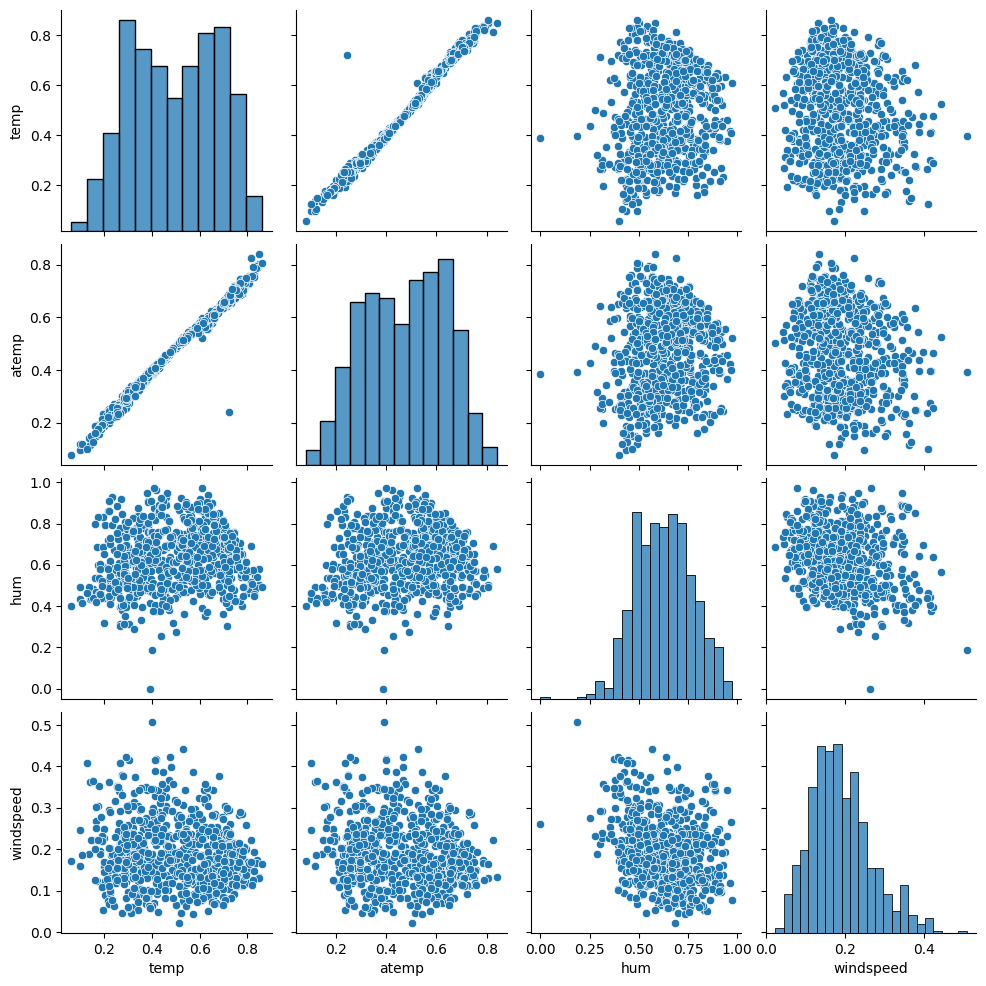

In [7]:
sns.pairplot(X)
plt.show()

Clairement, atemp et temp sont corrélé positivement.Pour le reste, c'est incertain. 

<Figure size 1000x600 with 0 Axes>

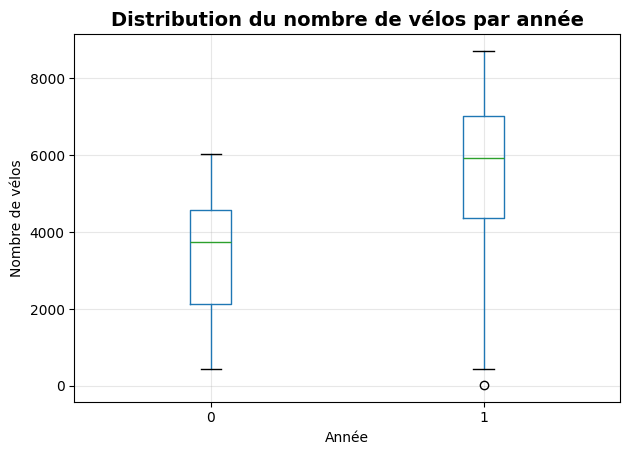

In [8]:
plt.figure(figsize=(10, 6))
data.boxplot(column='cnt', by='yr')
plt.suptitle('')  # Enlever le titre automatique
plt.title('Distribution du nombre de vélos par année', fontsize=14, fontweight='bold')
plt.xlabel('Année')
plt.ylabel('Nombre de vélos')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

L'année est aussi un paramètre à prendre en compte pour prédire le nombre de vélo. Il y a clairement une tendance.

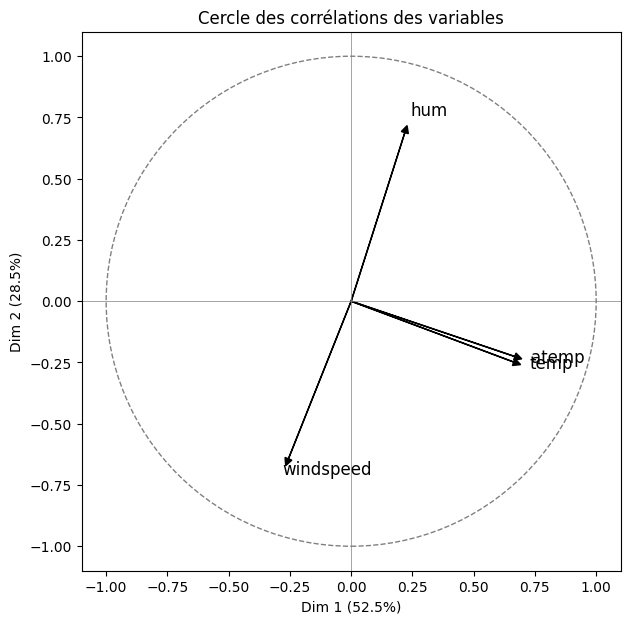

In [9]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)

pca.fit(X_scaled)
components = pca.components_.T  

fig, ax = plt.subplots(figsize=(7,7))

circle = plt.Circle((0,0), 1, color='grey', fill=False, linestyle='--')
ax.add_artist(circle)

for i, var in enumerate(X.columns):
    x = components[i, 0]
    y = components[i, 1]
    ax.arrow(0, 0, x, y, 
             head_width=0.03, 
             head_length=0.03, 
             linewidth=1, 
             color="black")
    ax.text(x * 1.1, y * 1.1, var, fontsize=12)

ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
ax.set_xlabel(f"Dim 1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
ax.set_ylabel(f"Dim 2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
ax.set_title("Cercle des corrélations des variables")
ax.axhline(0, color='grey', linewidth=0.5)
ax.axvline(0, color='grey', linewidth=0.5)
ax.set_aspect('equal')

plt.show()

On voit que atemp et temp sont fortement corrélé et représente les vecteurs qui représente le mieux la dimension principale. Tandis que windspeed et humidité sont corrélé négativement avec des flèches dont l'angle est proche de 180°. 

C:\Users\enzom\AppData\Local\Temp\ipykernel_35500\1711461745.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_factor[col] = X_factor[col].astype("category")
C:\Users\enzom\AppData\Local\Temp\ipykernel_35500\1711461745.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_factor[col] = X_factor[col].astype("category")
C:\Users\enzom\AppData\Local\Temp\ipykernel_35500\1711461745.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

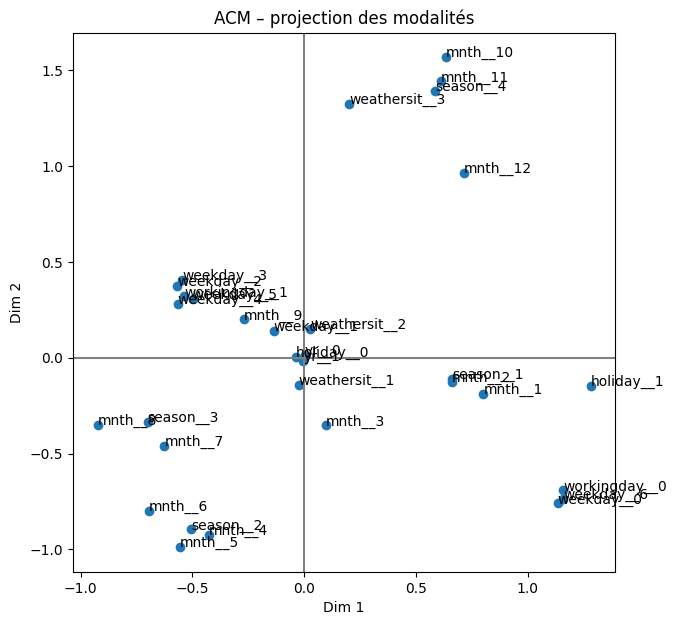

In [10]:
import prince

X_factor = data[["yr", "season", "mnth", "holiday",
                 "weekday", "workingday", "weathersit"]]

# Convertir en catégories
for col in X_factor.columns:
    X_factor[col] = X_factor[col].astype("category")

# ACM avec engine correct
mca = prince.MCA(
    n_components=2,
    n_iter=5,
    engine='sklearn', 
    random_state=42
)

mca = mca.fit(X_factor)

coords = mca.column_coordinates(X_factor)
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7, 7))

coords = mca.column_coordinates(X_factor)

ax.scatter(coords[0], coords[1])

for i, txt in enumerate(coords.index):
    ax.annotate(txt, (coords.iloc[i,0], coords.iloc[i,1]))

plt.axhline(0, color="grey")
plt.axvline(0, color="grey")
plt.title("ACM – projection des modalités")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.show()



On voit nettement des clusters. season_4 est proche de mnth_11 mnth_12... season_4 est l'hiver. Pour éviter d'avoir un cercle de corélation trop dense, on va supprimer de l'analyse factorielle les mois et garder uniquement les saisons. 

C:\Users\enzom\AppData\Local\Temp\ipykernel_35500\2040214358.py:90: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


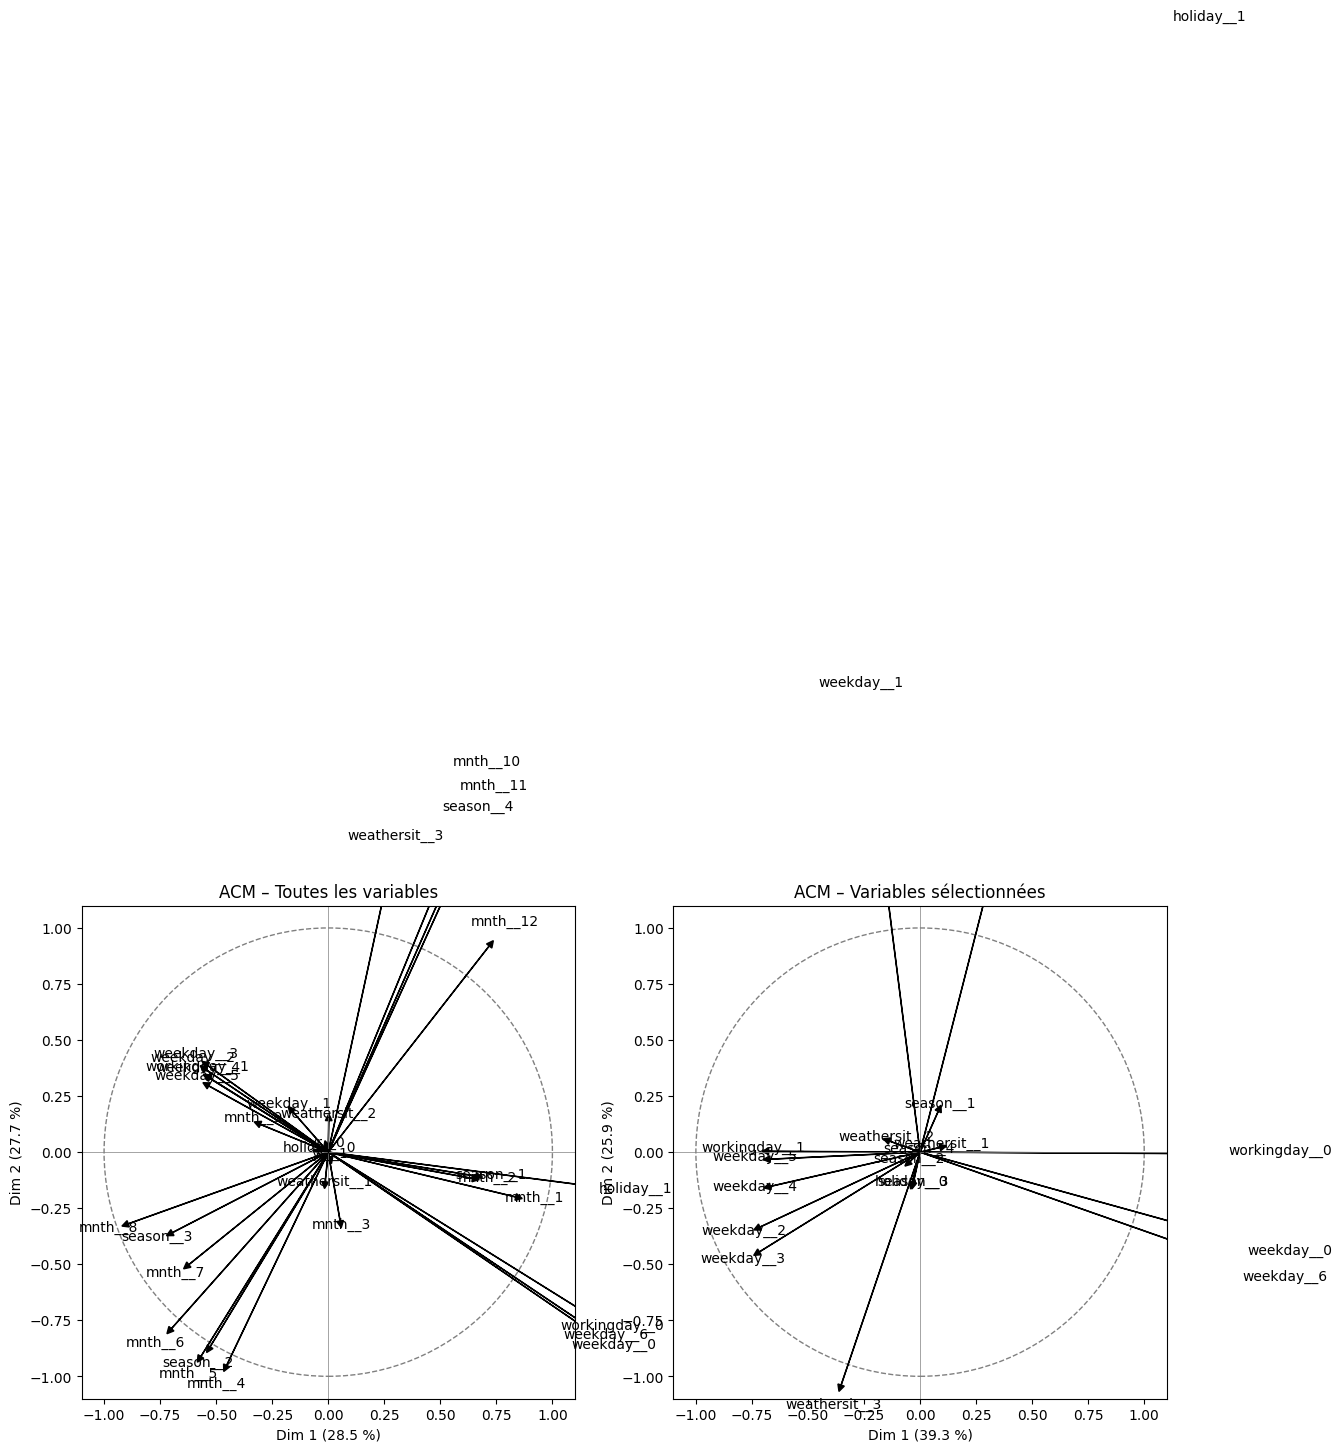

In [11]:
variables_categorielles = [
    "season", "holiday",
    "weekday", "workingday", "weathersit", "mnth", "yr"
]
variables_cat2 = [
    "season", "holiday",
    "weekday", "workingday", "weathersit"
]

X_factor = data[variables_categorielles].copy()
X_factor = X_factor.astype("category")

X_factor2 = data[variables_cat2].copy()
X_factor2 = X_factor2.astype("category")

mca = prince.MCA(
    n_components=2,
    n_iter=5,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)
mca.fit(X_factor)

mca2 = prince.MCA(
    n_components=2,
    n_iter=5,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)
mca2.fit(X_factor2)

coords = mca.column_coordinates(X_factor)
inertia = mca.eigenvalues_
dim1, dim2 = inertia[0], inertia[1]

coords2 = mca2.column_coordinates(X_factor2)
inertia2 = mca2.eigenvalues_
dim1_2, dim2_2 = inertia2[0], inertia2[1]

fig, ax = plt.subplots(1, 2, figsize=(14, 7))

cercle1 = plt.Circle((0, 0), 1, color='grey', fill=False, linestyle='--')
ax[0].add_artist(cercle1)

for modalite, (x, y) in coords.iterrows():
    ax[0].arrow(
        0, 0, x, y,
        head_width=0.03,
        head_length=0.03,
        linewidth=1,
        color="black"
    )
    ax[0].text(x * 1.1, y * 1.1, modalite, fontsize=10, ha='center')

ax[0].set_xlim(-1.1, 1.1)
ax[0].set_ylim(-1.1, 1.1)
ax[0].set_xlabel(f"Dim 1 ({dim1 * 100:.1f} %)")
ax[0].set_ylabel(f"Dim 2 ({dim2 * 100:.1f} %)")
ax[0].set_title("ACM – Toutes les variables")
ax[0].axhline(0, color='grey', linewidth=0.5)
ax[0].axvline(0, color='grey', linewidth=0.5)
ax[0].set_aspect('equal')

cercle2 = plt.Circle((0, 0), 1, color='grey', fill=False, linestyle='--')
ax[1].add_artist(cercle2)

for modalite, (x, y) in coords2.iterrows():
    ax[1].arrow(
        0, 0, x, y,
        head_width=0.03,
        head_length=0.03,
        linewidth=1,
        color="black"
    )
    ax[1].text(x * 1.1, y * 1.1, modalite, fontsize=10, ha='center')

ax[1].set_xlim(-1.1, 1.1)
ax[1].set_ylim(-1.1, 1.1)
ax[1].set_xlabel(f"Dim 1 ({dim1_2 * 100:.1f} %)")
ax[1].set_ylabel(f"Dim 2 ({dim2_2 * 100:.1f} %)")
ax[1].set_title("ACM – Variables sélectionnées")
ax[1].axhline(0, color='grey', linewidth=0.5)
ax[1].axvline(0, color='grey', linewidth=0.5)
ax[1].set_aspect('equal')

plt.tight_layout()
plt.show()

J'ai commencé mon approche en enlevant les features contenant l'année et les mois. Nous avons obtenu le cercle de corrélation de droite. Nous avons dans un premier temps analysé que la composante principale capte essentiellement la variabilité comprise dans workingday = False. L’axe 2 oppose :
des jours particuliers (lundi, jour férié) à des situations de météo très dégradée (weathersit_3). Les deux axes représentent 65,2% de l’inertie, soit une bonne représentation globale pour une ACM. Si on veut par la suite éliminer ou ajouter des variables catégorielles dans notre modèle mais pas trop, on pourrait tester avec un set de variables non corrélés. On va essayer une régression linéaire simple avec les variables catégorielles : workingday et weathersit même si weathersit est potentielement fortement corrélé aux données quantitatives de vent, d'humidité et de température. Si les p_values sont faibles. On les incluera dans le modèle. Prendre holiday et working day même s'ils apparraissent décorrélé sur le cercle, on sait en pratique qu'ils sont fortement corrélés. 

En plottant le cercle de corrélation avec l'ensemble des features catégorielles, on a désormais plus le problème avec les features holiday et working day qui apparaisse plus corrélé. On dégage mieux le fait qu'il y ait un groupe [bad weather, mois de l'hiver] et à l'opposé [good weather, mois d'été] et perpendiculairement, les jours travaillés et les jours non travaillé. 

In [12]:
contingence = pd.crosstab(data["holiday"], data["workingday"],
                   rownames=["holiday"],
                   colnames=["workingday"])

print(contingence)

workingday    0    1
holiday             
0           210  500
1            21    0


Comme on le voit sur la matrice de contingence on ne peut pas travailler et être en vacances. Le cas contraire aurait remis en question l'intégrité de la base de donnée. 

In [13]:
import statsmodels.api as sm

y = data["cnt"]
test_cat = ["weathersit", "workingday", 'yr']

X_categories = X_factor.loc[:,test_cat]
x = pd.get_dummies(X_categories, drop_first=True)#on retire la première variable sinon la matrice n'est pas inversible.

x = x.astype(int)
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     123.8
Date:                Thu, 04 Dec 2025   Prob (F-statistic):           1.54e-80
Time:                        14:01:58   Log-Likelihood:                -6379.6
No. Observations:                 731   AIC:                         1.277e+04
Df Residuals:                     726   BIC:                         1.279e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3570.1233    119.741     29.815   

Le modèle de régression linéaire avec les variables catégorielles démontre que pour les features catégorielles choisient (year, condition météo, working_day) expliquent en parti le nombre de vélos utilisés au total. (p_values < 0.05)

In [14]:
X_scaled = X_scaled[:, [0, 2, 3]]

On supprime atemp colinéaire à temp

On supprime la variable quantitative atemp mais on choisit de garder dans un premier temps toutes les variables catégorielles pour le modèle de clssification. 

In [15]:
import random
def seed_everything(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    pl.seed_everything(seed, workers=True)

seed_everything(42)

Seed set to 42


Les résultats variaient selon les éxecutions, or ça pose problème quand on analyse les résultats, un indicateur statistique peut varier entre 2 executions. 

In [16]:
y_binary = (data["cnt"] > 4000).astype(int)  # 1 si >4000, 0 sinon
y = y = y_binary.values 

test_cat = ["weathersit", "workingday", 'yr', 'season', 'mnth', 'holiday', 'weekday']

X_cat = pd.get_dummies(X_factor.loc[:, test_cat], drop_first=True)
X_final = pd.concat([pd.DataFrame(X_scaled), X_cat.reset_index(drop=True)], axis=1)
X_final = X_final.astype(float)

x_train, x_test, y_train, y_test = train_test_split(
    X_final.values,
    y,  
    stratify=y, 
    test_size=0.2,
    random_state=123
)

x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
x_test = torch.tensor(x_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

train_dataset = TensorDataset(x_train, y_train)
test_dataset = TensorDataset(x_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape :", x_test.shape)


x_train shape: torch.Size([584, 28])
y_train shape: torch.Size([584])
x_test shape : torch.Size([147, 28])


In [17]:


class BikeModelBinaryClassification(pl.LightningModule):
    def __init__(self, input_dim, lr=1e-3):
        super(BikeModelBinaryClassification, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.Linear(32,16),
            nn.ReLU(),
            nn.Linear(16, 2) 
        )
        self.loss_fn = nn.CrossEntropyLoss()  
        self.lr = lr
        
    def forward(self, x):
        return self.layers(x)

    def training_step(self, batch, batch_idx):
        x, y = batch
        yhat = self.forward(x)
        loss = self.loss_fn(yhat, y)
        
        predictions = torch.argmax(yhat, dim=1)
        accuracy = (predictions == y).float().mean()

        self.log(f"train_loss", loss, on_step=False, on_epoch=True, prog_bar=True)
        self.log(f"train_acc", accuracy, on_step=False, on_epoch=True, prog_bar=True)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        yhat = self.forward(x)
        loss = self.loss_fn(yhat, y)
        
        predictions = torch.argmax(yhat, dim=1)
        accuracy = (predictions == y).float().mean()
        
        self.log(f"val_loss", loss, on_epoch=True, on_step=False, prog_bar=True)
        self.log(f"val_acc", accuracy, on_step=False, on_epoch=True, prog_bar=True)

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.lr)
        return optimizer


model = BikeModelBinaryClassification(x_train.shape[1], lr=1e-3)

summary = ModelSummary(model)
print(summary)



  | Name    | Type             | Params | Mode  | FLOPs
-------------------------------------------------------------
0 | layers  | Sequential       | 1.5 K  | train | 0    
1 | loss_fn | CrossEntropyLoss | 0      | train | 0    
-------------------------------------------------------------
1.5 K     Trainable params
0         Non-trainable params
1.5 K     Total params
0.006     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode
0         Total Flops


GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name    | Type             | Params | Mode  | FLOPs
-------------------------------------------------------------
0 | layers  | Sequential       | 1.5 K  | train | 0    
1 | loss_fn | CrossEntropyLoss | 0      | train | 0    
-------------------------------------------------------------
1.5 K     Trainable params
0         Non-trainable params
1.5 K     Total params
0.006     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode
0         Total Flops


c:\Users\enzom\OneDrive\Bureau\MINES\SDD\Mines_data_science\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:434: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.
c:\Users\enzom\OneDrive\Bureau\MINES\SDD\Mines_data_science\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:434: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


Epoch 44: 100%|██████████| 73/73 [00:00<00:00, 186.85it/s, v_num=Data, val_loss=0.302, val_acc=0.912, train_loss=0.079, train_acc=0.971] 

`Trainer.fit` stopped: `max_epochs=45` reached.


Epoch 44: 100%|██████████| 73/73 [00:00<00:00, 186.18it/s, v_num=Data, val_loss=0.302, val_acc=0.912, train_loss=0.079, train_acc=0.971]
temps nécessaire pour entraîner :  18.835439682006836


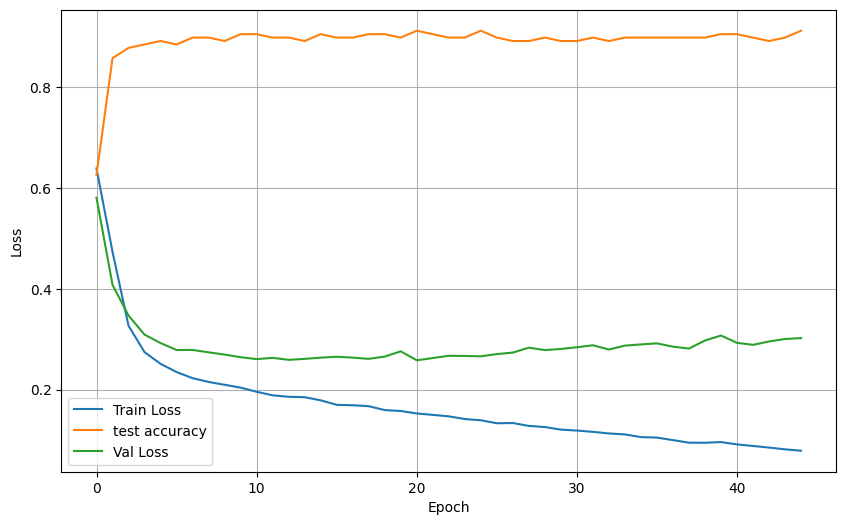

In [18]:
import time 
start_time = time.time()
trainer = pl.Trainer(
    max_epochs=45,
    logger=SimpleLogger(),
    enable_checkpointing=False,
    log_every_n_steps=1,
)  

trainer.fit(model, train_loader, test_loader)
end_time = time.time()

print("temps nécessaire pour entraîner : ", end_time - start_time)
plt.figure(figsize=(10, 6))
plt.plot(trainer.logger.metrics["train_loss"], label="Train Loss")
plt.plot(trainer.logger.metrics["val_acc"], label="test accuracy")
plt.plot(trainer.logger.metrics["val_loss"], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()


In [19]:
x_train.shape[1]

28

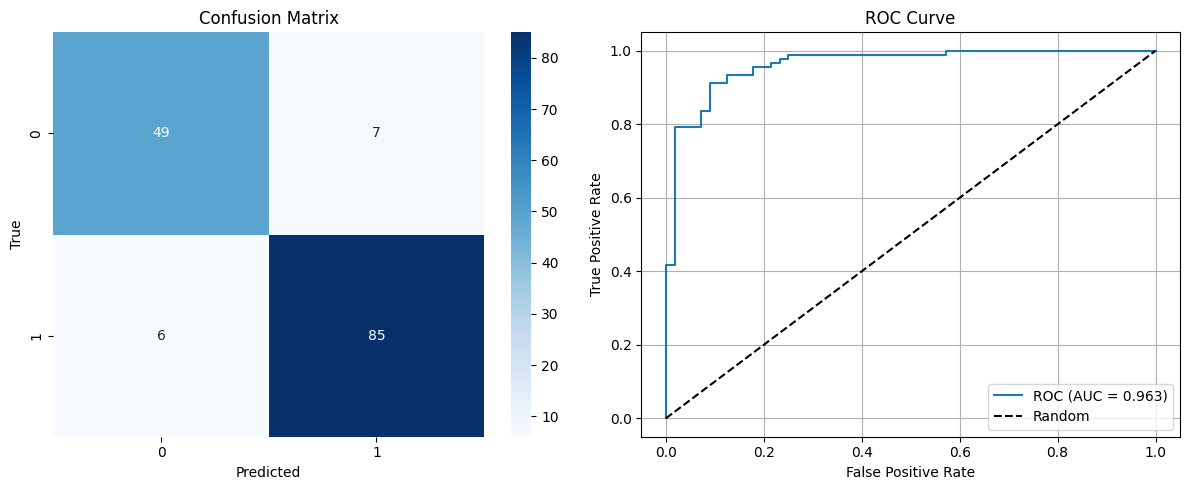

La sensibilité : 0.9340659340659341
la spécificité :  0.875


In [20]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns

# Prédictions
model.eval()
with torch.no_grad():
    y_pred_probs = torch.softmax(model(x_test), dim=1)[:, 1].numpy()
    y_pred = (y_pred_probs > 0.5).astype(int)

y_true = y_test.numpy()

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True')
plt.xlabel('Predicted')

# ROC Curve
fpr, tpr, _ = roc_curve(y_true, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, label=f'ROC (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

cm = confusion_matrix(y_true, y_pred)
VN, FP, FN, VP = cm.ravel()
print("La sensibilité :" ,  VP / (VP + FN))
print("la spécificité : ", VN / (FP + VN))

On obtient des résultats bon. Comparé à d'autres points de la courbe ROC, Pour un seuil à 0.5 on fait le trade d'avoir une meilleure sensibilité et une moins bonne spécificité 

On reprend le même MLP mais cette fois on veut comparer l'influence de la diminution du nombre de données factorielles en entrée. Les prédicteurs éliminés ont été jugé dans la partie exploratoire comme étant corrélé avec les prédicteurs choisi. 

In [21]:
y_binary = (data["cnt"] > 4000).astype(int)  # 1 si >4000, 0 sinon
y = y = y_binary.values 

test_cat = ["weathersit", "workingday", 'yr']

X_cat = pd.get_dummies(X_factor.loc[:, test_cat], drop_first=True)
X_final = pd.concat([pd.DataFrame(X_scaled), X_cat.reset_index(drop=True)], axis=1)
X_final = X_final.astype(float)

x_train, x_test, y_train, y_test = train_test_split(
    X_final.values,
    y,  
    stratify=y, 
    test_size=0.2,
    random_state=123
)

x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
x_test = torch.tensor(x_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

train_dataset = TensorDataset(x_train, y_train)
test_dataset = TensorDataset(x_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape :", x_test.shape)


x_train shape: torch.Size([584, 7])
y_train shape: torch.Size([584])
x_test shape : torch.Size([147, 7])


In [22]:
model = BikeModelBinaryClassification(x_train.shape[1], lr=1e-3)


GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name    | Type             | Params | Mode  | FLOPs
-------------------------------------------------------------
0 | layers  | Sequential       | 818    | train | 0    
1 | loss_fn | CrossEntropyLoss | 0      | train | 0    
-------------------------------------------------------------
818       Trainable params
0         Non-trainable params
818       Total params
0.003     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode
0         Total Flops


c:\Users\enzom\OneDrive\Bureau\MINES\SDD\Mines_data_science\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:434: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.
c:\Users\enzom\OneDrive\Bureau\MINES\SDD\Mines_data_science\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:434: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


Epoch 44: 100%|██████████| 73/73 [00:00<00:00, 183.66it/s, v_num=Data, val_loss=0.315, val_acc=0.871, train_loss=0.213, train_acc=0.914]

`Trainer.fit` stopped: `max_epochs=45` reached.


Epoch 44: 100%|██████████| 73/73 [00:00<00:00, 182.80it/s, v_num=Data, val_loss=0.315, val_acc=0.871, train_loss=0.213, train_acc=0.914]
temps nécessaire pour entraîner :  19.114580392837524


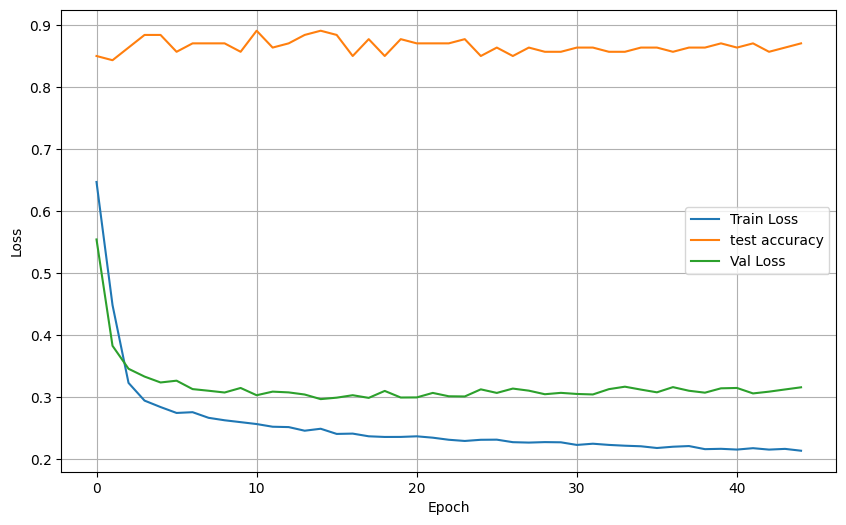

In [23]:
start_time = time.time()
trainer = pl.Trainer(
    max_epochs=45,
    logger=SimpleLogger(),
    enable_checkpointing=False,
    log_every_n_steps=1,
)  

trainer.fit(model, train_loader, test_loader)
end_time = time.time()

print("temps nécessaire pour entraîner : ", end_time - start_time)
plt.figure(figsize=(10, 6))
plt.plot(trainer.logger.metrics["train_loss"], label="Train Loss")
plt.plot(trainer.logger.metrics["val_acc"], label="test accuracy")
plt.plot(trainer.logger.metrics["val_loss"], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()


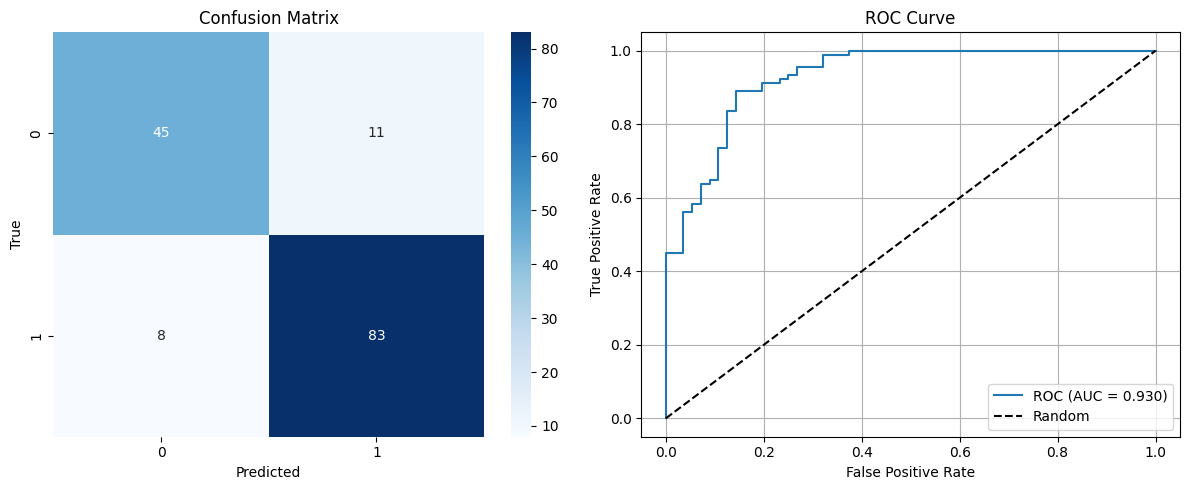

In [24]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns

# Prédictions
model.eval()
with torch.no_grad():
    y_pred_probs = torch.softmax(model(x_test), dim=1)[:, 1].numpy()
    y_pred = (y_pred_probs > 0.5).astype(int)

y_true = y_test.numpy()

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True')
plt.xlabel('Predicted')

# ROC Curve
fpr, tpr, _ = roc_curve(y_true, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, label=f'ROC (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

gain_temps = (18.638004302978516 - 18.574875354766846) / 18.638004302978516

In [ ]:
gain_temps *100

On obtient de moins bon résultat avec une AUC = 0.930 < 0.96 mais on a gagné 0.3% de temps. Concrètement, on ne peut pas dire que le trade est intéressant dans ce cas de diminuer la taille du vecteur d'entrée pour diminuer la durée d'entraînement du modèle. 


Difficulté après 50 epoch, on remarque que le modèle diverge. 

On a voulu comparer la régression suivie d’une classification avec un modèle de classification directe pour voir si toute l’info utile pour classifier est captée en régression. Le but est de savoir à quelle point le modèle de régression est moins adaptée pour cette tâche.

In [25]:


y = data["cnt"]
y = y.values.reshape(-1, 1)

X_categories = X_factor.loc[:, test_cat]
x_cat = pd.get_dummies(X_categories, drop_first=True)
#On enlève les premières modalités pour éviter la redondance dans les variables catégorielles : workingday_1 + workingday_0 = 1
print(x_cat.head())
X_final = pd.concat([pd.DataFrame(X_scaled), x_cat.reset_index(drop=True)], axis=1)
X_final = X_final.astype(float)

print("Données finales :")
print(X_final.head())
print(f"Shape : {X_final.shape}")

stratify_columns = data[["weathersit", "workingday", 'yr']]

x_train, x_test, y_train, y_test = train_test_split(
    X_final.values,
    y,
    stratify=stratify_columns,
    test_size=0.2,
    random_state=123
)

x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
x_test = torch.tensor(x_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

train_dataset = TensorDataset(x_train, y_train)
test_dataset = TensorDataset(x_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

print(f"\nx_train shape : {x_train.shape}")
print(f"y_train shape : {y_train.shape}")
print(f"x_test shape : {x_test.shape}")
print(f"y_test shape : {y_test.shape}")

   weathersit_2  weathersit_3  workingday_1   yr_1
0          True         False         False  False
1          True         False         False  False
2         False         False          True  False
3         False         False          True  False
4         False         False          True  False
Données finales :
          0         1         2  weathersit_2  weathersit_3  workingday_1  \
0 -0.826662  1.250171 -0.387892           1.0           0.0           0.0   
1 -0.721095  0.479113  0.749602           1.0           0.0           0.0   
2 -1.634657 -1.339274  0.746632           0.0           0.0           1.0   
3 -1.614780 -0.263182 -0.389829           0.0           0.0           1.0   
4 -1.467414 -1.341494 -0.046307           0.0           0.0           1.0   

   yr_1  
0   0.0  
1   0.0  
2   0.0  
3   0.0  
4   0.0  
Shape : (731, 7)

x_train shape : torch.Size([584, 7])
y_train shape : torch.Size([584, 1])
x_test shape : torch.Size([147, 7])
y_test shape : torch.Size

 ## Model Definition

  | Name       | Type       | Params | Mode  | FLOPs
----------------------------------------------------------
0 | activation | ReLU       | 0      | train | 0    
1 | layers     | Sequential | 4.5 K  | train | 0    
2 | mse        | MSELoss    | 0      | train | 0    
----------------------------------------------------------
4.5 K     Trainable params
0         Non-trainable params
4.5 K     Total params
0.018     Total estimated model params size (MB)
10        Modules in train mode
0         Modules in eval mode
0         Total Flops


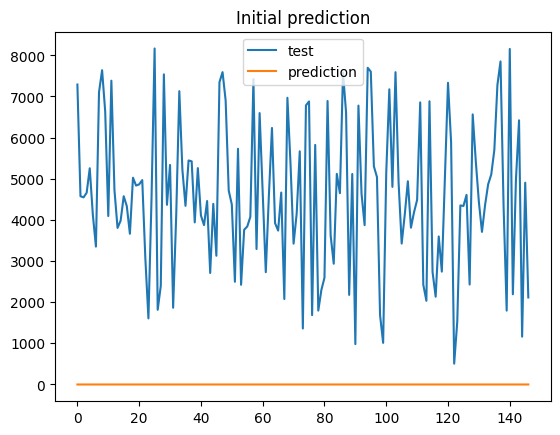

In [26]:
class Bike_model(pl.LightningModule):
    def __init__(self, input_dim, lr=1e-3):
        super(Bike_model, self).__init__()
        self.activation = nn.ReLU()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)   
        )
        self.mse = nn.MSELoss()
        self.lr = lr

    def forward(self, x):
        return self.layers(x)

    def training_step(self, batch, batch_idx):
        x, y = batch
        yhat = self.layers(x)
        loss = self.mse(yhat, y)
        self.log(f"train_loss", loss, on_step=False, on_epoch=True, prog_bar=True)
        return loss

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.lr)
        return [optimizer]

    def validation_step(self, batch, batch_idx):
        x, y = batch
        yhat = self.forward(x)
        loss = self.mse(yhat, y)
        self.log(f"val_loss", loss, on_epoch=True, on_step=False, prog_bar=True)

model = Bike_model(x_train.shape[1], lr=1e-4)
summary = ModelSummary(model)
print(summary)
plt.plot(y_test, label="test")
plt.plot(model(x_test).detach(), label="prediction")
plt.title("Initial prediction")
plt.legend()

Le premier modèle entraîné est un MLP avec comme y de sortie la colonne cnt qui compte le nombre de vélos utilisés.

 ## Train the Model

In [27]:
trainer = pl.Trainer(
    max_epochs=50,
    logger=SimpleLogger(),
    enable_checkpointing=False,
    log_every_n_steps=1,
)  # logger=False, enable_checkpointing=False to avoid polluting your workspace with lightning_logs and checkpoints

GPU available: False, used: False
TPU available: False, using: 0 TPU cores


In [28]:
trainer.fit(model, train_dataloaders=train_loader, val_dataloaders=test_loader)


  | Name       | Type       | Params | Mode  | FLOPs
----------------------------------------------------------
0 | activation | ReLU       | 0      | train | 0    
1 | layers     | Sequential | 4.5 K  | train | 0    
2 | mse        | MSELoss    | 0      | train | 0    
----------------------------------------------------------
4.5 K     Trainable params
0         Non-trainable params
4.5 K     Total params
0.018     Total estimated model params size (MB)
10        Modules in train mode
0         Modules in eval mode
0         Total Flops


c:\Users\enzom\OneDrive\Bureau\MINES\SDD\Mines_data_science\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:434: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.
c:\Users\enzom\OneDrive\Bureau\MINES\SDD\Mines_data_science\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:434: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


Epoch 49: 100%|██████████| 73/73 [00:00<00:00, 201.49it/s, v_num=Data, val_loss=1.99e+6, train_loss=2.02e+6]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 49: 100%|██████████| 73/73 [00:00<00:00, 200.73it/s, v_num=Data, val_loss=1.99e+6, train_loss=2.02e+6]


 ## Evaluate Model

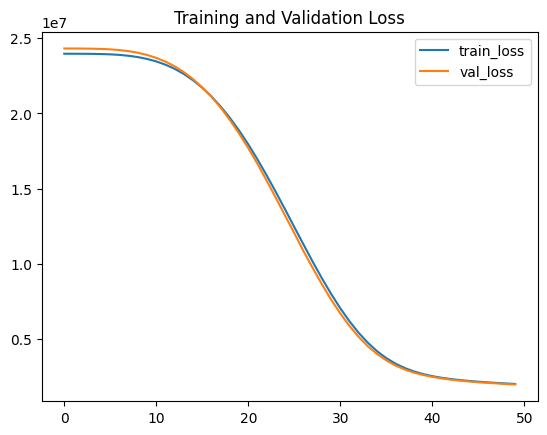

In [29]:
plt.plot(trainer.logger.metrics["train_loss"], label="train_loss")
plt.plot(trainer.logger.metrics["val_loss"], label="val_loss")
plt.title("Training and Validation Loss")
plt.legend()

Ici on représente la MSE au fur et à mesure des epoch. On voit que les améliorations du modèle  sont minim après 50 epoch, on diminuera le nombre d'epoch par la suite. Il nous reste encore à compter les prédictions mal classé. 

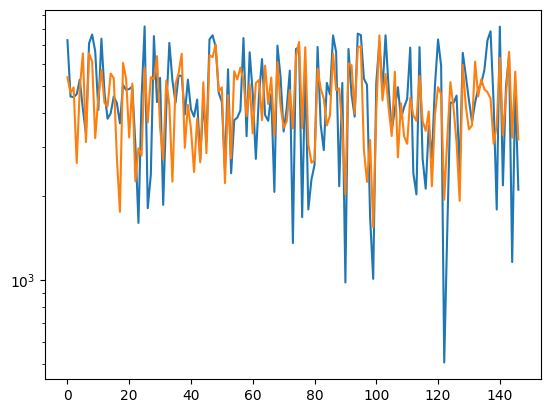

In [30]:
plt.plot(y_test)
plt.plot(model(x_test).detach())
plt.yscale("log")
plt.show()

Prédiction du modèle sur les données test. Il y a un bon suivi des tendances même dans les parties les moins linéaires.


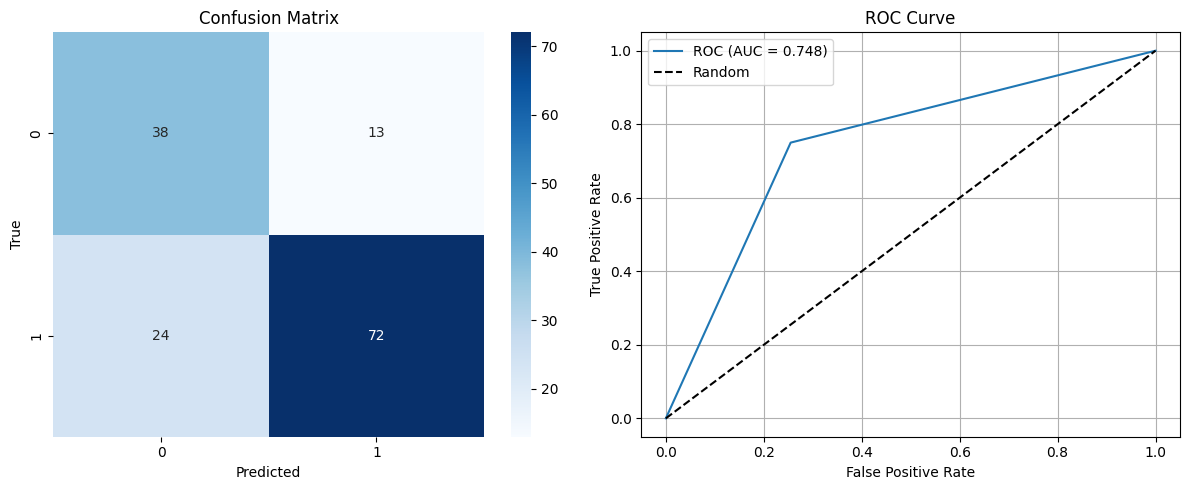

In [31]:
from sklearn.metrics import confusion_matrix
y_pred = model(x_test).detach().numpy().flatten()

# Binariser avec seuil 4000
y_test_bin = (y_test.numpy() >= 4000).astype(int)
y_pred_bin = (y_pred >= 4000).astype(int)

cm = confusion_matrix(y_test_bin, y_pred_bin)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True')
plt.xlabel('Predicted')

# ROC Curve
fpr, tpr, _ = roc_curve(y_test_bin, y_pred_bin)
roc_auc = auc(fpr, tpr)

plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, label=f'ROC (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

Le modèle de régression est beaucoup moins adaptée à la classification. En comparaison avec le modèle de classification précédent, l'AUC de 0.748 est plus petit par rapport à 0.930.

Dans un second temps on décide d'entraîner un 2ème MLP pour la régression parce que dans nos données d'entraînement on fait la distinction entre le nombre d’usagers à la fois abonnés et non abonnés.

Le mieux : faire des courches pour évaluer y_1 et y_2 et après une couche y_final = somme des 2 sigma(supérieur pu inférieur à 4000). 

In [32]:
y = data[["registered", "casual"]]
y = y.values.reshape((-1,2))
X_categories = X_factor.loc[:, test_cat]
x_cat = pd.get_dummies(X_categories, drop_first=True)
#On enlève les premières modalités pour éviter la redondance dans les variables catégorielles : workingday_1 + workingday_0 = 1

X_final = pd.concat([pd.DataFrame(X_scaled), x_cat.reset_index(drop=True)], axis=1)
X_final = X_final.astype(float)

x_train, x_test, y_train, y_test = train_test_split(
    X_final.values,
    y,
    stratify=stratify_columns,
    test_size=0.2,
    random_state=123
)

x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
x_test = torch.tensor(x_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)


In [33]:
train_dataset = TensorDataset(x_train, y_train)
test_dataset = TensorDataset(x_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

print("x_train shape:", x_train.shape)
print("x_test shape :", x_test.shape)


x_train shape: torch.Size([584, 7])
x_test shape : torch.Size([147, 7])


In [34]:
class bikemodel_2_output(pl.LightningModule):
    def __init__(self, input_dim, lr=1e-3):
        super(bikemodel_2_output, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 2)   # deux sorties : casual, registered
        )
        self.mse = nn.MSELoss()
        self.lr = lr
    def forward(self, x):
        return self.layers(x)

    def training_step(self, batch, batch_idx):
        x, y = batch
        yhat = self.layers(x)
        loss = self.mse(yhat, y)
        mae = (yhat - y).abs().mean(1)
        self.log(f"train_loss", loss, on_step=False, on_epoch=True, prog_bar=True)
        return loss

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.lr)
        return [optimizer]

    def validation_step(self, batch, batch_idx):
        x, y = batch
        yhat = self.forward(x)
        loss = self.mse(yhat, y)
        self.log(f"val_loss", loss, on_epoch=True, on_step=False, prog_bar=True)

model = bikemodel_2_output(x_train.shape[1], lr=1e-4)
summary = ModelSummary(model)
print(summary)

  | Name   | Type       | Params | Mode  | FLOPs
------------------------------------------------------
0 | layers | Sequential | 4.5 K  | train | 0    
1 | mse    | MSELoss    | 0      | train | 0    
------------------------------------------------------
4.5 K     Trainable params
0         Non-trainable params
4.5 K     Total params
0.018     Total estimated model params size (MB)
9         Modules in train mode
0         Modules in eval mode
0         Total Flops


In [36]:
trainer = pl.Trainer(
    max_epochs=50,
    logger=SimpleLogger(),
    enable_checkpointing=False,
    log_every_n_steps=1,
)  # logger=False, enable_checkpointing=False to avoid polluting your workspace with lightning_logs and checkpoints

GPU available: False, used: False
TPU available: False, using: 0 TPU cores


Avec seulement 50 epoch c'est assez.

In [37]:
trainer.fit(model, train_dataloaders=train_loader, val_dataloaders=test_loader)


  | Name   | Type       | Params | Mode  | FLOPs
------------------------------------------------------
0 | layers | Sequential | 4.5 K  | train | 0    
1 | mse    | MSELoss    | 0      | train | 0    
------------------------------------------------------
4.5 K     Trainable params
0         Non-trainable params
4.5 K     Total params
0.018     Total estimated model params size (MB)
9         Modules in train mode
0         Modules in eval mode
0         Total Flops


c:\Users\enzom\OneDrive\Bureau\MINES\SDD\Mines_data_science\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:434: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.
c:\Users\enzom\OneDrive\Bureau\MINES\SDD\Mines_data_science\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:434: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


Epoch 49: 100%|██████████| 73/73 [00:00<00:00, 198.19it/s, v_num=Data, val_loss=6.87e+5, train_loss=6.98e+5]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 49: 100%|██████████| 73/73 [00:00<00:00, 197.50it/s, v_num=Data, val_loss=6.87e+5, train_loss=6.98e+5]


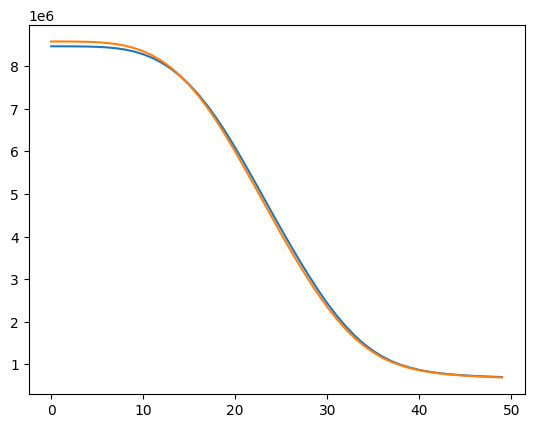

In [38]:

plt.plot(trainer.logger.metrics["train_loss"])
plt.plot(trainer.logger.metrics["val_loss"])
plt.show()

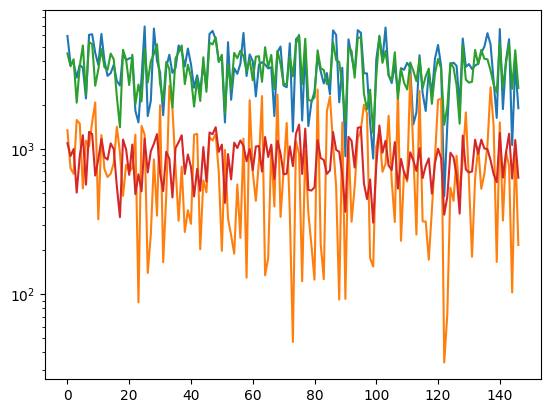

In [39]:
plt.plot(y_test)
plt.plot(model(x_test).detach())
plt.yscale("log")
plt.show()

Les prédictions sur registered sont meilleurs que sur casual qui doit sûrement avoir plus de variance. 

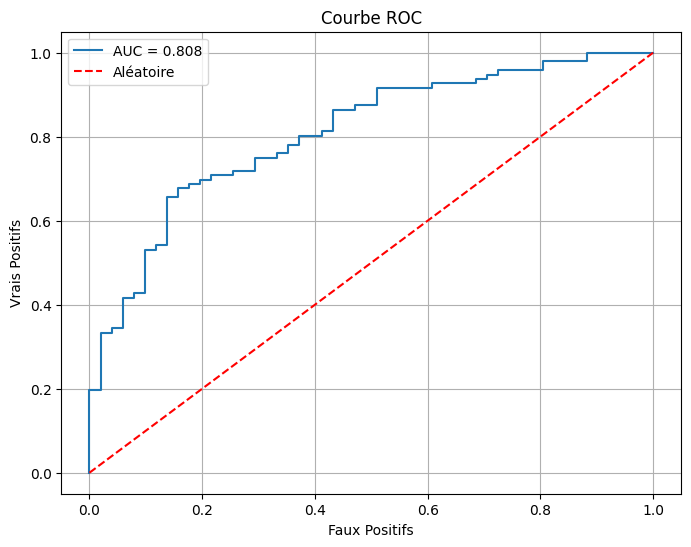

Score AUC: 0.808


In [40]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Prédictions
model.eval()
predictions = []
actuals = []

with torch.no_grad():
    for x, y in test_loader:
        predictions.append(model(x))
        actuals.append(y)

predictions = torch.cat(predictions).cpu().numpy()
actuals = torch.cat(actuals).cpu().numpy()

# Total vélos (somme des 2 colonnes)
pred_total = predictions[:, 0] + predictions[:, 1]
actual_total = actuals[:, 0] + actuals[:, 1]

# Classes binaires (>4000 = 1, sinon 0)
actual_class = (actual_total > 4000).astype(int)

fpr, tpr, thresholds = roc_curve(actual_class, pred_total)
auc_score = auc(fpr, tpr)

# Graphique
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.3f}')
plt.plot([0, 1], [0, 1], 'r--', label='Aléatoire')
plt.xlabel('Faux Positifs')
plt.ylabel('Vrais Positifs')
plt.title('Courbe ROC')
plt.legend()
plt.grid()
plt.show()

print(f"Score AUC: {auc_score:.3f}")

L'AUC est amélioré par rapport au modèle entraîné pour la régression mais il est moins bon pour la classification que les modèles de classification. 

# Question 5
Régression logistique


VP: 81, VN: 43, FP: 13, FN: 10


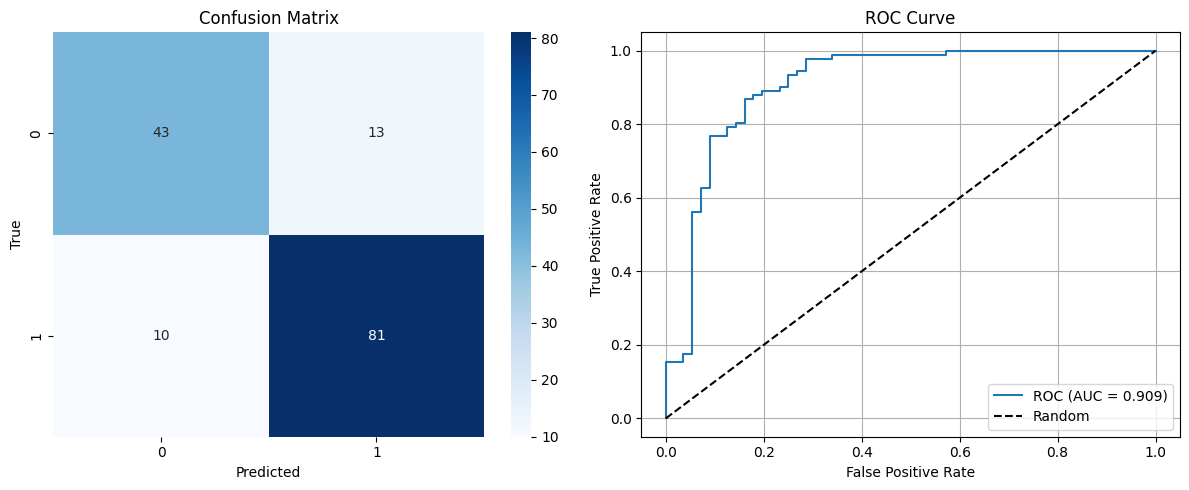

In [41]:
y_binary = (data["cnt"] > 4000).astype(int)  # 1 si >4000, 0 sinon

y = y_binary 
x_train, x_test, y_train, y_test = train_test_split(
    X_final.values,
    y,
    stratify=y.values,
    test_size=0.2,
    random_state=123
)

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)
y_pred = log_reg.predict(x_test)

# Prédictions
y_pred_probs = log_reg.predict_proba(x_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
VN, FP, FN, VP = cm.ravel()

print(f"VP: {VP}, VN: {VN}, FP: {FP}, FN: {FN}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True')
plt.xlabel('Predicted')

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, label=f'ROC (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

L'AUC obtenu montre que la régression logistique arrive moins bien à classer que le MLP. 0.909  < 0.935.

# **Partie 2 : Série temporelle**

INFORMATIONS DE BASE
Période couverte: de 2011-01-01 00:00:00 à 2012-12-31 00:00:00
Nombre de jours: 731
Valeurs manquantes dans cnt: 0

Statistiques descriptives de cnt:
count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: cnt, dtype: float64


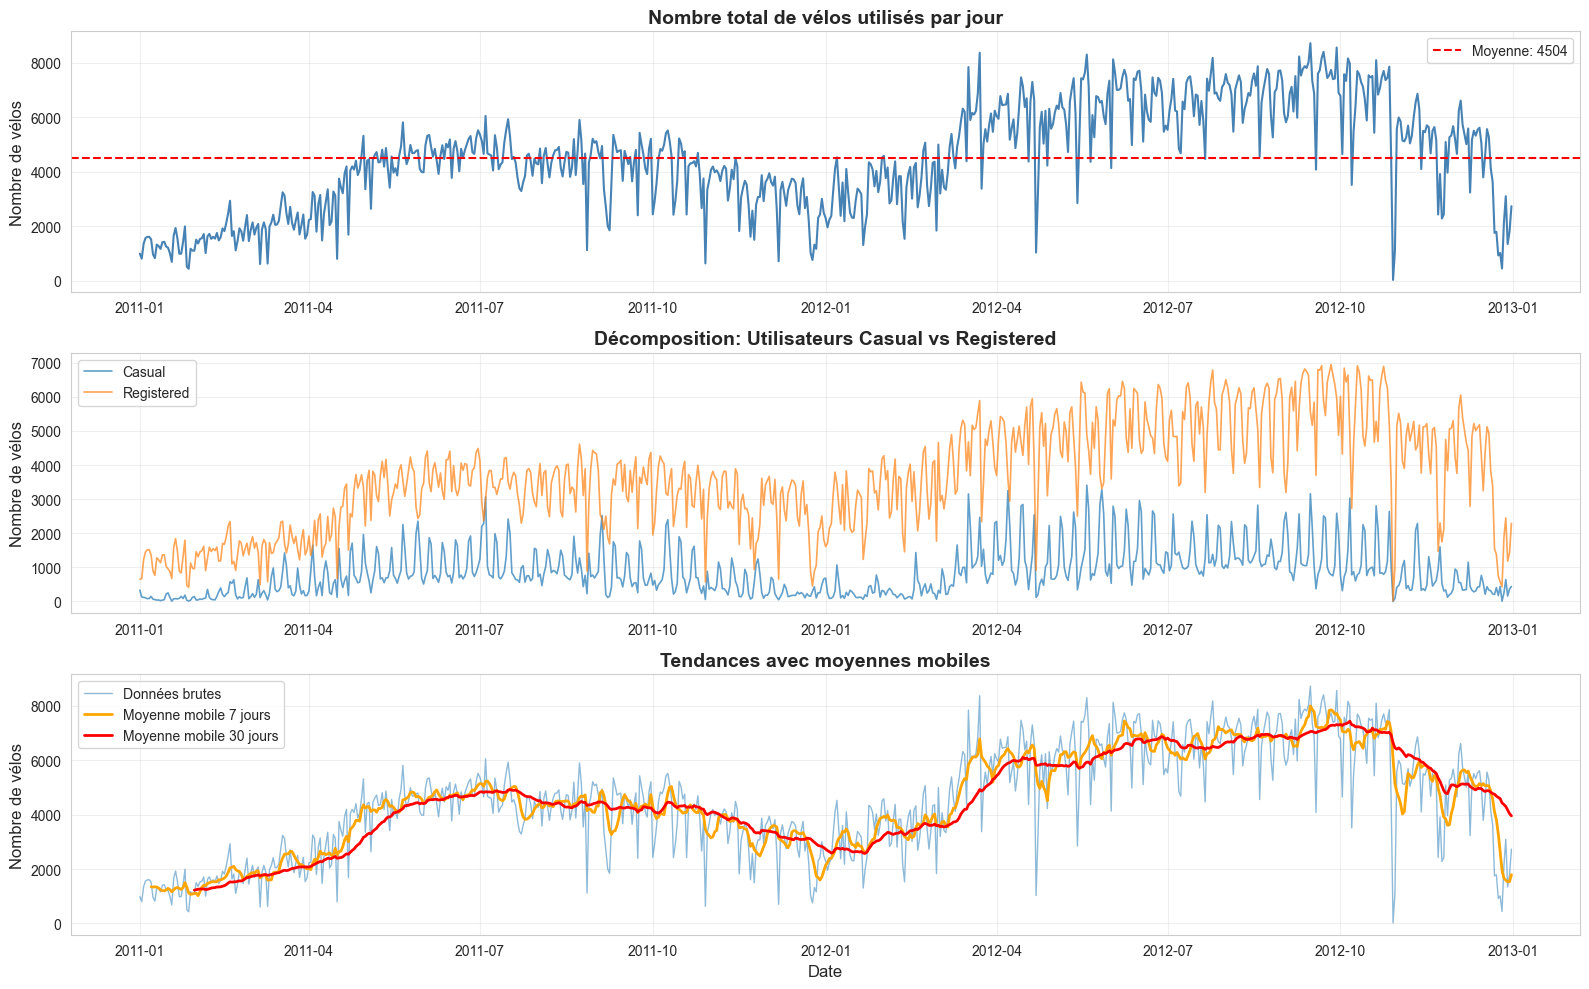

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 8)

data['dteday'] = pd.to_datetime(data['dteday'])
data = data.sort_values('dteday')
data.set_index('dteday', inplace=True)

print("="*60)
print("INFORMATIONS DE BASE")
print("="*60)
print(f"Période couverte: de {data.index.min()} à {data.index.max()}")
print(f"Nombre de jours: {len(data)}")
print(f"Valeurs manquantes dans cnt: {data['cnt'].isna().sum()}")
print(f"\nStatistiques descriptives de cnt:")
print(data['cnt'].describe())

fig, axes = plt.subplots(3, 1, figsize=(16, 10))

# Graphique principal
axes[0].plot(data.index, data['cnt'], linewidth=1.5, color='steelblue')
axes[0].set_title('Nombre total de vélos utilisés par jour', 
                  fontsize=14, fontweight='bold')
axes[0].set_ylabel('Nombre de vélos', fontsize=12)
axes[0].grid(True, alpha=0.3)
axes[0].axhline(y=data['cnt'].mean(), color='red', linestyle='--', 
                label=f'Moyenne: {data["cnt"].mean():.0f}')
axes[0].legend()

# Casual vs Registered
if 'casual' in data.columns and 'registered' in data.columns:
    axes[1].plot(data.index, data['casual'], label='Casual', 
                 linewidth=1.2, alpha=0.7)
    axes[1].plot(data.index, data['registered'], label='Registered', 
                 linewidth=1.2, alpha=0.7)
    axes[1].set_title('Décomposition: Utilisateurs Casual vs Registered', 
                      fontsize=14, fontweight='bold')
    axes[1].set_ylabel('Nombre de vélos', fontsize=12)
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)

# Moyennes mobiles
axes[2].plot(data.index, data['cnt'], linewidth=1, 
             alpha=0.5, label='Données brutes')
axes[2].plot(data.index, data['cnt'].rolling(window=7).mean(), 
             linewidth=2, label='Moyenne mobile 7 jours', color='orange')
axes[2].plot(data.index, data['cnt'].rolling(window=30).mean(), 
             linewidth=2, label='Moyenne mobile 30 jours', color='red')
axes[2].set_title('Tendances avec moyennes mobiles', 
                  fontsize=14, fontweight='bold')
axes[2].set_ylabel('Nombre de vélos', fontsize=12)
axes[2].set_xlabel('Date', fontsize=12)
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
from sklearn.metrics import mean_absolute_error, mean_squared_error

ADF statistic : -1.8774481444374314
p-value : 0.3427434403392186


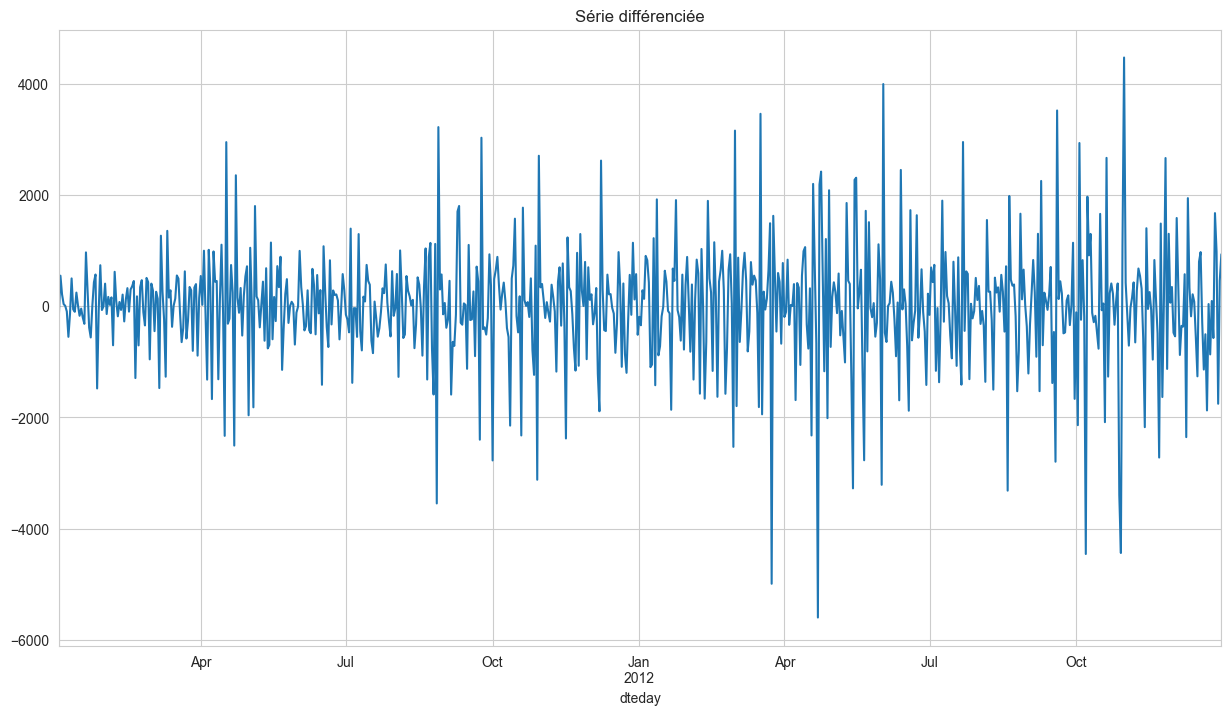

ADF après différenciation : 1.0467797548017554e-21


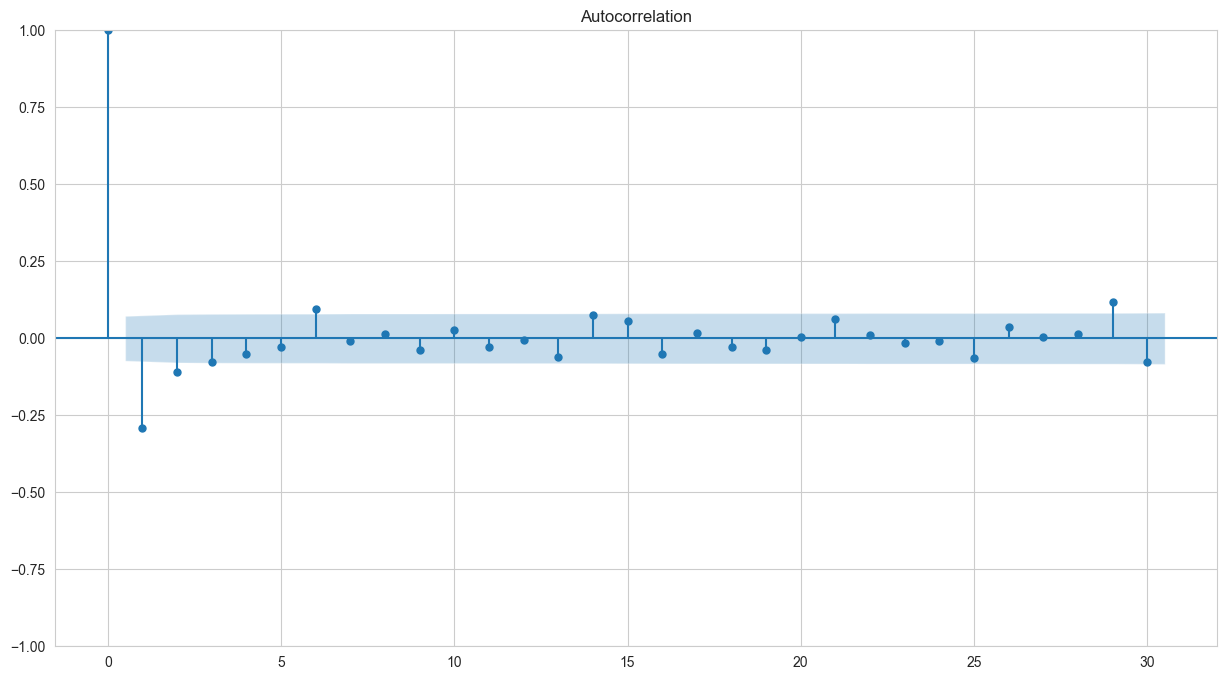

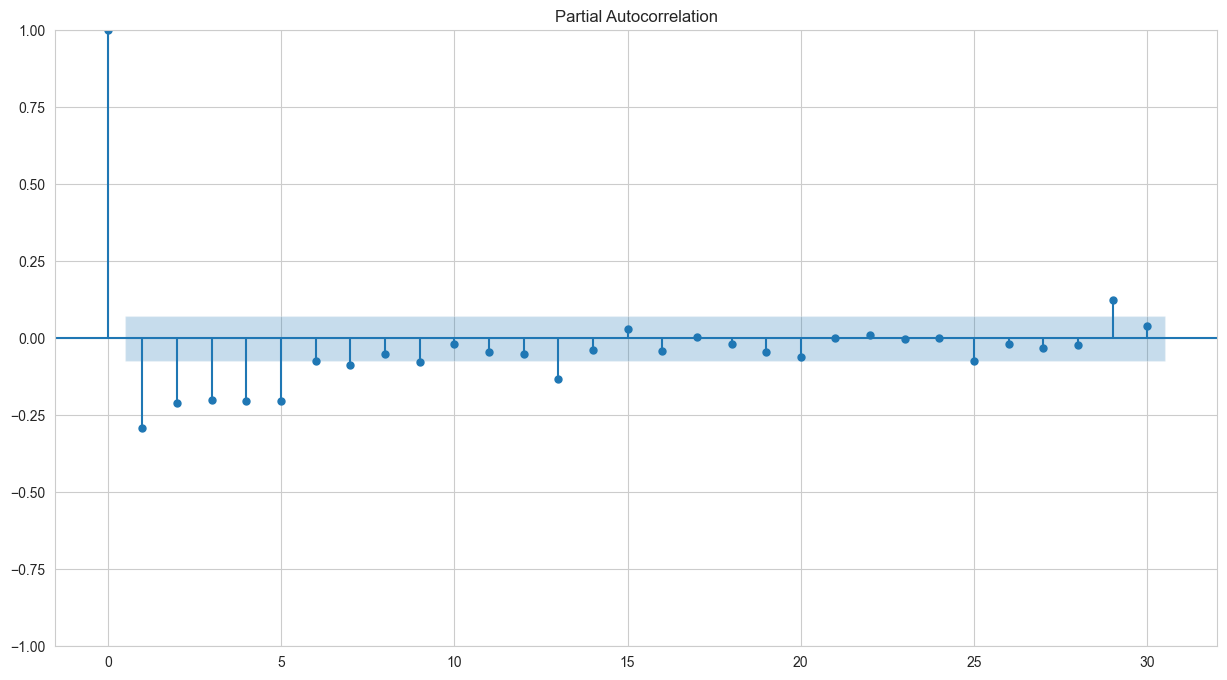

In [178]:
result = adfuller(data["cnt"])
print(f"ADF statistic : {result[0]}")
print(f"p-value : {result[1]}")

data["cnt_diff"] = data["cnt"].diff()
data["cnt_diff"].dropna().plot(title="Série différenciée")
plt.show()

result = adfuller(data["cnt_diff"].dropna())
print(f"ADF après différenciation : {result[1]}")

plot_acf(data["cnt_diff"].dropna(), lags=30)
plot_pacf(data["cnt_diff"].dropna(), lags=30)
plt.show()


Au vu de l'ACF et de la PACF, on peut intuiter un ARMA(5,1). L'analyse des autocorrélation est essentielle pour fit notre modèle ARMA mais aussi pour tester les hyperparamètres du RNN. Notament on peut penser que la longeur de la fenêtre optimal est de 5-7 jours. 

Il y a de la saisonnalité, et une tendance haussière. Il faut donc appliquer une différentiation de lag 1 et une autre sur 12 mois. 

In [43]:
data_reset = data.reset_index(drop = True)
print(data_reset)

     instant  season  yr  mnth  holiday  weekday  workingday  weathersit  \
0          1       1   0     1        0        6           0           2   
1          2       1   0     1        0        0           0           2   
2          3       1   0     1        0        1           1           1   
3          4       1   0     1        0        2           1           1   
4          5       1   0     1        0        3           1           1   
..       ...     ...  ..   ...      ...      ...         ...         ...   
726      727       1   1    12        0        4           1           2   
727      728       1   1    12        0        5           1           2   
728      729       1   1    12        0        6           0           2   
729      730       1   1    12        0        0           0           1   
730      731       1   1    12        0        1           1           2   

         temp     atemp       hum  windspeed  casual  registered   cnt  
0    0.344167 

In [44]:
X_final

,0,1,2,weathersit_2,weathersit_3,workingday_1,yr_1
0,-0.826662,1.250171,-0.387892,1.0,0.0,0.0,0.0
1,-0.721095,0.479113,0.749602,1.0,0.0,0.0,0.0
2,-1.634657,-1.339274,0.746632,0.0,0.0,1.0,0.0
3,-1.614780,-0.263182,-0.389829,0.0,0.0,1.0,0.0
4,-1.467414,-1.341494,-0.046307,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
726,-1.318665,0.175807,2.061426,1.0,0.0,1.0,1.0
727,-1.323224,-0.266238,-0.452131,1.0,0.0,1.0,1.0
728,-1.323224,0.878392,-0.853552,1.0,0.0,0.0,1.0
729,-1.309558,-1.015664,2.069444,0.0,0.0,0.0,1.0


Dans un premier temps on choisit de ne pas faire de différenciation, on veut voir si de lui-même le mdoèle arrive en minimisant la loss à trouver les poids lui permettant de prendre en compte la tendance de la série grâce à la variable catégorielle year et potentiellement season.

In [45]:
test_cat = ["weathersit", "workingday", 'yr', 'season', 'mnth', 'holiday', 'weekday']

X_cat = pd.get_dummies(X_factor.loc[:, test_cat], drop_first=True)
X_final = pd.concat([pd.DataFrame(X_scaled), X_cat.reset_index(drop=True)], axis=1)
X_final = X_final.astype(float)

data_mat = pd.concat([X_final, data_reset["cnt"]], axis=1)
print(data_mat.head())
data_mat = data_mat.values


          0         1         2  weathersit_2  weathersit_3  workingday_1  \
0 -0.826662  1.250171 -0.387892           1.0           0.0           0.0   
1 -0.721095  0.479113  0.749602           1.0           0.0           0.0   
2 -1.634657 -1.339274  0.746632           0.0           0.0           1.0   
3 -1.614780 -0.263182 -0.389829           0.0           0.0           1.0   
4 -1.467414 -1.341494 -0.046307           0.0           0.0           1.0   

   yr_1  season_2  season_3  season_4  ...  mnth_11  mnth_12  holiday_1  \
0   0.0       0.0       0.0       0.0  ...      0.0      0.0        0.0   
1   0.0       0.0       0.0       0.0  ...      0.0      0.0        0.0   
2   0.0       0.0       0.0       0.0  ...      0.0      0.0        0.0   
3   0.0       0.0       0.0       0.0  ...      0.0      0.0        0.0   
4   0.0       0.0       0.0       0.0  ...      0.0      0.0        0.0   

   weekday_1  weekday_2  weekday_3  weekday_4  weekday_5  weekday_6   cnt  
0        0

On a choisit de faire des séquences de longueur 4 semaines, soit environ 1/3 d'une saison (hiver, été...) et de longueur 1 semaine. 

Le découpage en fenêtres glissantes crée des séquences qui se chevauchent, préservant ainsi la structure temporelle locale au sein de chaque fenêtre. Bien que l’analyse d’autocorrélation ait mis en évidence une dépendance à lag 6, le shuffle reste envisageable car il ne perturbe pas l’ordre interne des séquences, mais mélange seulement l’ordre de présentation des fenêtres au modèle.

In [140]:
time_steps = data.shape[0]
samples = []
target = []
length = 28  # sequence length
test_size = 100

for i in range(time_steps - length):
    sample = data_mat[i : i + length, :28]

    outcome = data_mat[i + length, 28]
    samples.append(sample)
    target.append(outcome)

# Convert to arrays
samples = np.array(samples)
target = np.array(target)

# Train/test split
x_train = samples[:-test_size]
x_test = samples[-test_size:]
y_train = target[:-test_size]
y_test = target[-test_size:]

print("x_train:", x_train.shape)
print("x_test :", x_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)


x_train: (603, 28, 28)
x_test : (100, 28, 28)
y_train: (603,)
y_test : (100,)


In [141]:
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=50, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=50, shuffle=False)

La loss est la MSE, qui fit avec le fait qu'on fait des prédictions et pas de la classification. 

In [142]:
class RNNModel(pl.LightningModule):
    def __init__(self, input_size, hidden_size, dense1, dense2, dense3):
        super(RNNModel, self).__init__()
        self.rnn = nn.RNN(
            input_size=input_size,
            hidden_size=hidden_size,
            batch_first=True,
            nonlinearity="relu",
        )
        
        self.dropout = nn.Dropout(0.1)
        self.fc1 = nn.Linear(hidden_size, dense1)
        self.fc2 = nn.Linear(dense1, dense2)
        self.fc3 = nn.Linear(dense2, dense3)
        self.out = nn.Linear(dense3, 1)
        self.relu = nn.ReLU()
        self.criterion = nn.MSELoss()
        self.save_hyperparameters()

    def forward(self, x):
        out, _ = self.rnn(x)
        out = out[:, -1, :]  # take the last hidden state
        out = self.dropout(self.relu(self.fc1(out)))
        out = self.dropout(self.relu(self.fc2(out)))
        out = self.dropout(self.relu(self.fc3(out)))
        out = self.out(out)
        return out

    def training_step(self, batch, batch_idx):
        input_seq, prediction = batch
        outputs = self(input_seq)
        loss = self.criterion(outputs, prediction)
        self.log("train_loss", loss, prog_bar=True, on_step=False, on_epoch=True)
        return loss

    def validation_step(self, batch, batch_idx):
        input_seq, prediction = batch
        outputs = self(input_seq)
        loss = self.criterion(outputs, prediction)
        self.log("val_loss", loss, prog_bar=True, on_step=False, on_epoch=True)
        return loss

    def configure_optimizers(self):
        optimizer = optim.Adam(self.parameters(), lr=0.001)
        return [optimizer]


input_size = 28
hidden_size = 12
model = RNNModel(input_size, hidden_size,12, 20, 8)
print(model)

RNNModel(
  (rnn): RNN(28, 12, batch_first=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (fc1): Linear(in_features=12, out_features=12, bias=True)
  (fc2): Linear(in_features=12, out_features=20, bias=True)
  (fc3): Linear(in_features=20, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=1, bias=True)
  (relu): ReLU()
  (criterion): MSELoss()
)


In [113]:
x_train_tensor.shape

torch.Size([603, 28, 28])

In [143]:
from lightning.pytorch.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(
    monitor="val_loss", min_delta=0.00, patience=10, verbose=True, mode="min"
)
checkpoint_callback = ModelCheckpoint(
    save_top_k=1, monitor="val_loss", mode="min", verbose=True
)
trainer = pl.Trainer(
    max_epochs=40,
    logger=SimpleLogger(),
    enable_checkpointing=True,
    check_val_every_n_epoch=1,
    callbacks=[
        # early_stopping, # Early stopping
        checkpoint_callback,  # Save model with best val_loss
    ],
)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores


In [144]:

trainer.fit(model, train_dataloaders=train_loader, val_dataloaders=test_loader)

c:\Users\enzom\OneDrive\Bureau\MINES\SDD\Mines_data_science\.venv\Lib\site-packages\lightning\pytorch\callbacks\model_checkpoint.py:881: Checkpoint directory c:\Users\enzom\OneDrive\Bureau\MINES\SDD\Mines_data_science\Neural_network\SimpleLogger\MajeureData\checkpoints exists and is not empty.

  | Name      | Type    | Params | Mode  | FLOPs
------------------------------------------------------
0 | rnn       | RNN     | 504    | train | 0    
1 | dropout   | Dropout | 0      | train | 0    
2 | fc1       | Linear  | 156    | train | 0    
3 | fc2       | Linear  | 260    | train | 0    
4 | fc3       | Linear  | 168    | train | 0    
5 | out       | Linear  | 9      | train | 0    
6 | relu      | ReLU    | 0      | train | 0    
7 | criterion | MSELoss | 0      | train | 0    
------------------------------------------------------
1.1 K     Trainable params
0         Non-trainable params
1.1 K     Total params
0.004     Total estimated model params size (MB)
8         Modules in tr

c:\Users\enzom\OneDrive\Bureau\MINES\SDD\Mines_data_science\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:434: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.
c:\Users\enzom\OneDrive\Bureau\MINES\SDD\Mines_data_science\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:434: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.
c:\Users\enzom\OneDrive\Bureau\MINES\SDD\Mines_data_science\.venv\Lib\site-packages\lightning\pytorch\loops\fit_loop.py:317: The number of training batches (13) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training 

Epoch 0: 100%|██████████| 13/13 [00:00<00:00, 64.86it/s, v_num=Data, val_loss=3.26e+7, train_loss=2.37e+7]

Epoch 0, global step 13: 'val_loss' reached 32583324.00000 (best 32583324.00000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=0-step=13.ckpt' as top 1


Epoch 1: 100%|██████████| 13/13 [00:00<00:00, 77.29it/s, v_num=Data, val_loss=3.26e+7, train_loss=2.37e+7]

Epoch 1, global step 26: 'val_loss' reached 32582790.00000 (best 32582790.00000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=1-step=26.ckpt' as top 1


Epoch 2: 100%|██████████| 13/13 [00:00<00:00, 62.61it/s, v_num=Data, val_loss=3.26e+7, train_loss=2.37e+7]

Epoch 2, global step 39: 'val_loss' reached 32581986.00000 (best 32581986.00000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=2-step=39.ckpt' as top 1


Epoch 3: 100%|██████████| 13/13 [00:00<00:00, 80.31it/s, v_num=Data, val_loss=3.26e+7, train_loss=2.37e+7]

Epoch 3, global step 52: 'val_loss' reached 32579774.00000 (best 32579774.00000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=3-step=52.ckpt' as top 1


Epoch 4: 100%|██████████| 13/13 [00:00<00:00, 60.44it/s, v_num=Data, val_loss=3.26e+7, train_loss=2.37e+7]

Epoch 4, global step 65: 'val_loss' reached 32572692.00000 (best 32572692.00000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=4-step=65.ckpt' as top 1


Epoch 5: 100%|██████████| 13/13 [00:00<00:00, 71.96it/s, v_num=Data, val_loss=3.25e+7, train_loss=2.36e+7]

Epoch 5, global step 78: 'val_loss' reached 32528512.00000 (best 32528512.00000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=5-step=78.ckpt' as top 1


Epoch 6: 100%|██████████| 13/13 [00:00<00:00, 84.50it/s, v_num=Data, val_loss=3.13e+7, train_loss=2.34e+7] 

Epoch 6, global step 91: 'val_loss' reached 31282576.00000 (best 31282576.00000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=6-step=91.ckpt' as top 1


Epoch 7: 100%|██████████| 13/13 [00:00<00:00, 90.68it/s, v_num=Data, val_loss=6.78e+6, train_loss=1.52e+7] 

Epoch 7, global step 104: 'val_loss' reached 6782223.50000 (best 6782223.50000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=7-step=104.ckpt' as top 1


Epoch 8: 100%|██████████| 13/13 [00:00<00:00, 102.88it/s, v_num=Data, val_loss=5.39e+6, train_loss=5.36e+6]

Epoch 8, global step 117: 'val_loss' reached 5392134.50000 (best 5392134.50000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=8-step=117.ckpt' as top 1


Epoch 9: 100%|██████████| 13/13 [00:00<00:00, 100.94it/s, v_num=Data, val_loss=4.73e+6, train_loss=3.77e+6]

Epoch 9, global step 130: 'val_loss' reached 4733084.00000 (best 4733084.00000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=9-step=130.ckpt' as top 1


Epoch 10: 100%|██████████| 13/13 [00:00<00:00, 103.25it/s, v_num=Data, val_loss=4.72e+6, train_loss=3.3e+6] 

Epoch 10, global step 143: 'val_loss' reached 4723039.50000 (best 4723039.50000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=10-step=143.ckpt' as top 1


Epoch 11: 100%|██████████| 13/13 [00:00<00:00, 93.70it/s, v_num=Data, val_loss=5.4e+6, train_loss=3.12e+6] 

Epoch 11, global step 156: 'val_loss' was not in top 1


Epoch 12: 100%|██████████| 13/13 [00:00<00:00, 110.92it/s, v_num=Data, val_loss=4.03e+6, train_loss=2.92e+6]

Epoch 12, global step 169: 'val_loss' reached 4031800.25000 (best 4031800.25000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=12-step=169.ckpt' as top 1


Epoch 13: 100%|██████████| 13/13 [00:00<00:00, 113.81it/s, v_num=Data, val_loss=4.59e+6, train_loss=3.04e+6]

Epoch 13, global step 182: 'val_loss' was not in top 1


Epoch 14: 100%|██████████| 13/13 [00:00<00:00, 104.12it/s, v_num=Data, val_loss=3.93e+6, train_loss=2.78e+6]

Epoch 14, global step 195: 'val_loss' reached 3928079.00000 (best 3928079.00000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=14-step=195.ckpt' as top 1


Epoch 15: 100%|██████████| 13/13 [00:00<00:00, 116.30it/s, v_num=Data, val_loss=4.39e+6, train_loss=2.63e+6]

Epoch 15, global step 208: 'val_loss' was not in top 1


Epoch 16: 100%|██████████| 13/13 [00:00<00:00, 114.46it/s, v_num=Data, val_loss=4e+6, train_loss=2.4e+6]    

Epoch 16, global step 221: 'val_loss' was not in top 1


Epoch 17: 100%|██████████| 13/13 [00:00<00:00, 101.19it/s, v_num=Data, val_loss=3.86e+6, train_loss=2.8e+6]

Epoch 17, global step 234: 'val_loss' reached 3856839.75000 (best 3856839.75000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=17-step=234.ckpt' as top 1


Epoch 18: 100%|██████████| 13/13 [00:00<00:00, 117.59it/s, v_num=Data, val_loss=3.34e+6, train_loss=2.43e+6]

Epoch 18, global step 247: 'val_loss' reached 3338802.50000 (best 3338802.50000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=18-step=247.ckpt' as top 1


Epoch 19: 100%|██████████| 13/13 [00:00<00:00, 103.58it/s, v_num=Data, val_loss=3.64e+6, train_loss=2.69e+6]

Epoch 19, global step 260: 'val_loss' was not in top 1


Epoch 20: 100%|██████████| 13/13 [00:00<00:00, 110.60it/s, v_num=Data, val_loss=3.64e+6, train_loss=2.44e+6]

Epoch 20, global step 273: 'val_loss' was not in top 1


Epoch 21: 100%|██████████| 13/13 [00:00<00:00, 122.69it/s, v_num=Data, val_loss=3.89e+6, train_loss=2.44e+6]

Epoch 21, global step 286: 'val_loss' was not in top 1


Epoch 22: 100%|██████████| 13/13 [00:00<00:00, 114.65it/s, v_num=Data, val_loss=4.27e+6, train_loss=2.02e+6]

Epoch 22, global step 299: 'val_loss' was not in top 1


Epoch 23: 100%|██████████| 13/13 [00:00<00:00, 106.08it/s, v_num=Data, val_loss=3.48e+6, train_loss=2.5e+6] 

Epoch 23, global step 312: 'val_loss' was not in top 1


Epoch 24: 100%|██████████| 13/13 [00:00<00:00, 103.36it/s, v_num=Data, val_loss=3.37e+6, train_loss=2.18e+6]

Epoch 24, global step 325: 'val_loss' was not in top 1


Epoch 25: 100%|██████████| 13/13 [00:00<00:00, 103.38it/s, v_num=Data, val_loss=3.26e+6, train_loss=1.94e+6]

Epoch 25, global step 338: 'val_loss' reached 3259275.25000 (best 3259275.25000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=25-step=338.ckpt' as top 1


Epoch 26: 100%|██████████| 13/13 [00:00<00:00, 108.70it/s, v_num=Data, val_loss=3.04e+6, train_loss=2.3e+6] 

Epoch 26, global step 351: 'val_loss' reached 3037692.75000 (best 3037692.75000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=26-step=351.ckpt' as top 1


Epoch 27: 100%|██████████| 13/13 [00:00<00:00, 99.56it/s, v_num=Data, val_loss=3.56e+6, train_loss=1.97e+6]

Epoch 27, global step 364: 'val_loss' was not in top 1


Epoch 28: 100%|██████████| 13/13 [00:00<00:00, 94.58it/s, v_num=Data, val_loss=2.85e+6, train_loss=2.32e+6] 

Epoch 28, global step 377: 'val_loss' reached 2847976.75000 (best 2847976.75000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=28-step=377-v1.ckpt' as top 1


Epoch 29: 100%|██████████| 13/13 [00:00<00:00, 115.87it/s, v_num=Data, val_loss=2.84e+6, train_loss=2.18e+6]

Epoch 29, global step 390: 'val_loss' reached 2838860.75000 (best 2838860.75000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=29-step=390.ckpt' as top 1


Epoch 30: 100%|██████████| 13/13 [00:00<00:00, 109.18it/s, v_num=Data, val_loss=3.19e+6, train_loss=2.15e+6]

Epoch 30, global step 403: 'val_loss' was not in top 1


Epoch 31: 100%|██████████| 13/13 [00:00<00:00, 101.77it/s, v_num=Data, val_loss=3.18e+6, train_loss=1.89e+6]

Epoch 31, global step 416: 'val_loss' was not in top 1


Epoch 32: 100%|██████████| 13/13 [00:00<00:00, 105.02it/s, v_num=Data, val_loss=3e+6, train_loss=2.01e+6]   

Epoch 32, global step 429: 'val_loss' was not in top 1


Epoch 33: 100%|██████████| 13/13 [00:00<00:00, 104.90it/s, v_num=Data, val_loss=2.94e+6, train_loss=1.98e+6]

Epoch 33, global step 442: 'val_loss' was not in top 1


Epoch 34: 100%|██████████| 13/13 [00:00<00:00, 105.71it/s, v_num=Data, val_loss=3.21e+6, train_loss=2.05e+6]

Epoch 34, global step 455: 'val_loss' was not in top 1


Epoch 35: 100%|██████████| 13/13 [00:00<00:00, 104.87it/s, v_num=Data, val_loss=3.69e+6, train_loss=2.08e+6]

Epoch 35, global step 468: 'val_loss' was not in top 1


Epoch 36: 100%|██████████| 13/13 [00:00<00:00, 104.96it/s, v_num=Data, val_loss=3.31e+6, train_loss=1.83e+6]

Epoch 36, global step 481: 'val_loss' was not in top 1


Epoch 37: 100%|██████████| 13/13 [00:00<00:00, 86.15it/s, v_num=Data, val_loss=3.27e+6, train_loss=2.05e+6] 

Epoch 37, global step 494: 'val_loss' was not in top 1


Epoch 38: 100%|██████████| 13/13 [00:00<00:00, 111.33it/s, v_num=Data, val_loss=3.02e+6, train_loss=1.67e+6]

Epoch 38, global step 507: 'val_loss' was not in top 1


Epoch 39: 100%|██████████| 13/13 [00:00<00:00, 94.15it/s, v_num=Data, val_loss=2.98e+6, train_loss=1.91e+6] 

Epoch 39, global step 520: 'val_loss' was not in top 1
`Trainer.fit` stopped: `max_epochs=40` reached.


Epoch 39: 100%|██████████| 13/13 [00:00<00:00, 92.63it/s, v_num=Data, val_loss=2.98e+6, train_loss=1.91e+6]


In [145]:
best_model = RNNModel.load_from_checkpoint(
    checkpoint_path=checkpoint_callback.best_model_path
)
best_model.eval()


RNNModel(
  (rnn): RNN(28, 12, batch_first=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (fc1): Linear(in_features=12, out_features=12, bias=True)
  (fc2): Linear(in_features=12, out_features=20, bias=True)
  (fc3): Linear(in_features=20, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=1, bias=True)
  (relu): ReLU()
  (criterion): MSELoss()
)

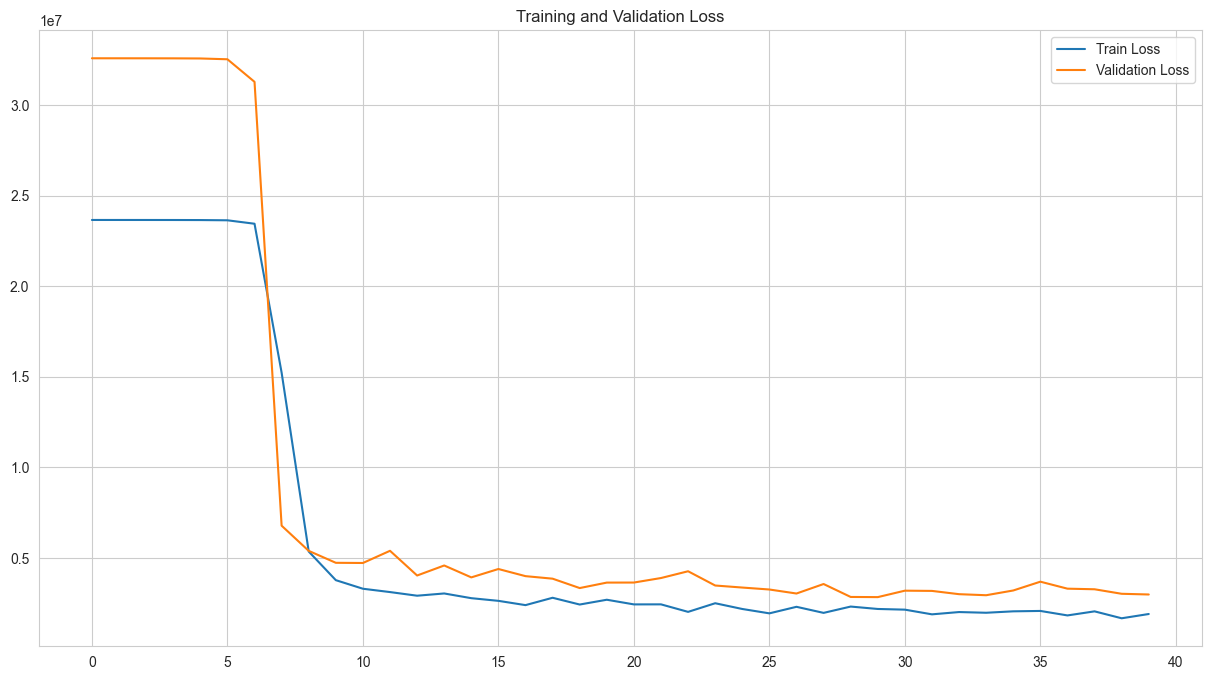

In [146]:
plt.plot(trainer.logger.metrics["train_loss"], label="Train Loss")
plt.plot(trainer.logger.metrics["val_loss"], label="Validation Loss")
plt.legend()
plt.title("Training and Validation Loss")
# plt.yscale("log")
plt.show()

RMSE Train: 921.65
RMSE Test: 1684.89


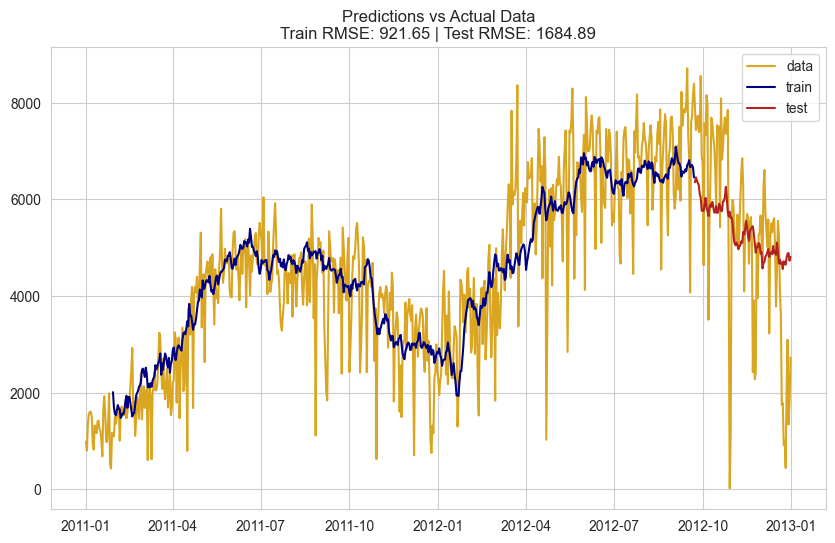

In [147]:
from sklearn.metrics import mean_squared_error

model.eval()
with torch.no_grad():
    train_preds = best_model(x_train_tensor).cpu().numpy()
    test_preds = best_model(x_test_tensor).cpu().numpy()

# Calcul de la RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))

print(f"RMSE Train: {train_rmse:.2f}")
print(f"RMSE Test: {test_rmse:.2f}")

plt.figure(figsize=(10, 6))
plt.plot(data.index, data["cnt"], c="goldenrod", label="data")
plt.plot(data.iloc[length : -len(y_test)].index, train_preds, c="navy", label="train")
plt.plot(data.iloc[-len(y_test) :].index, test_preds, c="firebrick", label="test")
plt.legend()
plt.title(f"Predictions vs Actual Data\nTrain RMSE: {train_rmse:.2f} | Test RMSE: {test_rmse:.2f}")
plt.show()

On remarque que le modèle entraîné a pris en compte la tendance. 


Avec 40 epochs, pour un batch size de 1 c'est moins bon que pour un batch size de 50. 
Sans shuffle les données d'entrée ça donne souvent de moins bons résultats. 

On repart de l'analyse d'autocorrélation pour confirmer ou non le fait qu'une fenêtre de 7jours est optimal dans ce cas. 

In [ ]:
time_steps = data.shape[0]
samples = []
target = []
length = 7  # sequence length
test_size = 100

for i in range(time_steps - length):
    sample = data_mat[i : i + length, :28]

    outcome = data_mat[i + length, 28]
    samples.append(sample)
    target.append(outcome)

# Convert to arrays
samples = np.array(samples)
target = np.array(target)

# Train/test split
x_train = samples[:-test_size]
x_test = samples[-test_size:]
y_train = target[:-test_size]
y_test = target[-test_size:]

print("x_train:", x_train.shape)
print("x_test :", x_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)

x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=50, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=50, shuffle=False)

x_train: (624, 7, 28)
x_test : (100, 7, 28)
y_train: (624,)
y_test : (100,)


In [135]:
input_size = 28
hidden_size = 12
model = RNNModel(input_size, hidden_size,12, 20, 8)
print(model)

from lightning.pytorch.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(
    monitor="val_loss", min_delta=0.00, patience=10, verbose=True, mode="min"
)
checkpoint_callback = ModelCheckpoint(
    save_top_k=1, monitor="val_loss", mode="min", verbose=True
)
trainer = pl.Trainer(
    max_epochs=40,
    logger=SimpleLogger(),
    enable_checkpointing=True,
    check_val_every_n_epoch=1,
    callbacks=[
        # early_stopping, # Early stopping
        checkpoint_callback,  # Save model with best val_loss
    ],
)

trainer.fit(model, train_dataloaders=train_loader, val_dataloaders=test_loader)
best_model = RNNModel.load_from_checkpoint(
    checkpoint_path=checkpoint_callback.best_model_path
)
best_model.eval()


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
c:\Users\enzom\OneDrive\Bureau\MINES\SDD\Mines_data_science\.venv\Lib\site-packages\lightning\pytorch\callbacks\model_checkpoint.py:881: Checkpoint directory c:\Users\enzom\OneDrive\Bureau\MINES\SDD\Mines_data_science\Neural_network\SimpleLogger\MajeureData\checkpoints exists and is not empty.

  | Name      | Type    | Params | Mode  | FLOPs
------------------------------------------------------
0 | rnn       | RNN     | 504    | train | 0    
1 | dropout   | Dropout | 0      | train | 0    
2 | fc1       | Linear  | 156    | train | 0    
3 | fc2       | Linear  | 260    | train | 0    
4 | fc3       | Linear  | 168    | train | 0    
5 | out       | Linear  | 9      | train | 0    
6 | relu      | ReLU    | 0      | train | 0    
7 | criterion | MSELoss | 0      | train | 0    
------------------------------------------------------
1.1 K     Trainable params
0         Non-trainable params
1.1 K     Total para

RNNModel(
  (rnn): RNN(28, 12, batch_first=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (fc1): Linear(in_features=12, out_features=12, bias=True)
  (fc2): Linear(in_features=12, out_features=20, bias=True)
  (fc3): Linear(in_features=20, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=1, bias=True)
  (relu): ReLU()
  (criterion): MSELoss()
)
                                                                            

c:\Users\enzom\OneDrive\Bureau\MINES\SDD\Mines_data_science\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:434: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.
c:\Users\enzom\OneDrive\Bureau\MINES\SDD\Mines_data_science\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:434: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.
c:\Users\enzom\OneDrive\Bureau\MINES\SDD\Mines_data_science\.venv\Lib\site-packages\lightning\pytorch\loops\fit_loop.py:317: The number of training batches (13) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training 

Epoch 0: 100%|██████████| 13/13 [00:00<00:00, 55.89it/s, v_num=Data, val_loss=3.26e+7, train_loss=2.29e+7]

Epoch 0, global step 13: 'val_loss' reached 32587404.00000 (best 32587404.00000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=0-step=13.ckpt' as top 1


Epoch 1: 100%|██████████| 13/13 [00:00<00:00, 63.42it/s, v_num=Data, val_loss=3.26e+7, train_loss=2.29e+7]

Epoch 1, global step 26: 'val_loss' reached 32586846.00000 (best 32586846.00000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=1-step=26.ckpt' as top 1


Epoch 2: 100%|██████████| 13/13 [00:00<00:00, 59.07it/s, v_num=Data, val_loss=3.26e+7, train_loss=2.29e+7]

Epoch 2, global step 39: 'val_loss' reached 32586276.00000 (best 32586276.00000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=2-step=39.ckpt' as top 1


Epoch 3: 100%|██████████| 13/13 [00:00<00:00, 61.98it/s, v_num=Data, val_loss=3.26e+7, train_loss=2.29e+7]

Epoch 3, global step 52: 'val_loss' reached 32585454.00000 (best 32585454.00000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=3-step=52.ckpt' as top 1


Epoch 4: 100%|██████████| 13/13 [00:00<00:00, 55.62it/s, v_num=Data, val_loss=3.26e+7, train_loss=2.29e+7]

Epoch 4, global step 65: 'val_loss' reached 32583900.00000 (best 32583900.00000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=4-step=65.ckpt' as top 1


Epoch 5: 100%|██████████| 13/13 [00:00<00:00, 65.62it/s, v_num=Data, val_loss=3.26e+7, train_loss=2.29e+7]

Epoch 5, global step 78: 'val_loss' reached 32580772.00000 (best 32580772.00000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=5-step=78.ckpt' as top 1


Epoch 6: 100%|██████████| 13/13 [00:00<00:00, 55.47it/s, v_num=Data, val_loss=3.26e+7, train_loss=2.29e+7]

Epoch 6, global step 91: 'val_loss' reached 32573096.00000 (best 32573096.00000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=6-step=91.ckpt' as top 1


Epoch 7: 100%|██████████| 13/13 [00:00<00:00, 70.03it/s, v_num=Data, val_loss=3.25e+7, train_loss=2.29e+7]

Epoch 7, global step 104: 'val_loss' reached 32547796.00000 (best 32547796.00000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=7-step=104.ckpt' as top 1


Epoch 8: 100%|██████████| 13/13 [00:00<00:00, 73.57it/s, v_num=Data, val_loss=3.24e+7, train_loss=2.29e+7]

Epoch 8, global step 117: 'val_loss' reached 32406244.00000 (best 32406244.00000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=8-step=117.ckpt' as top 1


Epoch 9: 100%|██████████| 13/13 [00:00<00:00, 73.34it/s, v_num=Data, val_loss=3.15e+7, train_loss=2.26e+7]

Epoch 9, global step 130: 'val_loss' reached 31524264.00000 (best 31524264.00000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=9-step=130.ckpt' as top 1


Epoch 10: 100%|██████████| 13/13 [00:00<00:00, 78.08it/s, v_num=Data, val_loss=2.64e+7, train_loss=2.09e+7] 

Epoch 10, global step 143: 'val_loss' reached 26357918.00000 (best 26357918.00000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=10-step=143.ckpt' as top 1


Epoch 11: 100%|██████████| 13/13 [00:00<00:00, 74.97it/s, v_num=Data, val_loss=7.41e+6, train_loss=1.29e+7] 

Epoch 11, global step 156: 'val_loss' reached 7406522.00000 (best 7406522.00000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=11-step=156.ckpt' as top 1


Epoch 12: 100%|██████████| 13/13 [00:00<00:00, 76.91it/s, v_num=Data, val_loss=3.8e+6, train_loss=4.22e+6] 

Epoch 12, global step 169: 'val_loss' reached 3802851.75000 (best 3802851.75000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=12-step=169.ckpt' as top 1


Epoch 13: 100%|██████████| 13/13 [00:00<00:00, 69.30it/s, v_num=Data, val_loss=4.81e+6, train_loss=3.56e+6]

Epoch 13, global step 182: 'val_loss' was not in top 1


Epoch 14: 100%|██████████| 13/13 [00:00<00:00, 68.44it/s, v_num=Data, val_loss=4.04e+6, train_loss=3.4e+6] 

Epoch 14, global step 195: 'val_loss' was not in top 1


Epoch 15: 100%|██████████| 13/13 [00:00<00:00, 89.80it/s, v_num=Data, val_loss=4.49e+6, train_loss=3.04e+6]

Epoch 15, global step 208: 'val_loss' was not in top 1


Epoch 16: 100%|██████████| 13/13 [00:00<00:00, 78.30it/s, v_num=Data, val_loss=4.21e+6, train_loss=2.76e+6] 

Epoch 16, global step 221: 'val_loss' was not in top 1


Epoch 17: 100%|██████████| 13/13 [00:00<00:00, 84.55it/s, v_num=Data, val_loss=4.12e+6, train_loss=2.93e+6] 

Epoch 17, global step 234: 'val_loss' was not in top 1


Epoch 18: 100%|██████████| 13/13 [00:00<00:00, 89.46it/s, v_num=Data, val_loss=4.55e+6, train_loss=3.04e+6] 

Epoch 18, global step 247: 'val_loss' was not in top 1


Epoch 19: 100%|██████████| 13/13 [00:00<00:00, 74.49it/s, v_num=Data, val_loss=3.92e+6, train_loss=2.98e+6] 

Epoch 19, global step 260: 'val_loss' was not in top 1


Epoch 20: 100%|██████████| 13/13 [00:00<00:00, 76.18it/s, v_num=Data, val_loss=4.15e+6, train_loss=2.66e+6]

Epoch 20, global step 273: 'val_loss' was not in top 1


Epoch 21: 100%|██████████| 13/13 [00:00<00:00, 90.64it/s, v_num=Data, val_loss=3.96e+6, train_loss=2.53e+6] 

Epoch 21, global step 286: 'val_loss' was not in top 1


Epoch 22: 100%|██████████| 13/13 [00:00<00:00, 87.37it/s, v_num=Data, val_loss=4.11e+6, train_loss=2.91e+6] 

Epoch 22, global step 299: 'val_loss' was not in top 1


Epoch 23: 100%|██████████| 13/13 [00:00<00:00, 70.55it/s, v_num=Data, val_loss=4.04e+6, train_loss=2.54e+6]

Epoch 23, global step 312: 'val_loss' was not in top 1


Epoch 24: 100%|██████████| 13/13 [00:00<00:00, 70.02it/s, v_num=Data, val_loss=3.52e+6, train_loss=2.44e+6]

Epoch 24, global step 325: 'val_loss' reached 3515228.75000 (best 3515228.75000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=24-step=325.ckpt' as top 1


Epoch 25: 100%|██████████| 13/13 [00:00<00:00, 76.66it/s, v_num=Data, val_loss=3.71e+6, train_loss=2.6e+6]  

Epoch 25, global step 338: 'val_loss' was not in top 1


Epoch 26: 100%|██████████| 13/13 [00:00<00:00, 82.17it/s, v_num=Data, val_loss=3.72e+6, train_loss=2.48e+6]

Epoch 26, global step 351: 'val_loss' was not in top 1


Epoch 27: 100%|██████████| 13/13 [00:00<00:00, 85.98it/s, v_num=Data, val_loss=3.59e+6, train_loss=2.58e+6] 

Epoch 27, global step 364: 'val_loss' was not in top 1


Epoch 28: 100%|██████████| 13/13 [00:00<00:00, 83.31it/s, v_num=Data, val_loss=3.61e+6, train_loss=2.24e+6] 

Epoch 28, global step 377: 'val_loss' was not in top 1


Epoch 29: 100%|██████████| 13/13 [00:00<00:00, 85.22it/s, v_num=Data, val_loss=3.42e+6, train_loss=2.42e+6] 

Epoch 29, global step 390: 'val_loss' reached 3422427.75000 (best 3422427.75000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=29-step=390.ckpt' as top 1


Epoch 30: 100%|██████████| 13/13 [00:00<00:00, 81.11it/s, v_num=Data, val_loss=3.43e+6, train_loss=2.35e+6] 

Epoch 30, global step 403: 'val_loss' was not in top 1


Epoch 31: 100%|██████████| 13/13 [00:00<00:00, 85.05it/s, v_num=Data, val_loss=3.45e+6, train_loss=2.59e+6] 

Epoch 31, global step 416: 'val_loss' was not in top 1


Epoch 32: 100%|██████████| 13/13 [00:00<00:00, 90.51it/s, v_num=Data, val_loss=3.41e+6, train_loss=2.28e+6] 

Epoch 32, global step 429: 'val_loss' reached 3405630.00000 (best 3405630.00000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=32-step=429.ckpt' as top 1


Epoch 33: 100%|██████████| 13/13 [00:00<00:00, 81.33it/s, v_num=Data, val_loss=3.01e+6, train_loss=2.42e+6] 

Epoch 33, global step 442: 'val_loss' reached 3008835.25000 (best 3008835.25000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=33-step=442.ckpt' as top 1


Epoch 34: 100%|██████████| 13/13 [00:00<00:00, 80.75it/s, v_num=Data, val_loss=3.45e+6, train_loss=2.48e+6] 

Epoch 34, global step 455: 'val_loss' was not in top 1


Epoch 35: 100%|██████████| 13/13 [00:00<00:00, 85.97it/s, v_num=Data, val_loss=3.55e+6, train_loss=2.68e+6] 

Epoch 35, global step 468: 'val_loss' was not in top 1


Epoch 36: 100%|██████████| 13/13 [00:00<00:00, 81.56it/s, v_num=Data, val_loss=2.97e+6, train_loss=2.29e+6] 

Epoch 36, global step 481: 'val_loss' reached 2971061.00000 (best 2971061.00000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=36-step=481.ckpt' as top 1


Epoch 37: 100%|██████████| 13/13 [00:00<00:00, 75.71it/s, v_num=Data, val_loss=3.13e+6, train_loss=2.4e+6] 

Epoch 37, global step 494: 'val_loss' was not in top 1


Epoch 38: 100%|██████████| 13/13 [00:00<00:00, 79.04it/s, v_num=Data, val_loss=2.97e+6, train_loss=2.3e+6]

Epoch 38, global step 507: 'val_loss' reached 2965419.00000 (best 2965419.00000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=38-step=507-v2.ckpt' as top 1


Epoch 39: 100%|██████████| 13/13 [00:00<00:00, 89.96it/s, v_num=Data, val_loss=3.05e+6, train_loss=2.46e+6]

Epoch 39, global step 520: 'val_loss' was not in top 1
`Trainer.fit` stopped: `max_epochs=40` reached.


Epoch 39: 100%|██████████| 13/13 [00:00<00:00, 86.07it/s, v_num=Data, val_loss=3.05e+6, train_loss=2.46e+6]


RNNModel(
  (rnn): RNN(28, 12, batch_first=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (fc1): Linear(in_features=12, out_features=12, bias=True)
  (fc2): Linear(in_features=12, out_features=20, bias=True)
  (fc3): Linear(in_features=20, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=1, bias=True)
  (relu): ReLU()
  (criterion): MSELoss()
)

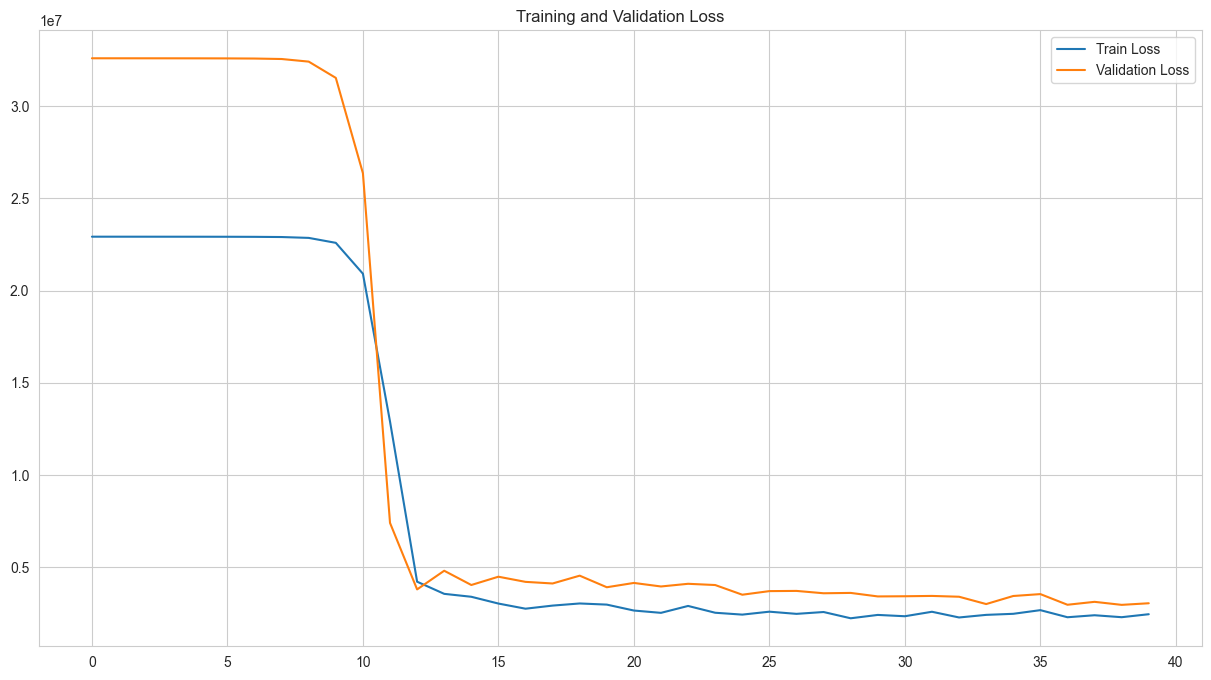

In [136]:
plt.plot(trainer.logger.metrics["train_loss"], label="Train Loss")
plt.plot(trainer.logger.metrics["val_loss"], label="Validation Loss")
plt.legend()
plt.title("Training and Validation Loss")
# plt.yscale("log")
plt.show()

RMSE Train: 970.24
RMSE Test: 1722.04


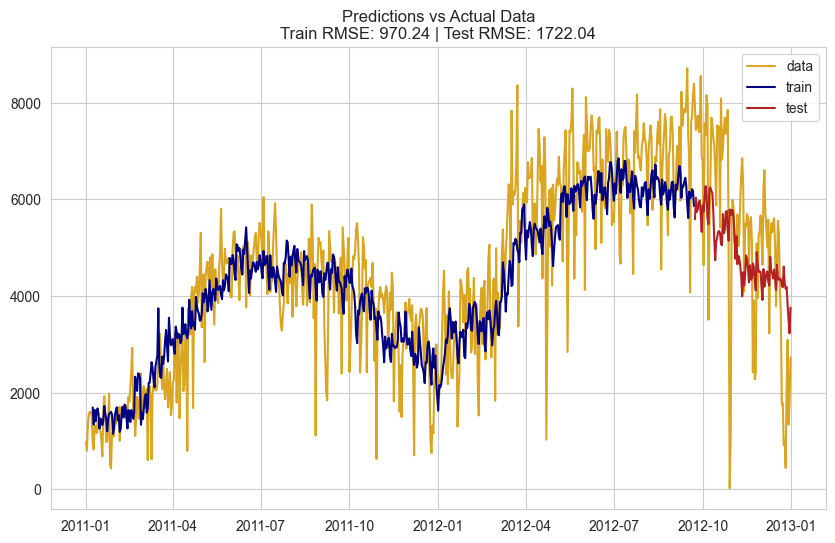

In [ ]:
from sklearn.metrics import mean_squared_error

model.eval()
with torch.no_grad():
    train_preds = best_model(x_train_tensor).cpu().numpy()
    test_preds = best_model(x_test_tensor).cpu().numpy()

# Calcul de la RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))

print(f"RMSE Train: {train_rmse:.2f}")
print(f"RMSE Test: {test_rmse:.2f}")

plt.figure(figsize=(10, 6))
plt.plot(data.index, data["cnt"], c="goldenrod", label="data")
plt.plot(data.iloc[length : -len(y_test)].index, train_preds, c="navy", label="train")
plt.plot(data.iloc[-len(y_test) :].index, test_preds, c="firebrick", label="test")
plt.legend()
plt.title(f"Predictions vs Actual Data\nTrain RMSE: {train_rmse:.2f} | Test RMSE: {test_rmse:.2f}")
plt.show()

***Interprétation de la comparaison du choix de la fenêtre***

Avec un fenêtre étendu de 28 jours, on obtient une RMSE de 1684.89 contre une RMSE de 1722.04 pour la fenêtre de 7 jours. Notre hypothèse qui ressort de l'ACF/PACF est remis en question. On peut confirmer que les corrélations lag 14, 21, 28 pris par le modèle ont amélioré le modèle, là oû un ARMA avec des lags aussi lointain aurait peut-être overfit.

Par la suite on va préférer une fenêtre de 28 jours. 

## Série différenciée

Dans la suite on va chercher à différencier la série pour voir si ça permet au modèle de s'améliorer. 

In [165]:
# Séparer les variables continues et catégorielles
continuous_vars = ['temp', 'hum', 'windspeed'] 
categorical_vars = ["weathersit", "workingday", 'yr', 'season', 'mnth', 'holiday', 'weekday']

# Différencier les variables continues
data_diff = data.copy()
for var in continuous_vars:
    data_diff[f'{var}_diff'] = data[var].diff()

data_diff['cnt_diff'] = data['cnt'].diff()

data_diff = data_diff.iloc[1:].reset_index(drop=True)

X_continuous_diff = data_diff[[f'{var}_diff' for var in continuous_vars]]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_continuous_diff)

X_cat = pd.get_dummies(data_diff.loc[:, categorical_vars], drop_first=True)

X_final = pd.concat([pd.DataFrame(X_scaled), X_cat.reset_index(drop=True)], axis=1)
X_final = X_final.astype(float)

# Ajouter la cible différenciée
data_mat = pd.concat([X_final, data_diff["cnt_diff"]], axis=1)
print(data_mat.head())
data_mat = data_mat.values

time_steps = data_mat.shape[0]
samples = []
target = []
length = 28
test_size = 100

n_features = data_mat.shape[1] - 1

for i in range(time_steps - length):
    sample = data_mat[i : i + length, :n_features] 
    outcome = data_mat[i + length, -1] 
    samples.append(sample)
    target.append(outcome)

samples = np.array(samples)
target = np.array(target)

x_train = samples[:-test_size]
x_test = samples[-test_size:]
y_train = target[:-test_size]
y_test = target[-test_size:]

print("x_train:", x_train.shape)
print("x_test :", x_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)

x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=50, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=50, shuffle=False)

          0         1         2  weathersit  workingday   yr  season  mnth  \
0  0.333693 -0.791675  0.979624         2.0         0.0  0.0     1.0   1.0   
1 -2.858660 -1.870081 -0.002472         1.0         1.0  0.0     1.0   1.0   
2  0.065273  1.110286 -0.978564         1.0         1.0  0.0     1.0   1.0   
3  0.464624 -1.108046  0.295905         1.0         1.0  0.0     1.0   1.0   
4 -0.384147  0.590442 -1.082217         1.0         1.0  0.0     1.0   1.0   

   holiday  weekday  cnt_diff  
0      0.0      0.0    -184.0  
1      0.0      1.0     548.0  
2      0.0      2.0     213.0  
3      0.0      3.0      38.0  
4      0.0      4.0       6.0  
x_train: (602, 28, 10)
x_test : (100, 28, 10)
y_train: (602,)
y_test : (100,)


In [171]:
input_size = 10
hidden_size = 12
model = RNNModel(input_size, hidden_size,12, 20, 8)
print(model)

from lightning.pytorch.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(
    monitor="val_loss", min_delta=0.00, patience=10, verbose=True, mode="min"
)
checkpoint_callback = ModelCheckpoint(
    save_top_k=1, monitor="val_loss", mode="min", verbose=True
)
trainer = pl.Trainer(
    max_epochs=75,
    logger=SimpleLogger(),
    enable_checkpointing=True,
    check_val_every_n_epoch=1,
    callbacks=[
        # early_stopping, # Early stopping
        checkpoint_callback,  # Save model with best val_loss
    ],
)

trainer.fit(model, train_dataloaders=train_loader, val_dataloaders=test_loader)
best_model = RNNModel.load_from_checkpoint(
    checkpoint_path=checkpoint_callback.best_model_path
)
best_model.eval()


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
c:\Users\enzom\OneDrive\Bureau\MINES\SDD\Mines_data_science\.venv\Lib\site-packages\lightning\pytorch\callbacks\model_checkpoint.py:881: Checkpoint directory c:\Users\enzom\OneDrive\Bureau\MINES\SDD\Mines_data_science\Neural_network\SimpleLogger\MajeureData\checkpoints exists and is not empty.

  | Name      | Type    | Params | Mode  | FLOPs
------------------------------------------------------
0 | rnn       | RNN     | 288    | train | 0    
1 | dropout   | Dropout | 0      | train | 0    
2 | fc1       | Linear  | 156    | train | 0    
3 | fc2       | Linear  | 260    | train | 0    
4 | fc3       | Linear  | 168    | train | 0    
5 | out       | Linear  | 9      | train | 0    
6 | relu      | ReLU    | 0      | train | 0    
7 | criterion | MSELoss | 0      | train | 0    
------------------------------------------------------
881       Trainable params
0         Non-trainable params
881       Total para

RNNModel(
  (rnn): RNN(10, 12, batch_first=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (fc1): Linear(in_features=12, out_features=12, bias=True)
  (fc2): Linear(in_features=12, out_features=20, bias=True)
  (fc3): Linear(in_features=20, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=1, bias=True)
  (relu): ReLU()
  (criterion): MSELoss()
)
                                                                           

c:\Users\enzom\OneDrive\Bureau\MINES\SDD\Mines_data_science\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:434: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.
c:\Users\enzom\OneDrive\Bureau\MINES\SDD\Mines_data_science\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:434: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.
c:\Users\enzom\OneDrive\Bureau\MINES\SDD\Mines_data_science\.venv\Lib\site-packages\lightning\pytorch\loops\fit_loop.py:317: The number of training batches (13) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training 

Epoch 0: 100%|██████████| 13/13 [00:00<00:00, 37.35it/s, v_num=Data, val_loss=1.8e+6, train_loss=1.07e+6]

Epoch 0, global step 13: 'val_loss' reached 1799430.50000 (best 1799430.50000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=0-step=13.ckpt' as top 1


Epoch 1: 100%|██████████| 13/13 [00:00<00:00, 50.84it/s, v_num=Data, val_loss=1.8e+6, train_loss=1.07e+6]

Epoch 1, global step 26: 'val_loss' reached 1799426.75000 (best 1799426.75000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=1-step=26.ckpt' as top 1


Epoch 2: 100%|██████████| 13/13 [00:00<00:00, 65.89it/s, v_num=Data, val_loss=1.8e+6, train_loss=1.07e+6]

Epoch 2, global step 39: 'val_loss' reached 1799425.75000 (best 1799425.75000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=2-step=39.ckpt' as top 1


Epoch 3: 100%|██████████| 13/13 [00:00<00:00, 58.91it/s, v_num=Data, val_loss=1.8e+6, train_loss=1.07e+6]

Epoch 3, global step 52: 'val_loss' reached 1799423.37500 (best 1799423.37500), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=3-step=52.ckpt' as top 1


Epoch 4: 100%|██████████| 13/13 [00:00<00:00, 61.39it/s, v_num=Data, val_loss=1.8e+6, train_loss=1.07e+6]

Epoch 4, global step 65: 'val_loss' reached 1799418.75000 (best 1799418.75000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=4-step=65.ckpt' as top 1


Epoch 5: 100%|██████████| 13/13 [00:00<00:00, 65.10it/s, v_num=Data, val_loss=1.8e+6, train_loss=1.07e+6]

Epoch 5, global step 78: 'val_loss' reached 1799415.37500 (best 1799415.37500), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=5-step=78.ckpt' as top 1


Epoch 6: 100%|██████████| 13/13 [00:00<00:00, 55.83it/s, v_num=Data, val_loss=1.8e+6, train_loss=1.07e+6]

Epoch 6, global step 91: 'val_loss' reached 1799412.00000 (best 1799412.00000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=6-step=91.ckpt' as top 1


Epoch 7: 100%|██████████| 13/13 [00:00<00:00, 68.04it/s, v_num=Data, val_loss=1.8e+6, train_loss=1.07e+6]

Epoch 7, global step 104: 'val_loss' reached 1799397.75000 (best 1799397.75000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=7-step=104.ckpt' as top 1


Epoch 8: 100%|██████████| 13/13 [00:00<00:00, 62.47it/s, v_num=Data, val_loss=1.8e+6, train_loss=1.07e+6]

Epoch 8, global step 117: 'val_loss' reached 1799384.00000 (best 1799384.00000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=8-step=117.ckpt' as top 1


Epoch 9: 100%|██████████| 13/13 [00:00<00:00, 61.73it/s, v_num=Data, val_loss=1.8e+6, train_loss=1.07e+6]

Epoch 9, global step 130: 'val_loss' reached 1799351.37500 (best 1799351.37500), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=9-step=130.ckpt' as top 1


Epoch 10: 100%|██████████| 13/13 [00:00<00:00, 60.74it/s, v_num=Data, val_loss=1.8e+6, train_loss=1.07e+6]

Epoch 10, global step 143: 'val_loss' reached 1799305.00000 (best 1799305.00000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=10-step=143.ckpt' as top 1


Epoch 11: 100%|██████████| 13/13 [00:00<00:00, 62.06it/s, v_num=Data, val_loss=1.8e+6, train_loss=1.07e+6]

Epoch 11, global step 156: 'val_loss' reached 1799193.00000 (best 1799193.00000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=11-step=156.ckpt' as top 1


Epoch 12: 100%|██████████| 13/13 [00:00<00:00, 53.73it/s, v_num=Data, val_loss=1.8e+6, train_loss=1.07e+6]

Epoch 12, global step 169: 'val_loss' reached 1798995.87500 (best 1798995.87500), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=12-step=169.ckpt' as top 1


Epoch 13: 100%|██████████| 13/13 [00:00<00:00, 64.42it/s, v_num=Data, val_loss=1.8e+6, train_loss=1.07e+6]

Epoch 13, global step 182: 'val_loss' reached 1798631.00000 (best 1798631.00000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=13-step=182.ckpt' as top 1


Epoch 14: 100%|██████████| 13/13 [00:00<00:00, 64.36it/s, v_num=Data, val_loss=1.8e+6, train_loss=1.06e+6]

Epoch 14, global step 195: 'val_loss' reached 1798418.75000 (best 1798418.75000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=14-step=195.ckpt' as top 1


Epoch 15: 100%|██████████| 13/13 [00:00<00:00, 58.84it/s, v_num=Data, val_loss=1.8e+6, train_loss=1.06e+6]

Epoch 15, global step 208: 'val_loss' reached 1798022.12500 (best 1798022.12500), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=15-step=208.ckpt' as top 1


Epoch 16: 100%|██████████| 13/13 [00:00<00:00, 63.88it/s, v_num=Data, val_loss=1.8e+6, train_loss=1.06e+6]

Epoch 16, global step 221: 'val_loss' reached 1796530.75000 (best 1796530.75000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=16-step=221.ckpt' as top 1


Epoch 17: 100%|██████████| 13/13 [00:00<00:00, 52.02it/s, v_num=Data, val_loss=1.8e+6, train_loss=1.06e+6]

Epoch 17, global step 234: 'val_loss' reached 1795173.12500 (best 1795173.12500), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=17-step=234.ckpt' as top 1


Epoch 18: 100%|██████████| 13/13 [00:00<00:00, 66.29it/s, v_num=Data, val_loss=1.79e+6, train_loss=1.06e+6]

Epoch 18, global step 247: 'val_loss' reached 1793382.37500 (best 1793382.37500), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=18-step=247.ckpt' as top 1


Epoch 19: 100%|██████████| 13/13 [00:00<00:00, 57.57it/s, v_num=Data, val_loss=1.79e+6, train_loss=1.06e+6]

Epoch 19, global step 260: 'val_loss' reached 1791168.00000 (best 1791168.00000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=19-step=260.ckpt' as top 1


Epoch 20: 100%|██████████| 13/13 [00:00<00:00, 59.60it/s, v_num=Data, val_loss=1.79e+6, train_loss=1.06e+6]

Epoch 20, global step 273: 'val_loss' reached 1788494.75000 (best 1788494.75000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=20-step=273.ckpt' as top 1


Epoch 21: 100%|██████████| 13/13 [00:00<00:00, 57.06it/s, v_num=Data, val_loss=1.79e+6, train_loss=1.06e+6]

Epoch 21, global step 286: 'val_loss' was not in top 1


Epoch 22: 100%|██████████| 13/13 [00:00<00:00, 54.15it/s, v_num=Data, val_loss=1.78e+6, train_loss=1.06e+6]

Epoch 22, global step 299: 'val_loss' reached 1781923.00000 (best 1781923.00000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=22-step=299.ckpt' as top 1


Epoch 23: 100%|██████████| 13/13 [00:00<00:00, 56.73it/s, v_num=Data, val_loss=1.78e+6, train_loss=1.05e+6]

Epoch 23, global step 312: 'val_loss' reached 1778738.87500 (best 1778738.87500), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=23-step=312.ckpt' as top 1


Epoch 24: 100%|██████████| 13/13 [00:00<00:00, 55.79it/s, v_num=Data, val_loss=1.78e+6, train_loss=1.05e+6]

Epoch 24, global step 325: 'val_loss' reached 1776247.50000 (best 1776247.50000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=24-step=325.ckpt' as top 1


Epoch 25: 100%|██████████| 13/13 [00:00<00:00, 61.75it/s, v_num=Data, val_loss=1.79e+6, train_loss=1.05e+6]

Epoch 25, global step 338: 'val_loss' was not in top 1


Epoch 26: 100%|██████████| 13/13 [00:00<00:00, 75.86it/s, v_num=Data, val_loss=1.78e+6, train_loss=1.05e+6]

Epoch 26, global step 351: 'val_loss' was not in top 1


Epoch 27: 100%|██████████| 13/13 [00:00<00:00, 65.57it/s, v_num=Data, val_loss=1.77e+6, train_loss=1.04e+6]

Epoch 27, global step 364: 'val_loss' reached 1769044.50000 (best 1769044.50000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=27-step=364.ckpt' as top 1


Epoch 28: 100%|██████████| 13/13 [00:00<00:00, 65.71it/s, v_num=Data, val_loss=1.76e+6, train_loss=1.04e+6]

Epoch 28, global step 377: 'val_loss' reached 1761551.37500 (best 1761551.37500), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=28-step=377-v1.ckpt' as top 1


Epoch 29: 100%|██████████| 13/13 [00:00<00:00, 65.53it/s, v_num=Data, val_loss=1.75e+6, train_loss=1.03e+6]

Epoch 29, global step 390: 'val_loss' reached 1752197.87500 (best 1752197.87500), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=29-step=390-v1.ckpt' as top 1


Epoch 30: 100%|██████████| 13/13 [00:00<00:00, 67.91it/s, v_num=Data, val_loss=1.77e+6, train_loss=1.06e+6]

Epoch 30, global step 403: 'val_loss' was not in top 1


Epoch 31: 100%|██████████| 13/13 [00:00<00:00, 68.51it/s, v_num=Data, val_loss=1.75e+6, train_loss=1.04e+6]

Epoch 31, global step 416: 'val_loss' reached 1750044.75000 (best 1750044.75000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=31-step=416.ckpt' as top 1


Epoch 32: 100%|██████████| 13/13 [00:00<00:00, 67.35it/s, v_num=Data, val_loss=1.79e+6, train_loss=1.04e+6]

Epoch 32, global step 429: 'val_loss' was not in top 1


Epoch 33: 100%|██████████| 13/13 [00:00<00:00, 73.48it/s, v_num=Data, val_loss=1.77e+6, train_loss=1.03e+6]

Epoch 33, global step 442: 'val_loss' was not in top 1


Epoch 34: 100%|██████████| 13/13 [00:00<00:00, 67.83it/s, v_num=Data, val_loss=1.76e+6, train_loss=1.03e+6]

Epoch 34, global step 455: 'val_loss' was not in top 1


Epoch 35: 100%|██████████| 13/13 [00:00<00:00, 61.88it/s, v_num=Data, val_loss=1.77e+6, train_loss=1.02e+6]

Epoch 35, global step 468: 'val_loss' was not in top 1


Epoch 36: 100%|██████████| 13/13 [00:00<00:00, 55.80it/s, v_num=Data, val_loss=1.74e+6, train_loss=1.02e+6]

Epoch 36, global step 481: 'val_loss' reached 1741698.12500 (best 1741698.12500), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=36-step=481.ckpt' as top 1


Epoch 37: 100%|██████████| 13/13 [00:00<00:00, 57.18it/s, v_num=Data, val_loss=1.74e+6, train_loss=1.03e+6]

Epoch 37, global step 494: 'val_loss' reached 1735147.25000 (best 1735147.25000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=37-step=494.ckpt' as top 1


Epoch 38: 100%|██████████| 13/13 [00:00<00:00, 61.83it/s, v_num=Data, val_loss=1.74e+6, train_loss=1.01e+6]

Epoch 38, global step 507: 'val_loss' was not in top 1


Epoch 39: 100%|██████████| 13/13 [00:00<00:00, 66.42it/s, v_num=Data, val_loss=1.73e+6, train_loss=1.02e+6]

Epoch 39, global step 520: 'val_loss' reached 1725322.50000 (best 1725322.50000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=39-step=520-v3.ckpt' as top 1


Epoch 40: 100%|██████████| 13/13 [00:00<00:00, 62.76it/s, v_num=Data, val_loss=1.73e+6, train_loss=1.02e+6]

Epoch 40, global step 533: 'val_loss' was not in top 1


Epoch 41: 100%|██████████| 13/13 [00:00<00:00, 72.99it/s, v_num=Data, val_loss=1.73e+6, train_loss=1.02e+6]

Epoch 41, global step 546: 'val_loss' was not in top 1


Epoch 42: 100%|██████████| 13/13 [00:00<00:00, 64.61it/s, v_num=Data, val_loss=1.73e+6, train_loss=1.01e+6]

Epoch 42, global step 559: 'val_loss' was not in top 1


Epoch 43: 100%|██████████| 13/13 [00:00<00:00, 55.03it/s, v_num=Data, val_loss=1.72e+6, train_loss=1e+6]   

Epoch 43, global step 572: 'val_loss' reached 1723232.12500 (best 1723232.12500), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=43-step=572.ckpt' as top 1


Epoch 44: 100%|██████████| 13/13 [00:00<00:00, 54.16it/s, v_num=Data, val_loss=1.71e+6, train_loss=9.99e+5]

Epoch 44, global step 585: 'val_loss' reached 1712397.62500 (best 1712397.62500), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=44-step=585.ckpt' as top 1


Epoch 45: 100%|██████████| 13/13 [00:00<00:00, 56.54it/s, v_num=Data, val_loss=1.7e+6, train_loss=1.01e+6] 

Epoch 45, global step 598: 'val_loss' reached 1703924.62500 (best 1703924.62500), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=45-step=598.ckpt' as top 1


Epoch 46: 100%|██████████| 13/13 [00:00<00:00, 60.46it/s, v_num=Data, val_loss=1.71e+6, train_loss=9.96e+5]

Epoch 46, global step 611: 'val_loss' was not in top 1


Epoch 47: 100%|██████████| 13/13 [00:00<00:00, 57.57it/s, v_num=Data, val_loss=1.69e+6, train_loss=9.81e+5]

Epoch 47, global step 624: 'val_loss' reached 1694176.62500 (best 1694176.62500), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=47-step=624.ckpt' as top 1


Epoch 48: 100%|██████████| 13/13 [00:00<00:00, 55.04it/s, v_num=Data, val_loss=1.73e+6, train_loss=1e+6]   

Epoch 48, global step 637: 'val_loss' was not in top 1


Epoch 49: 100%|██████████| 13/13 [00:00<00:00, 70.13it/s, v_num=Data, val_loss=1.73e+6, train_loss=9.97e+5]

Epoch 49, global step 650: 'val_loss' was not in top 1


Epoch 50: 100%|██████████| 13/13 [00:00<00:00, 58.25it/s, v_num=Data, val_loss=1.69e+6, train_loss=9.81e+5]

Epoch 50, global step 663: 'val_loss' reached 1687672.37500 (best 1687672.37500), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=50-step=663.ckpt' as top 1


Epoch 51: 100%|██████████| 13/13 [00:00<00:00, 64.61it/s, v_num=Data, val_loss=1.69e+6, train_loss=9.76e+5]

Epoch 51, global step 676: 'val_loss' reached 1686910.75000 (best 1686910.75000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=51-step=676.ckpt' as top 1


Epoch 52: 100%|██████████| 13/13 [00:00<00:00, 68.72it/s, v_num=Data, val_loss=1.69e+6, train_loss=9.86e+5]

Epoch 52, global step 689: 'val_loss' was not in top 1


Epoch 53: 100%|██████████| 13/13 [00:00<00:00, 60.44it/s, v_num=Data, val_loss=1.68e+6, train_loss=9.75e+5]

Epoch 53, global step 702: 'val_loss' reached 1677231.87500 (best 1677231.87500), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=53-step=702.ckpt' as top 1


Epoch 54: 100%|██████████| 13/13 [00:00<00:00, 62.52it/s, v_num=Data, val_loss=1.72e+6, train_loss=9.88e+5]

Epoch 54, global step 715: 'val_loss' was not in top 1


Epoch 55: 100%|██████████| 13/13 [00:00<00:00, 55.45it/s, v_num=Data, val_loss=1.68e+6, train_loss=9.65e+5]

Epoch 55, global step 728: 'val_loss' was not in top 1


Epoch 56: 100%|██████████| 13/13 [00:00<00:00, 55.81it/s, v_num=Data, val_loss=1.68e+6, train_loss=9.64e+5]

Epoch 56, global step 741: 'val_loss' was not in top 1


Epoch 57: 100%|██████████| 13/13 [00:00<00:00, 58.13it/s, v_num=Data, val_loss=1.68e+6, train_loss=9.64e+5]

Epoch 57, global step 754: 'val_loss' was not in top 1


Epoch 58: 100%|██████████| 13/13 [00:00<00:00, 57.42it/s, v_num=Data, val_loss=1.67e+6, train_loss=9.55e+5]

Epoch 58, global step 767: 'val_loss' reached 1671064.00000 (best 1671064.00000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=58-step=767.ckpt' as top 1


Epoch 59: 100%|██████████| 13/13 [00:00<00:00, 44.00it/s, v_num=Data, val_loss=1.66e+6, train_loss=9.65e+5]

Epoch 59, global step 780: 'val_loss' reached 1664542.37500 (best 1664542.37500), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=59-step=780.ckpt' as top 1


Epoch 60: 100%|██████████| 13/13 [00:00<00:00, 64.96it/s, v_num=Data, val_loss=1.68e+6, train_loss=9.68e+5]

Epoch 60, global step 793: 'val_loss' was not in top 1


Epoch 61: 100%|██████████| 13/13 [00:00<00:00, 65.37it/s, v_num=Data, val_loss=1.67e+6, train_loss=9.59e+5]

Epoch 61, global step 806: 'val_loss' was not in top 1


Epoch 62: 100%|██████████| 13/13 [00:00<00:00, 55.37it/s, v_num=Data, val_loss=1.66e+6, train_loss=9.55e+5]

Epoch 62, global step 819: 'val_loss' reached 1660993.50000 (best 1660993.50000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=62-step=819.ckpt' as top 1


Epoch 63: 100%|██████████| 13/13 [00:00<00:00, 63.44it/s, v_num=Data, val_loss=1.66e+6, train_loss=9.79e+5]

Epoch 63, global step 832: 'val_loss' was not in top 1


Epoch 64: 100%|██████████| 13/13 [00:00<00:00, 57.62it/s, v_num=Data, val_loss=1.65e+6, train_loss=9.49e+5]

Epoch 64, global step 845: 'val_loss' reached 1654419.50000 (best 1654419.50000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=64-step=845.ckpt' as top 1


Epoch 65: 100%|██████████| 13/13 [00:00<00:00, 54.76it/s, v_num=Data, val_loss=1.65e+6, train_loss=9.61e+5]

Epoch 65, global step 858: 'val_loss' reached 1649688.75000 (best 1649688.75000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=65-step=858.ckpt' as top 1


Epoch 66: 100%|██████████| 13/13 [00:00<00:00, 57.63it/s, v_num=Data, val_loss=1.65e+6, train_loss=9.53e+5]

Epoch 66, global step 871: 'val_loss' reached 1646159.00000 (best 1646159.00000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=66-step=871.ckpt' as top 1


Epoch 67: 100%|██████████| 13/13 [00:00<00:00, 59.00it/s, v_num=Data, val_loss=1.65e+6, train_loss=9.43e+5]

Epoch 67, global step 884: 'val_loss' was not in top 1


Epoch 68: 100%|██████████| 13/13 [00:00<00:00, 56.63it/s, v_num=Data, val_loss=1.64e+6, train_loss=9.4e+5] 

Epoch 68, global step 897: 'val_loss' reached 1640116.50000 (best 1640116.50000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=68-step=897.ckpt' as top 1


Epoch 69: 100%|██████████| 13/13 [00:00<00:00, 58.94it/s, v_num=Data, val_loss=1.64e+6, train_loss=9.49e+5]

Epoch 69, global step 910: 'val_loss' was not in top 1


Epoch 70: 100%|██████████| 13/13 [00:00<00:00, 71.44it/s, v_num=Data, val_loss=1.64e+6, train_loss=9.47e+5]

Epoch 70, global step 923: 'val_loss' reached 1638049.62500 (best 1638049.62500), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=70-step=923.ckpt' as top 1


Epoch 71: 100%|██████████| 13/13 [00:00<00:00, 56.64it/s, v_num=Data, val_loss=1.63e+6, train_loss=9.3e+5] 

Epoch 71, global step 936: 'val_loss' reached 1631826.37500 (best 1631826.37500), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=71-step=936.ckpt' as top 1


Epoch 72: 100%|██████████| 13/13 [00:00<00:00, 57.64it/s, v_num=Data, val_loss=1.63e+6, train_loss=9.27e+5]

Epoch 72, global step 949: 'val_loss' reached 1628908.75000 (best 1628908.75000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=72-step=949.ckpt' as top 1


Epoch 73: 100%|██████████| 13/13 [00:00<00:00, 57.06it/s, v_num=Data, val_loss=1.63e+6, train_loss=9.37e+5]

Epoch 73, global step 962: 'val_loss' reached 1626718.12500 (best 1626718.12500), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=73-step=962.ckpt' as top 1


Epoch 74: 100%|██████████| 13/13 [00:00<00:00, 57.09it/s, v_num=Data, val_loss=1.64e+6, train_loss=9.2e+5] 

Epoch 74, global step 975: 'val_loss' was not in top 1
`Trainer.fit` stopped: `max_epochs=75` reached.


Epoch 74: 100%|██████████| 13/13 [00:00<00:00, 55.80it/s, v_num=Data, val_loss=1.64e+6, train_loss=9.2e+5]


RNNModel(
  (rnn): RNN(10, 12, batch_first=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (fc1): Linear(in_features=12, out_features=12, bias=True)
  (fc2): Linear(in_features=12, out_features=20, bias=True)
  (fc3): Linear(in_features=20, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=1, bias=True)
  (relu): ReLU()
  (criterion): MSELoss()
)

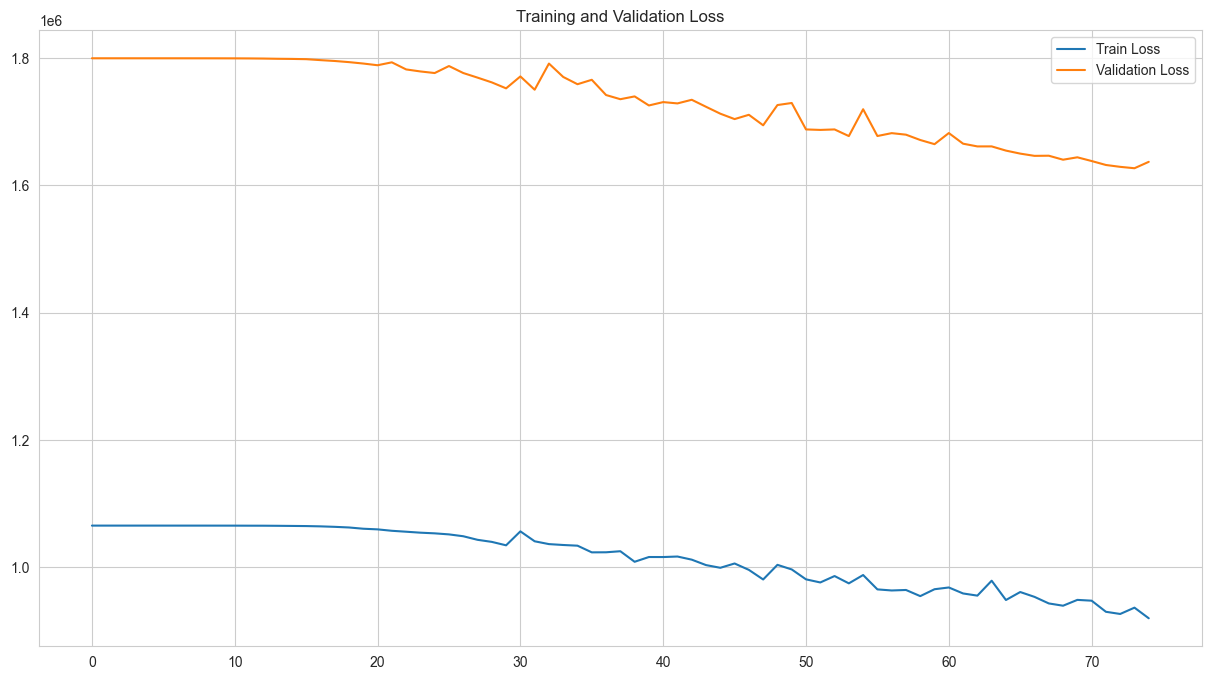

In [172]:
plt.plot(trainer.logger.metrics["train_loss"], label="Train Loss")
plt.plot(trainer.logger.metrics["val_loss"], label="Validation Loss")
plt.legend()
plt.title("Training and Validation Loss")
# plt.yscale("log")
plt.show()

A partir de 75 epochs le modèle a appris.

RMSE Train (différencié): 905.29
RMSE Test (différencié): 1238.02
RMSE Train (échelle originale): 1447.02
RMSE Test (échelle originale): 1512.60


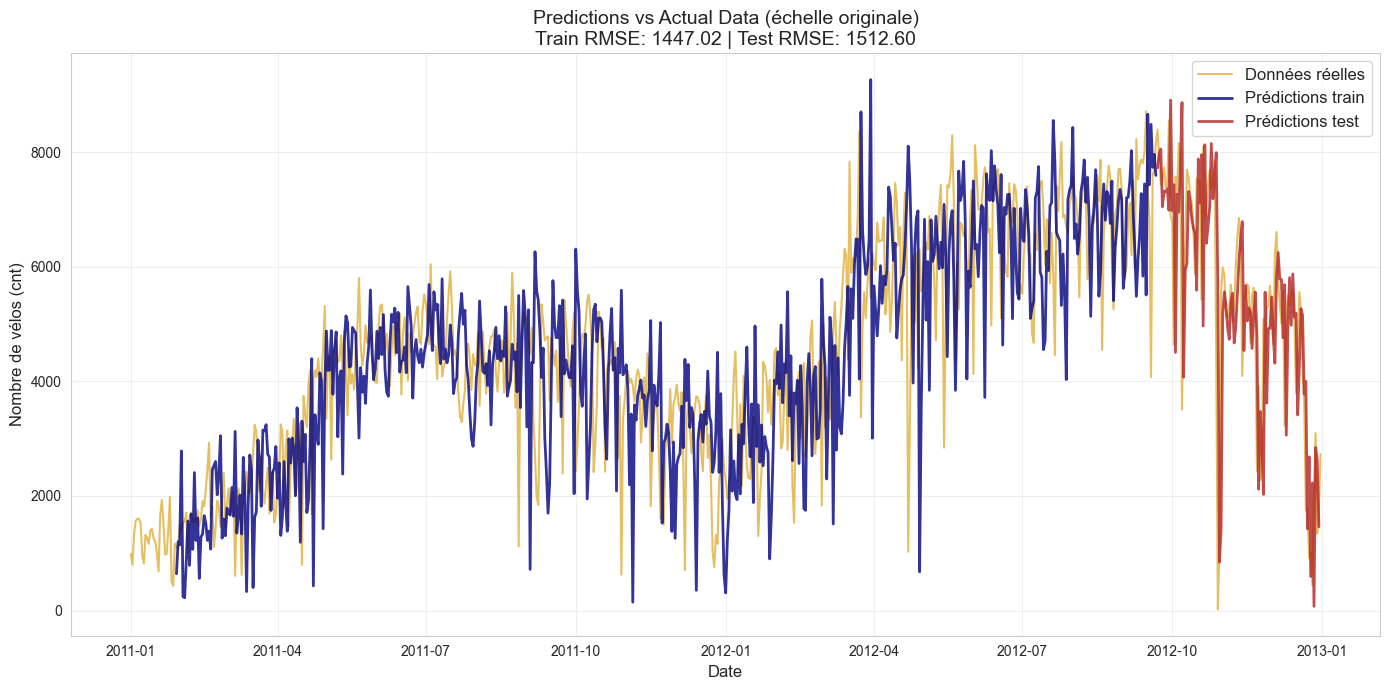

In [168]:
from sklearn.metrics import mean_squared_error

model.eval()
with torch.no_grad():
    train_preds_diff = best_model(x_train_tensor).cpu().numpy().flatten()
    test_preds_diff = best_model(x_test_tensor).cpu().numpy().flatten()

# Calcul de la RMSE sur les différences
train_rmse_diff = np.sqrt(mean_squared_error(y_train, train_preds_diff))
test_rmse_diff = np.sqrt(mean_squared_error(y_test, test_preds_diff))

print(f"RMSE Train (différencié): {train_rmse_diff:.2f}")
print(f"RMSE Test (différencié): {test_rmse_diff:.2f}")

# Inversion: valeur à t = valeur à t-28 + différence prédite
train_preds_original = np.zeros(len(train_preds_diff))
for i in range(len(train_preds_diff)):
    train_preds_original[i] = data.iloc[length + i - 7]['cnt'] + train_preds_diff[i]

test_preds_original = np.zeros(len(test_preds_diff))
for i in range(len(test_preds_diff)):
    test_preds_original[i] = data.iloc[length + len(y_train) + i - 1]['cnt'] + test_preds_diff[i]

# Valeurs réelles originales
y_train_original = data.iloc[length : length + len(y_train)]['cnt'].values
y_test_original = data.iloc[length + len(y_train) : length + len(y_train) + len(y_test)]['cnt'].values

# RMSE sur échelle originale
train_rmse_original = np.sqrt(mean_squared_error(y_train_original, train_preds_original))
test_rmse_original = np.sqrt(mean_squared_error(y_test_original, test_preds_original))

print(f"RMSE Train (échelle originale): {train_rmse_original:.2f}")
print(f"RMSE Test (échelle originale): {test_rmse_original:.2f}")

# Visualisation
plt.figure(figsize=(14, 7))
plt.plot(data.index, data["cnt"], c="goldenrod", label="Données réelles", alpha=0.7, linewidth=1.5)
plt.plot(data.iloc[length : length + len(y_train)].index, train_preds_original, 
         c="navy", label="Prédictions train", linewidth=2, alpha=0.8)
plt.plot(data.iloc[length + len(y_train) : length + len(y_train) + len(y_test)].index, 
         test_preds_original, c="firebrick", label="Prédictions test", linewidth=2, alpha=0.8)
plt.legend(fontsize=12)
plt.title(f"Predictions vs Actual Data (échelle originale)\nTrain RMSE: {train_rmse_original:.2f} | Test RMSE: {test_rmse_original:.2f}", 
          fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Nombre de vélos (cnt)", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

La série différenciée bat très largement les séries précédente avec un RMSE de 1512.60 contre 1684.89 pour le modèle sans différentitation des données.

Je n'ai pas eu le temps de comparer le modèle précédent avec celui qui fit casual et registered qui devrait donner d'encore meilleur résultat. 

In [179]:

p_max = 4 
q_max = 2 

results = []


for p in range(p_max + 1):
    for q in range(q_max + 1):
        try:
            model = ARIMA(data["cnt"], order=(p, 1, q))
            res = model.fit()

            results.append({
                "p": p,
                "d": 1,
                "q": q,
                "AIC": res.aic,
                "BIC": res.bic
            })
        except Exception as e:
            # si le modèle ne converge pas, on le saute
            print(f"ARIMA({p},1,{q}) a échoué : {e}")

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by=["AIC", "BIC"]).reset_index(drop=True)
print(results_df)

y_diff = data["cnt_diff"].dropna()

model_arma11 = ARIMA(y_diff, order=(1, 0, 1))
res_arma11 = model_arma11.fit()
print(res_arma11.summary())

lb = acorr_ljungbox(res_arma11.resid, lags=[10, 20], return_df=True)
print("\nTest de Ljung-Box sur les résidus (ARMA(1,1) sur cnt_diff) :")
print(lb)

c:\Users\enzom\OneDrive\Bureau\MINES\SDD\Mines_data_science\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\enzom\OneDrive\Bureau\MINES\SDD\Mines_data_science\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\enzom\OneDrive\Bureau\MINES\SDD\Mines_data_science\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\enzom\OneDrive\Bureau\MINES\SDD\Mines_data_science\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\enzom\O

    p  d  q           AIC           BIC
0   1  1  1  12050.020480  12063.799613
1   3  1  1  12050.145280  12073.110502
2   2  1  1  12051.049398  12069.421577
3   1  1  2  12051.310426  12069.682604
4   4  1  1  12052.985309  12080.543576
5   3  1  2  12053.176429  12080.734697
6   4  1  2  12053.239889  12085.391201
7   2  1  2  12054.239629  12077.204852
8   0  1  2  12055.588676  12069.367810
9   4  1  0  12100.164465  12123.129687
10  0  1  1  12110.027037  12119.213126
11  3  1  0  12128.550224  12146.922402
12  2  1  0  12156.394861  12170.173994
13  1  1  0  12187.633171  12196.819260
14  0  1  0  12250.269683  12254.862727


c:\Users\enzom\OneDrive\Bureau\MINES\SDD\Mines_data_science\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\enzom\OneDrive\Bureau\MINES\SDD\Mines_data_science\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\enzom\OneDrive\Bureau\MINES\SDD\Mines_data_science\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               cnt_diff   No. Observations:                  730
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -6021.891
Date:                Thu, 04 Dec 2025   AIC                          12051.781
Time:                        17:48:48   BIC                          12070.153
Sample:                    01-02-2011   HQIC                         12058.869
                         - 12-31-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1320      7.210      0.296      0.767     -11.999      16.263
ar.L1          0.3592      0.037      9.626      0.000       0.286       0.432
ma.L1         -0.8904      0.021    -41.553      0.0

La boucle après avoir fit plusieurs modèles les a trié en fonction de l'AIC et du BIC. Le modèle qui minimise ces indicateurs est le modèle ARMA(1,1).

Le test de Ljung-box nous indique qu'on peut considérer que les résidus sont des bruits blancs et valider le modèle .

Nous avons ensuite choisi de modéliser la composante saisonnière de notre jeu de données. En effet, le nombre de vélos loués présente une dynamique cyclique hebdomadaire. On en déduit que la demande observée un jour donné est influencée non seulement par le même jour de la semaine précédente, mais également par des chocs intervenus à t-7.

c:\Users\enzom\OneDrive\Bureau\MINES\SDD\Mines_data_science\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\enzom\OneDrive\Bureau\MINES\SDD\Mines_data_science\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:                               cnt   No. Observations:                  731
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 7)   Log Likelihood               -5950.791
Date:                           Thu, 04 Dec 2025   AIC                          11911.581
Time:                                   17:50:42   BIC                          11934.485
Sample:                               01-01-2011   HQIC                         11920.423
                                    - 12-31-2012                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3615      0.040      9.150      0.000       0.284       0.439
ma.L1         -0.9044      0.022    -40.273

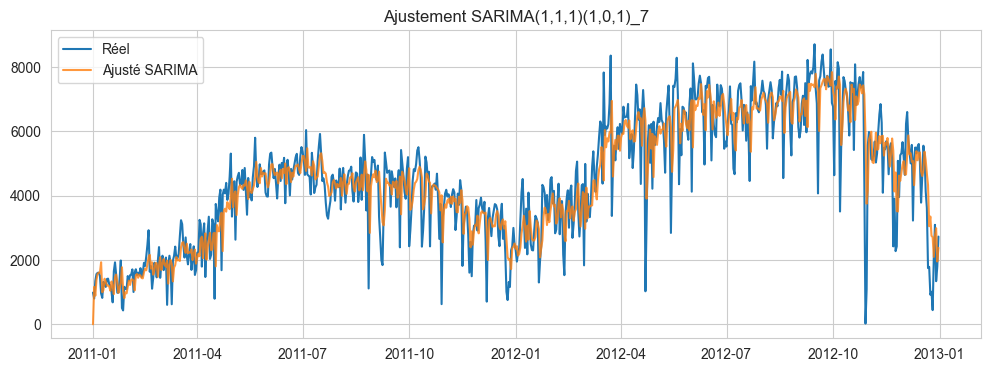

c:\Users\enzom\OneDrive\Bureau\MINES\SDD\Mines_data_science\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\enzom\OneDrive\Bureau\MINES\SDD\Mines_data_science\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\enzom\OneDrive\Bureau\MINES\SDD\Mines_data_science\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


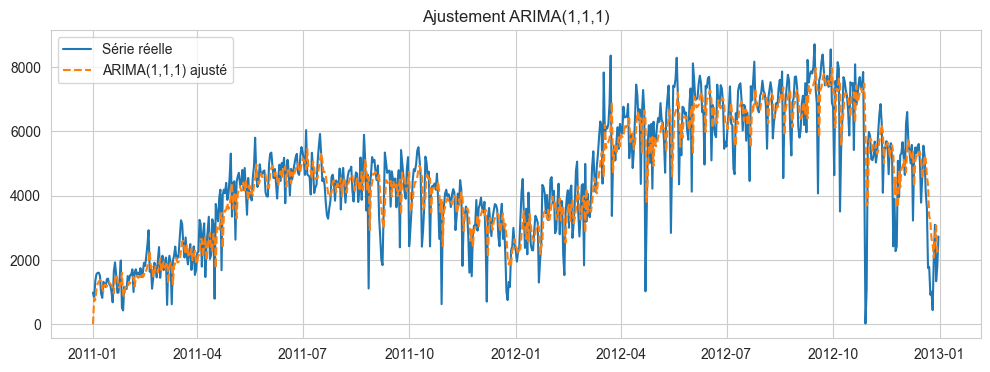

In [180]:
y = data["cnt"]
sarima_model = SARIMAX(
    y,
    order=(1, 1, 1),
    seasonal_order=(1, 0, 1, 7),
    enforce_stationarity=False,
    enforce_invertibility=False
)

sarima_res = sarima_model.fit()
print(sarima_res.summary())

comparison = pd.DataFrame({
    "Modèle": ["ARMA(1,1)", "SARIMA(1,1,1)(1,0,1)_7"],
    "AIC": [res_arma11.aic, sarima_res.aic],
    "BIC": [res_arma11.bic, sarima_res.bic]
})

print(comparison)

lb_sarima = acorr_ljungbox(sarima_res.resid.dropna(), lags=[10, 20], return_df=True)
print("\nTest de Ljung-Box sur les résidus SARIMA :")
print(lb_sarima)

y_fitted = sarima_res.fittedvalues

plt.figure(figsize=(12,4))
plt.plot(y, label="Réel")
plt.plot(y_fitted, label="Ajusté SARIMA", alpha=0.8)
plt.title("Ajustement SARIMA(1,1,1)(1,0,1)_7")
plt.legend()
plt.grid(True)
plt.show()

model_arima = ARIMA(data["cnt"], order=(1, 1, 1))
res_arima = model_arima.fit()

plt.figure(figsize=(12,4))
plt.plot(data["cnt"], label="Série réelle")
plt.plot(res_arima.fittedvalues, label="ARIMA(1,1,1) ajusté", linestyle="--")
plt.title("Ajustement ARIMA(1,1,1)")
plt.legend()
plt.grid(True)
plt.show()


On choisit finalement pour la prévision du nombre de vélo le modèle SARIMA car son AIC et son BIC sont légèrement inférieurs, ce qui suggère une meilleure performance et un modèle moins complexe. 

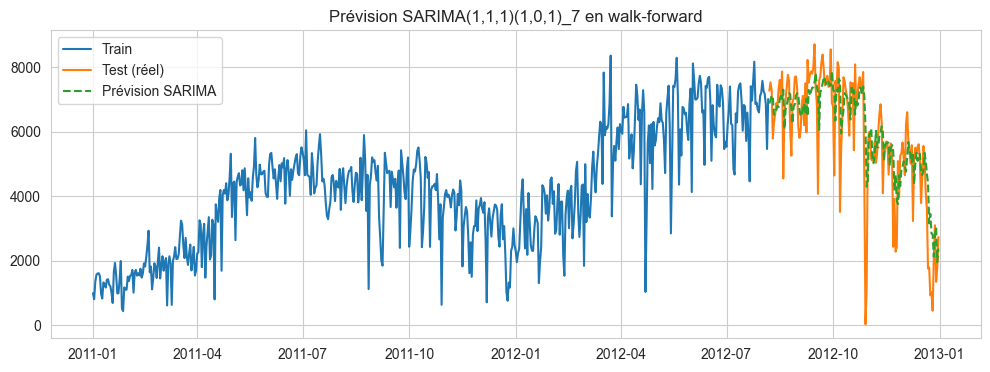

MAE SARIMA : 799.48
RMSE SARIMA : 1190.20


In [181]:

split = int(len(y) * 0.8)
train = y[:split]
test = y[split:]

history = list(train)
pred_sarima = []

for t in range(len(test)):
    model = SARIMAX(
        history,
        order=(1, 1, 1),
        seasonal_order=(1, 0, 1, 7),
        enforce_stationarity=False,
        enforce_invertibility=False
    )
    res = model.fit(disp=False)
    yhat = res.forecast()[0]
    pred_sarima.append(yhat)
    
    history.append(test.iloc[t])

pred_sarima = np.array(pred_sarima)

# Plot
plt.figure(figsize=(12,4))
plt.plot(train.index, train.values, label="Train")
plt.plot(test.index, test.values, label="Test (réel)")
plt.plot(test.index, pred_sarima, label="Prévision SARIMA", linestyle="--")
plt.title("Prévision SARIMA(1,1,1)(1,0,1)_7 en walk-forward")
plt.legend()
plt.grid(True)
plt.show()

# Erreurs
mae_sarima = mean_absolute_error(test, pred_sarima)
rmse_sarima = np.sqrt(mean_squared_error(test, pred_sarima))
print(f"MAE SARIMA : {mae_sarima:.2f}")
print(f"RMSE SARIMA : {rmse_sarima:.2f}")



On obtient de meilleures résultats avec notre modèle SARIMA(1,1,1)(1,0,1)_7 qu'avec le recurent neural network avec une RMSE de 1190.2 contre 1513. Autrement dit, malgré sa complexité beaucoup plus faible, le modèle saisonnier linéaire capte mieux la structure de la série que le réseau de neurones récurrent que nous avons entraîné.
Les modèles ARIMA/ARMA/SARIMA sont des modèles parcimonieux, avec un nombre très limité de paramètres moins d’une dizaine. Cette faible complexité les rend rapides à estimer, faciles à interpréter et peu sensibles au sur-apprentissage. À l’inverse, le RNN utilisé comporte environ 900 paramètres, ce qui le rend beaucoup plus flexible mais aussi plus coûteux à entraîner, plus sensible aux hyperparamètres et moins interprétable. Le RNN n’apporte donc pas ici de gain significatif, ce qui s’explique notamment par la taille limitée du jeu de données et par une dynamique relativement simple de la série.